In [66]:
import pandas as pd
import numpy as np

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords

import csv
import operator 
import json
from collections import Counter

import string
import wordcloud
from wordcloud import WordCloud


from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

import re
import os
import time
from time import sleep
from getpass import getpass


import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
chrome_options = Options()
chrome_options.add_argument("--dns-prefetch-disable")
driver_path = "D:/Softwares/chromedriver_win32/chromedriver.exe"
driver=Chrome(driver_path)

<ipython-input-68-d1c18129af94>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=Chrome(driver_path)


In [69]:
#100 top movies
movies=[]
ratings=[]
urls=[]
for i in range(1,52,50): #Since there are top 250 rated movies
    driver.get("https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=%s&ref_=adv_nxt" % str(i))
    sleep(5)
    page_cards=driver.find_elements_by_class_name("lister-item-content")
    for j in page_cards:
        movie_elem = j.find_element_by_xpath('.//h3/a').text
        url_elem = j.find_element_by_xpath('.//h3/a').get_attribute('href')
        rating_elem = j.find_element_by_xpath('.//div/div[1]').get_attribute("data-value")
        movies.append(movie_elem)
        ratings.append(rating_elem)
        urls.append(url_elem)

<ipython-input-69-80229525e3f4>:8: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  page_cards=driver.find_elements_by_class_name("lister-item-content")
C:\Users\anuro\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:392: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


In [70]:
#100 worst movies
for i in range(1,52,50):
    if i == 1:
        driver.get("https://www.imdb.com/search/title/?groups=bottom_250&lists=%21watchlist&sort=user_rating,asc&ref_=adv_prv")
    else:
        driver.get("https://www.imdb.com/search/title/?groups=bottom_250&lists=%21watchlist&sort=user_rating,asc&start="+str(i)+ "&ref_=adv_nxt")
    sleep(5)
    page_cards=driver.find_elements_by_class_name("lister-item-content")
    for j in page_cards:
        movie_elem = j.find_element_by_xpath('.//h3/a').text
        url_elem = j.find_element_by_xpath('.//h3/a').get_attribute('href')
        rating_elem = j.find_element_by_xpath('.//div/div[1]').get_attribute("data-value")
        movies.append(movie_elem)
        ratings.append(rating_elem)
        urls.append(url_elem)

<ipython-input-70-dc9643198ba1>:8: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  page_cards=driver.find_elements_by_class_name("lister-item-content")


In [71]:

movie_df=pd.DataFrame(zip(movies,ratings, urls) ,columns=["Movie","Rating","URL"])
movie_df

Movie Rating  \
0              The Shawshank Redemption    9.3   
1                         The Godfather    9.2   
2                       The Dark Knight      9   
3                The Godfather: Part II      9   
4                          12 Angry Men      9   
..                                  ...    ...   
195                         Singularity    3.6   
196                            Jaws 3-D    3.7   
197    Superman IV: The Quest for Peace    3.7   
198         Mortal Kombat: Annihilation    3.7   
199  The Flintstones in Viva Rock Vegas    3.7   

                                                   URL  
0    https://www.imdb.com/title/tt0111161/?ref_=adv...  
1    https://www.imdb.com/title/tt0068646/?ref_=adv...  
2    https://www.imdb.com/title/tt0468569/?ref_=adv...  
3    https://www.imdb.com/title/tt0071562/?ref_=adv...  
4    https://www.imdb.com/title/tt0050083/?ref_=adv...  
..                                                 ...  
195  https://www.imdb.com/title/tt7312940/?ref_=adv...  
196  https://www.imdb.com/title/tt0085750/?ref_=adv...  
197  https://www.imdb.com/title/tt0094074/?ref_=adv...  
198  https://www.imdb.com/title/tt0119707/?ref_=adv...  
199  https://www.imdb.com/title/tt0158622/?ref_=adv...  

[200 rows x 3 columns]

In [72]:
#best and worst 10 movies
movie_df_sorted = movie_df.sort_values(by=['Rating']).reset_index(drop=True)
top_bottom_10 = movie_df[:10].append(movie_df_sorted[:10]).reset_index(drop=True)

In [73]:
top_bottom_10

Movie Rating  \
0                        The Shawshank Redemption    9.3   
1                                   The Godfather    9.2   
2                                 The Dark Knight      9   
3                          The Godfather: Part II      9   
4                                    12 Angry Men      9   
5   The Lord of the Rings: The Return of the King    8.9   
6                                    Pulp Fiction    8.9   
7                                Schindler's List    8.9   
8                                       Inception    8.8   
9                                      Fight Club    8.8   
10                                          Gully    1.2   
11                                       Smolensk    1.2   
12                                       Elk*rtuk    1.3   
13                Kirk Cameron's Saving Christmas    1.4   
14                                 Turks in Space    1.6   
15                                     Foodfight!    1.6   
16                              Daniel the Wizard    1.7   
17                                   Pledge This!    1.8   
18                                          Radhe    1.8   
19                     Birdemic: Shock and Terror    1.8   

                                                  URL  
0   https://www.imdb.com/title/tt0111161/?ref_=adv...  
1   https://www.imdb.com/title/tt0068646/?ref_=adv...  
2   https://www.imdb.com/title/tt0468569/?ref_=adv...  
3   https://www.imdb.com/title/tt0071562/?ref_=adv...  
4   https://www.imdb.com/title/tt0050083/?ref_=adv...  
5   https://www.imdb.com/title/tt0167260/?ref_=adv...  
6   https://www.imdb.com/title/tt0110912/?ref_=adv...  
7   https://www.imdb.com/title/tt0108052/?ref_=adv...  
8   https://www.imdb.com/title/tt1375666/?ref_=adv...  
9   https://www.imdb.com/title/tt0137523/?ref_=adv...  
10  https://www.imdb.com/title/tt5013984/?ref_=adv...  
11  https://www.imdb.com/title/tt6038600/?ref_=adv...  
12  https://www.imdb.com/title/tt14723224/?ref_=ad...  
13  https://www.imdb.com/title/tt4009460/?ref_=adv...  
14  https://www.imdb.com/title/tt0808240/?ref_=adv...  
15  https://www.imdb.com/title/tt0249516/?ref_=adv...  
16  https://www.imdb.com/title/tt0421051/?ref_=adv...  
17  https://www.imdb.com/title/tt0417056/?ref_=adv...  
18  https://www.imdb.com/title/tt10888594/?ref_=ad...  
19  https://www.imdb.com/title/tt1316037/?ref_=adv...

In [74]:
# fetching top_bottom movies url and review page url
review_cnt=[] 
review_url=[]
for i in top_bottom_10['URL']:
    driver.get(i)
    review_cnt.append(driver.find_element_by_xpath('//div[@data-testid="reviews-header"]/a/h3/span').text)
    link = driver.find_element_by_xpath('//div[@data-testid="reviews-header"]/a').get_attribute("href")
    review_url.append(link)        

<ipython-input-74-417e21b667d2>:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  review_cnt.append(driver.find_element_by_xpath('//div[@data-testid="reviews-header"]/a/h3/span').text)
<ipython-input-74-417e21b667d2>:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  link = driver.find_element_by_xpath('//div[@data-testid="reviews-header"]/a').get_attribute("href")


In [75]:
review_cnt

['9.5K',
 '4.6K',
 '7.6K',
 '1.2K',
 '1.8K',
 '3.9K',
 '3.3K',
 '2K',
 '4.4K',
 '4K',
 '24',
 '308',
 '5',
 '184',
 '21',
 '141',
 '47',
 '90',
 '2.5K',
 '329']

In [76]:
reviews_df=pd.DataFrame(zip(review_cnt,review_url), columns=["Total_Review_Count","Review_URL"])
complete_df=pd.merge(top_bottom_10,reviews_df,left_index=True, right_index=True)
complete_df.to_csv("./MovieReviews.csv")

In [77]:
title=[]
review=[]
movie=[]
for i,j in zip(complete_df['Review_URL'],complete_df["Movie"]):
    driver.get(i)
    for k in range(15):
        try:
            load_more = driver.find_element_by_xpath("//button[contains(@class,'ipl-load-more__button')]")
            load_more.click()
            sleep(2)
        except:
            break
    page_cards=driver.find_elements_by_xpath("//div[contains(@class,'lister-item mode-detail imdb-user-review')]") 
    print(len(page_cards))
    
    for l in page_cards:
        title_elem = l.find_element_by_xpath('.//div/div/a').text
        review_elem = l.find_element_by_xpath(".//div[contains(@class,'text show-more')]").text
        title.append(title_elem)
        review.append(review_elem)
        movie.append(j)
    sleep(5)

<ipython-input-77-b44899dd5784>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  load_more = driver.find_element_by_xpath("//button[contains(@class,'ipl-load-more__button')]")
<ipython-input-77-b44899dd5784>:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  page_cards=driver.find_elements_by_xpath("//div[contains(@class,'lister-item mode-detail imdb-user-review')]")
C:\Users\anuro\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:392: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


400
397
125
395
397
400
395
398
400
393
24
308
5
184
21
141
47
90
400
329


In [78]:
movie_reviews_imdb = pd.DataFrame(zip(movie,title,review),columns=["Movie","Title","Review"])
len(movie_reviews_imdb)

5249

In [79]:
movie_reviews_imdb.to_csv("./reviews_imdb.csv")

#### Keyword extraction and achieving high diversity score

##### Following steps are followed to achieve high diversity score:
##### 1) Initially look at the first set of word cloud (after removing English stopwords).
##### 2) Remove the words which don't provide any contextual meaning.

####  Data Cleaning: 
#####  Remove rows with null Reviews --> Clean special characters --> Lemmatization

In [80]:
movie_reviews_imdb_clean = movie_reviews_imdb.dropna(subset=['Review'])

movie_reviews_imdb_clean.replace(r'^\s*$',np.nan,inplace=True,regex=True)
movie_reviews_imdb_clean.dropna(subset=['Review'],inplace=True)
movie_reviews_imdb_clean

Movie  \
1       The Shawshank Redemption   
4       The Shawshank Redemption   
5       The Shawshank Redemption   
7       The Shawshank Redemption   
9       The Shawshank Redemption   
...                          ...   
5243  Birdemic: Shock and Terror   
5245  Birdemic: Shock and Terror   
5246  Birdemic: Shock and Terror   
5247  Birdemic: Shock and Terror   
5248  Birdemic: Shock and Terror   

                                               Title  \
1     "I Had To Go To Prison To Learn To Be A Crook"   
4                             Freeman gives it depth   
5                                         impressive   
7      An incredible movie. One that lives with you.   
9             IMDb and the Greatest Film of All Time   
...                                              ...   
5243                              Bird, bird, birdie   
5245                                     i am a bird   
5246                      I want to commit not alive   
5247                                            EPIC   
5248                              A true masterpiece   

                                                 Review  
1     None of the usual otherworld creatures that po...  
4     Andy Dufresne (Tim Robbins) is a banker convic...  
5     not for a reason. but for the fine art to crea...  
7     It is no wonder that the film has such a high ...  
9     Two imprisoned men (Tim Robbins and Morgan Fre...  
...                                                 ...  
5243  Possibly the finest acting, story, editing, an...  
5245  Words cannot describe how greatly this movie c...  
5246  This movie was the worst thing I've ever seen,...  
5247  The best movie in the world! You can see the b...  
5248  Haters, just haters this movie is a comedy mas...  

[4152 rows x 3 columns]

In [81]:
def review_clean(review):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review).split())

def review_lemmatize(review):
    textblob_object = TextBlob(review)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in textblob_object.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)



In [82]:
clean_titles = []
clean_reviews = []

for i in movie_reviews_imdb_clean['Review']:
    review_clean_elem = review_lemmatize(review_clean(i))
    print(review_clean_elem)
    clean_reviews.append(review_clean_elem)

None of the usual otherworld creature that populate the work of Stephen King be to be find in The Shawshank Redemption But the real world of that Maine prison have some bizarre rule of it own and there s a whole new reality within those wall In the tradition of Cool Hand Luke and Birdman Of Alcatraz come Tim Robbins who be a banker on the outside but when he catch his wife cheat on him with a golf pro from their country club he s convict of put eight bullet in them four apiece and tried and sentence to two consecutive life term in Shawshank prison Like Luke and Bob Stroud he work out his own rehabilitation and rebel against the prison system He may be a con but Robbins still have all his knowledge of finance and pretty soon he s make himself quite invaluable to the warden and the rest of the staff at the prison At the same time he and the cell block scrounger Morgan Freeman develop a close personal relationship In the end they beat the system in a most unique way There have be some cla

THE SHAWSHANK REDEMPTION be a kind of morality tale that be definitely one of Stephen King s more restrained kind of story deal mostly with a character study of two individual share imprisonment and the consequence that await them when the tale end TIM ROBBINS be a man wrongly convict of murder and serve a long prison term while MORGAN FREEMAN who play the narrator with great dignity describe himself a the only guilty man in Shawshank The hardship of prison life be capture in brief scene that make the viewer wish that Robbins will find a way of escape Along the way he be gang rap by prisoner and treat harshly by a brutal warden and some of his spirit seem to vanish But Robbins be quietly effective a a prisoner who make a good adjustment when he take charge of the prison library and see to it that there s a wide selection of book than the kind of potboiler that King be note for write A touch of irony here no The closing scene be a bit of a stretch and a reminder of just who write this p

I m utterly mystify at the cult of idolatry that have develop around this solid but not overly memorable prison film base on a Stephen King short story The Shawshank Redemption come out of nowhere in 1994 to be nominate for 7 Academy Awards and I have to believe that it s the film s underdog story that have help it to develop such a following over the year as much a it be the quality of the film itself There s nothing egregiously wrong with it but it s overly sentimental and obvious film make from a director who have do nothing but make too serious film adaptation of Stephen King novel I think it s become apparent over the year that Morgan Freeman be a one trick pony when it come to act but at the time he wasn t quite as well know so the wise sage role he play here seem good enough to get him an Oscar nomination However it s Tim Robbins who really deserve the most praise a the man wrongly imprison The le say about the actor who play the various prison personnel the good they re all pla

The Shawshank Redemption be the best film ever make in the history of world cinema The Best Hollywood Film Of All Time A Masterpiece A cult classic A legendary Epic A Film that you move you leave you stun Performances Tim Robbins be astound his career finest after Mystic River Morgan Freeman be masterful his career finest after Million Dollar Baby Others be excellent The Shawshank Redemption be cinema at it very best My salute to this flick A true Masterpiece I just love this film The most powerful film of all time
The story of this film take place over a twenty year period between 1947 and 1967 Andy Dufresne a young banker from Portland Maine be wrongly convict of murder his wife and her lover and sentence to life imprisonment Shawshank be the name of the prison where he serve his sentence The prison be a brutal place and Andy be frequently beat and sexually assault by a gang of homosexual inmate call The Sisters Two thing however help him to survive One be his friendship with another

A film of hope lesson life and freedom This be one of the great film of our time highly recommend view 9 10
Based on rating by user I can see why this film be rat number 1 on IMDb A film about Andy Dufresne Tim Robbins who claim he be falsely imprison He decide to adjust to life while incarcerate and befriend a number of his fellow inmate include Ellis Boyd Redding Morgan Freeman Andy establishes respect among his cohort and even the prison guard by do a number of thing in improve life in the prison include expand a library and help people do tax The men s friendship grow over the year a try to find a the IMDb plot put it solace and eventual redemption through act of common decency This movie be on the long side be over two hour long However the many element in this film do not drag make this movie an intriguing and exciting feature The plot and subplots be solid blending together well and the cast of character give a strong dramatic and memorable performance There be action humor dram

Out of the three genre define classic release in 1994 The Shawshank Redemption be the one that end up bear the maximum brunt First commercially by fail to recover it budget for it debut in theatre together with one of cinema s great watershed event Pulp Fiction And then at Academy Awards where it be nominate for seven Oscars yet fail to win any thanks to the sweeping show by the critic darling Forrest Gump But life ever since have be very kind to this film and both critic viewer have embrace it uplifting story of hope friendship with remarkable amount of respect love kindness Today The Shawshank Redemption enjoy a position that s arguably even high than the two classic which eclipse it back in 1994 and while it be discard at it time of release it be now rightly universally acknowledge a one of the great film of all time The Shawshank Redemption tell the story of Andy Dufresne a successful banker who be wrongfully convict of murder his wife her illicit lover and be ultimately sentence t

This movie provide positive proof that the IMDb website have security hole Somehow the family member of the filmmaker hack the system to grossly inflate the vote for this movie How else to explain the No 2 ranking of a film that probably do not belong in the Top 2000 It be an entertaining prison yarn but there be at least twenty prison movie that be superior to this and the filmmaker have the good sense to borrow from these I Am a Fugitive from a Chain Gang The Great Escape Cool Hand Luke etc In fact the same director s The Green Mile which be also base on a Stephen King story and set in a prison be a good film On the act front Robbins and Freeman be always watchable
This be a great movie It have a great story line It also have great act It be kind of scary at time It be a great movie See it It be one of the best movie ever There no reason not to like movie It be a great movie
So worth see in the theater thanks to fathom event and 25th anniversary plus Stephen King turn 72 recently I a

10 star be to little for this film it one of the best of all time and it deserve every praise it have
The Shawshank Redemption be undoubtedly deserves to be the high rated movie I watch this movie for the umpteenth time A movie I would never ever get bore of Written direct by Frank Darabont this prison drama be a simple but profoundly move tale of hope friendship redemption Cinematography exquisitely capture the monotonous daily life inside prison The bond that grow between the two main character be unforgettable and the score be the best I have hear Morgan Freeman make u feel the sadness and Tim Robbins the faith The more time you watch it the more you love it and the more you learn from it Whatever you do don t listen to the people who say this movie be overrate because this be one of the most inspiring and great film It have everything you could possibly want in a movie If you don t love Shawshank chance be you be beyond redemption It be hard to find a more proper word for the film 

One of the fine film make in recent year It s a poignant story about hope Hope get me That s what make a film like this more than a movie It tell a lesson about life Those be the film people talk about 50 or even 100 year from you It s also a story for freedom Freedom from isolation from rule from bigotry and hate Freeman and Robbins be majestic in their performance Each learns from the other Their relationship be strong and you feel that from the first moment they make contact with one another There be also a wonderful performance from legend James Whitmore a Brooks He shin when it be his time to go back into the world only to find that the world grow up so fast he never even get a chance to blink Stephen King s story be bring to the screen with great elegance and excitement It be an extraordinary motion that people will be talk about in 50 or 100 year
Frank Darabont have create a good film about the misuse of criminal justice system and the obnoxious corruption in prison He have do t

Few movie can grab the soul like this one For me every time I watch The Shawshank Redemption I remember the music I remember the framing how each scene be perfectly construct and put together display the life of the criminal Every oily moment with the warden every frightening vision with the Sisters and of course every point of pontification by the venerable Andy Dufresne While I do not consider this the great movie ever it be awfully close o the top The performance by the like of Tim Robbins Morgan Freeman Clancy Brown who be do Dr Pepper commercial at the time and Bob Gunton a Warden Norton be all exceptional One thing that always keep me come back be the score by Thomas Newman While he have base his entire style off this memorable score listen to The Road to Perdition and Shawshank back to back and you ll see the subtle movement and piano key turn this into one of the best film of all time
Compelling fantastically act and superbly well write The Shawshank Redemption can certainly be

I really love this movie I watch 2 time actually but it be too long
At the time of this write The Shawshank Redemption occupy the top spot in IMDb s list of top rat film I will state right off the bat that I don t agree with that assessment but that doesn t mean that I don t think the film be a fine one The story base on a Stephen King novella concern a man sent to Shawshank Penitentiary after be convict of kill his wife and her lover Once there he undergo many hardship but eventually befriend the resident dealer in contraband and strike an accord with the guard and warden However through it all he never lose the hope that someday somehow he ll regain his freedom The cast be commendable Morgan Freeman deliver the film s best performance and land a well deserved Oscar nomination in the process Tim Robbins be excellent as well give one of the best performance of his career The remainder of the cast be fill out by an assortment of well choose character actor Of these Bob Gunton James Whit

Last week I have see The Lord of the Rings The Return of the King and I feel it be one of the best movie ever make especially in these hard to entertain folk at the movie for 10 a seat time I couldn t understand how some as minority a their voice be could not like that film That be until I decide to sit down and write how I feel about this film In the 9 year since it have come out I have attempt to watch it 12 time Three of those time I sleep through it I finally take some extra caffine Coke and give it a twirl twice Sorry I just didn t warm up to this film Robbins and Freeman s act be good but I guess the story wasn t original or surprising to me I just didn t care about these guy nor anyone else It s prison The guilty as well a the innocent be there I get that concept Sometimes you re release after serve time sometimes you re not You make friend fine I dunno kinda reminds me of 4 year of High School or college I guess I just don t care about those folk no matter what we all do togeth

The Shawshank Redemption have so much skill which go into the production that it be regrettable that it s overlength undermines it attribute Episodic slack and slow formatting stretch the narrative far beyond what it material require The result be a fair film with some worthy touch
I never fail to be captivate by this film when I watch it This indeed be no run of the mill prison flick It be really not a prison movie at all True it take place in a prison but it be really a story about what lie beyond the prison wall freedom itself Some within the prison wall crave it desire it Others fear it simply because prison have become their home and freedom would remove them from their comfort zone This be a sad reality make all too clear here This be also a story of hope and tenacity You find yourself look at the film s main character Andy Dufresne play brilliantly by Tim Robbins and you find yourself want to have as much smart and tenacity a he do You also find yourself look at Andy s close fri

It s a lovely story with nice guy you d love to make friend with and bad guy you d love to hate OK Let s say it s the kind of entertain stuff that make you feel good provide you be lenient enough to find it deep genuinely humane etc So you think it s a wonderful movie Welly welly well Maybe I need to tell you something about cinema Don t take it a a lesson from an infatuated Frenchman but simply a the point of view of a cinema lover Cinema be about image make emotion Hence astoundingly good movie be way above the usual recipe good story good story tell good character good actor good movie As long a it be never do I felt emotion through image in The Shawshank Redemption The good character actor story tell have already kill every single spark of emotion Especially the deadpan voice over narration Bottom line Shawshank Redemption be beautifully bundle not beautifully craft Guess why Tim Robbins direct Dead Man Walking the year after
I m way too astonish to find THE SHAWSHANK REDEMPTION at

I decide to see the movie because it s the 1 rat movie on here I really have no other choice The movie didn t look special though An average movie The movie be neither good or poor I ve see many movie which be far good I reckon I can t believe The Shawshank Redemption be the 1 rat movie on this website I don t hate the movie The movie be still decent I m just give a fair assessment More than 2 000 000 people rat the movie which be a record I check the figure for other movie such a The Dark Knight and it s not too far behind The Shawshank Redemption There s competition regard the best ranked movie You need to see the top 250 movie on here and the margin rating of these movie be neck and neck But I just don t think the movie I m write a review on be that 1 rank movie In fact I don t reckon Morgan Freeman think The Shawshank Redemption be his best movie You see his movie I m glad I see the movie though The setting be at a prison name Shawshank 5 10
That such an excellent film could possib

The best movie in history and the best end in any entertainment business
1994 be surely a memory of great movie From blockbuster epic like Speed prove to audience that young actor like Keanu Reeves can dominate the spotlight to The Lion King where mix Shakespeare with animation can be a triumph It be also the year of memorable movie from Forrest Gump where retard and idiot can make a difference Pulp Fiction be a wild ride fill with violence and language to make you have nightmare Quiz Show question the stunt on game show Four Weddings and A Funeral prove to be a barrel of laugh and The Shawshank Redemption prove that drama take place in all side and all direction The film I place in quotation where nominate for the Academy Award for Best Picture in 1995 Gump be the big winner take home more award and prove that a person of idiocy and a strong heart can change a person s life Pulp win the original screenplay make Tarantino a star Quiz Show and Funerals have less nomination but no win Sh

What an experience Because that s what this be more of an experience than a film Just sensational in so many way So visceral real emotional rewarding Shawshank have it all The cast the story the set costume direction script soundtrack everything be sublime Numerous touch moment comedic moment dramatic moment sombre moment and heart warm moment combine to make this a goliath of film make The entire cast be great not a single dud performance but the performance of Tim Robbins and Morgan Freeman be stellar Robbins a Andy Dufresne give such a powerful varied and nuanced performance As soon a I d finished watching I want to dive straight into a second viewing to appreciate it one more time Freeman as well be superb tie the film together so perfectly with his narration and overall presence What I really love about Shawshank be how it didn t dwell on the crime of the men but treat them a very real and human people Despite be set in a prison this wasn t a film about crime and punishment but ab

Good movie that doesn t require a heroine Classic movie be classic because they be all do the same thing let you appreciate the beauty of hope from different perspective
This film should not be a many else film in top 3 of the 250 best film ever make First I want to say something about the acting that be one of the thing that make this one so good Morgan Freeman be fantastic and so be Tim Robbins both of them be very good actor even if Freeman be well The script be also fantastic and the whole complex of the film be brilliant It s a film that might will bring you to tear even if it in the end go to far and everything becomes silly I mean it could they could have cut out the last fifteen minute but it s still a frightening film The message in the film be that you will survive as long a you have hope 4 5 5
The Shawshank Redemption never make it to the big screen in Sweden at least not what I hear of And I really can t understand why It be excellent It s a calm and unsettling story of a m

I have not see this film again ever since I first watch it in a movie theater 26 year ago What a brilliant and outstanding piece of cinematic achievement
Before watch any movie I do read review here and this be correct one as far a star go It be really engage in a sense that although it be long do not bore you It be emotional and you be bind to shed a few tear I don t know many movie with two main actor but their role here be very truthful to what may be real person experience I love the movie also because it do give you hope that injustice do by others to you will be one day or eventually pay in a way or that something good be wait for you after the hard time Anyway a story you can not simply not love I may see it 20 year later but it be universal movie Go and see it
A fair number of the movie that rank high on this site s top 250 all time list also share a parallel life a literature so let s start there The book Rita Hayworth etc be the best of the Different Seasons tetralogy King ad

The most inspire movie about human determination The almost similar plot to The Green Mile which i ve see before this one What i can say the story be show on how human should go on with their life no matter what happen and the need of take necessary action if possible The character Andy which the same name with me of course have determine to take his wife life after know her of commit adultery He have no choice but to take her life after afraid that she might gain most of his money since he be a successful banker As the result of his action he be send to the maximun security prison where he befriend a famous Smuggler man nickname Red play by Morgan Freeman Life go on Actually some of the character from the movie i ve see them in The Green Mile and the story a mention before close to the one in The Green Mile scene such a the classic movie that they watch etc I ve see lot of Stephen King s movie adaptation but these two The Green Mile and The Shawshank Redemption can be consider a one o

My fourth time watch but maybe the first time that I truly connect with it story and character The other time I felt that it be an ok movie whereas now I would say it s well then ok It s actually quite good Though I do not believe that it s a 10 out of 10 nor worthy of IMBds top spot in the 250 Yet I can certainly understand why the film would move and inspire so many It be such a bitter and sweet story Which in the end be more about the power of friendship then anything else Yet it also mis step in a few place which make it just that less enjoyable for me personally I be think especially of the scene involve the young convict who tell Andy the identity of his wife s killer and the Warden then have the young convict murder That whole section seem to clang in a story that otherwise seem to flow nicely Overall though pretty damn entertaing with a truly memorable end The 1 out of 10 that some people have choose to give it be generally nonsense I would say
Truly a masterpiece of cinema I h

The Shawshank Redemption be the impressive outcome of simple but stunning writing and direction by Frank Darabont combine with the entertaining performance deliver by Morgan Freeman and Tim Robbins Catching compel captivating and convince aren t strong enough although they re only a few of the lead term to describe this Stephen King adaptation Readers of the novel will likely appreciate this drama What the film s story do best be it feature startle twist dramatic turn and never ever shy away from shock it audience with graphic prison beating and other compel jail detail Also the originality of the entire prolonged story be the chief reason to why moviegoer and critic will never forget The Shawshank Redemption However those expect pure Stephen King horror throughout will not get what they predict a this feature be a drama similar to Stand By Me It s also unusual to agree that this film be really uplifting for a Stephen King prison tale There be a decent handful of phenomenally positive 

Wow All the good review about this movie have already be say say something else will be repetitive but watch this movie when I be just 11 year old barely understood the whole plot This movie just go re release in 4K today 14 09 2021 and I buy it to add to my digital library collection and after watch it for real this time I m totally speechless Just get this movie no more comment This be EPIC
Always a favorite of the member of this site The Shawshank Redemption have prove itself to be much more than your average film about prisoner It take me a bit of time to reflect on this movie before I truly realize how great it be In this film Tim Robbins play Andy Dufresne a man send to prison after be falsely accuse of murder He meet Red Morgan Freeman in one of his best role and the two of them leave prison many year later a change men I can t explain what set this film apart from so many film like it but it simply fascinate me Watching Andy bring redemption to himself and the other prisoner an

Masterpiece If you don t love Shawshank chance be you re beyond redemption
There be so many review here that it d be amazing if anyone get this far down the List but it just prove how excellent this film be Why didn t it win the Best Picture Oscar Simple because the Oscar voter like most of u hadn t see it yet Most people blame the title and the title do nothing to sell the film It sound like a religious film a do Deliverance It be definitely not promote well at all I would bet the farm that most people on this list of review DID NOT see it in a theater I didn t but since my first viewing of it on DVD I ve see it at least 6 time I loan my DVD out to friend relative and neighbor and not one of them say it be less than excellent and I m talk some fussy movie watcher and folk who rarely watch movie Why Because it s an engrossingly fabulous story tell extremely well by gift filmmaker and crew It have everything a great movie have to have stun cinematography crisp swift move direction an in

It s time like these that almost tempt me to grab Jigsaw off the shelf It s be almost a month since I saw a film that be flatout bad the bad review I ve give in week be a 6 10 to Flightplan This film obviously didn t break my streak I go into it know next to nothing only that IMDb have it rank a the second best movie of all time that it be base on a story by Stephen King and that it take place in a prison Needless to say it blow me away I wont say a thing about the plot just so that others who ve yet to see this film have a chance at the same experience a me I will say this though It have some of the most subtle and unexpected twist you will ever see One in particular stand out above the rest Not much can be say about the actor that hasn t be say Morgan Freeman give one of the best performance of his career and even though I ve only see 2 or 3 other Tim Robbins movie I m sure the same can be say for him Though I don t agree with the multitude of people that call this the best movie eve

You know some bird be not mean to be cage their feather be just too bright
The story of a man who get jail for the crime he didnt do He be straight a an arrow but inside jail he have to become the crook to get along He be brilliant intelligent humble and with hope which be a dangerous thing He use his intelligence to help the officer inturn for the favor to his friend The friendship he make with his group Then he find out he can win the case but thing turn turtle and you can not imagine the surprise it pull right before your eye Everything be brilliant in this movie Treat to watch
I have hear a lot of positive thing about this film and I think that I should finally see what all of the fuss be about so I buy it on DVD and watch it tonight I be very moved and I feel like it have leave an imprint on me Throughout the film you re leave constantly question how the film will end and whether or not he be guilty and spend the rest of his life in prison and I find myself try to come up with all

My nephew who be all of 17 tell me in no uncertain term that movie make with him start with The Godfather He doesn t believe anything make before it be of any great merit For him The Godfather be like The Birth of a Nation All three of The Godfather film can bear view over and over again Mario Puzo create such compelling character and Francis Ford Coppola bring them to life so vividly that you just get suck in permanently Like that other mammoth novel about a period Gone With the Wind Mario Puzo be like Margaret Mitchell in that there be no way he could top himself after the book be publish Anyone steep in organize crime history will know a lot about who be be allude to in all of the Godfather film Case in point Alex Rocco who play the minor character of Moe Green who take it upon himself to slap Fredo Corleone around He s also get a cash flow problem at the casino he s run One would have to have be live on another planet to not know he be refer to Bugsy Siegal The Godfather story begi

Francis Ford Coppola get Mario Puzo s pulpy novel and turn it into a cinematic masterpiece with Puzo a co scriptwriter Robert McKee famous for his seminar on script write offer Casablanca a the perfect film He deconstruct the script and movie in his seminar He be wrong The Godfather be as perfect a a movie you can get When Paramount Pictures give the movie a greenlight The mafia family be concern that it would lift the lid on how they operate and shine an unwelcome spotlight on the crime boss There be attempt to stop the movie be make They have nothing to worry about when the movie come out the mob boss realize that no amount of money could buy the public relation they get from the film Instead of murderous gangster The Godfather portray the mafia a men of honour family men who value loyalty and live by a code Violence would only be use a a last resort It be because we never see the outside victim of these people The story be set within gangster and their family and associate The film 

Heady scald adaptation of Mario Puzo s bestselling book about Italian Mafia family a see through many year time Flawless production design and palpably tense prickly atmosphere be two of the picture s many rich and indeed Marlon Brando s performance a the family patriarch be an incredible characterization though several of the other character don t always come off and the repellent violence be occasionally present in a ham fisted manner with too much wicked glee behind the bloodshed Francis Ford Coppola direct the proceeding like someone who have live and breathe this material and he doesn t allow his love for movie make magic to cloud the realism of this family s dark dealing but he perhaps allow the cast too much free reign and some sequence tend to ramble Won Oscars for Brando a Best Actor he refuse it Coppola and Mario Puzo for their adapt screenplay and for Best Picture Followed by two Coppola direct sequel in 1974 and 1990 from
I be fortunate to see The Godfather back in 1972 upo

The Godfather be a movie that top many list a the great movie ever make It also top some list concern the great and most memorable movie line and the movie it s character and performance from it actor have also receive lot of acclaim throughout the year And yes the movie be truly deserve all of the praise that be receive from everywhere and everyone Even though in my opinion part II be an even good movie this be still the movie that begin it all Without this movie there of course would have never be a second one and this movie beautifully lay down the foundation for the even great masterpiece that part II be even though it s miss the presence of the great Marlon Brando in it The movie be a greatly epic one not in the least due to it s amaze run time of 175 minute But despite it s very long run time it really be not a movie that ever bore even not at moment when not a lot be happen in the story There always be something great or intriguing happening But the movie be also really epic in 

Francis Ford Coppola direct this masterful brilliantly act Marlon Brando Academy Award winner Al Pacino James Caan Talia Shire Diane Keaton Robert Duvall among many others and supremely well craft film about the saga of the Corleones a Mafia family who find themselves in change time and their struggle to adapt Aging Don Vito Corleone must pick a successor but a violent war among a rival family and betrayal from within threaten to shatter this close knit family Long but not over long this move at a fantastic pace and be among the most engrossing film ever make many memorable scene and line A masterpiece
RELEASED IN 1972 and direct by Francis Ford Coppola The Godfather star Marlon Brando a the age don of an Italian mafia dynasty in the 1940s who decide to transfer control of his clandestine empire to his hesitant but formidable son Michael Al Pacino meanwhile a gangster war break out between the five Mob family in the New York City area MAIN CAST James Caan play the tough son Sonny Rober

I do get a little bore here and there But this film be classic A work of art that will be remember forever and I admire the act It s so wonderful and you see so many familular face that you see today I will never forget The Godfather 9 10
The movie open at Don Vito Corleone s Marlon Brando home in the 1950s His daughter be be wed and the entire family have come to celebrate Vito s son Michael Al Pacino the most Americanized of his immediate family have reject the tradition of his ancestor and join the army He have no plan of become an errand boy for his father Michael s old brother Sonny James Caan be hot head and overzealous He be next in line to inherit the throne from Don Vito although Vito suspect perhaps that Sonny be too heat for his own good and will never make it on his own An important scene in the film be when he belabor his son about correct him in front of stranger A plot emerge involve a corrupt policeman and a compete Mafia family who try to assassinate Don Vito and succe

Coppola s crime saga be sweep in scale yet intimate in scope focusing as much on family dynamic a mafia machination and be all the more impactful for it The Godfather 1972 honestly feel epic despite the fact that it relatively few key event be all quite contain consider it span nearly three hour This effect be hard to put your finger on but certainly tangible especially in retrospect it really feel a though you ve witness a journey the beginning of an empire or at least a transitioning period within it in a way which few film have achieve It s actually a fair while before we learn anything out rightly illegitimate be actually transpire though and even then it all treat so casually that it really do feel just like the family business That s a real strength of the picture too how little it rely on needless exposition to convey it character or world It be refresh to get a truly inside perspective on sometimes unseemly event without ever be bombard with morality but instead trust to make u

The Godfather be an outstanding movie with a very well develop plot and a stellar cast There be no question the sheer brilliance of this film it be a perfect example of how movie be very much an art form the beautiful set piece and skillfully write dialogue be just two example of that The story grab you immediately despite the lengthy three hour it fly by a we be engross in to these character and their struggle a Roger Ebert once say a bad movie can never be too short and a good movie can never be too long The cast deliver some of the best performance ever witness from the masterful acting of Robert Duvall the engage James Caan and the raw emotion of Al Pacino they all showcase career highlight The star of the show be without a doubt Marlon Brando an actor with so much range and versatility he be spellbind a the Don every word every movement have mean a well deserve Oscar win An engaging story pitch perfect performance and gorgeous direction The Godfather be a must see for all moviegoe

Such be the outlandishness and exuberance of The Godfather that it be able to branch one of it more low key character off onto a tangent that be detach from the primary narrative strand base in New York in the 1950s and see the film revolve around the Corleone Family and have this character shift to the Italian island of Sicily a he lay low meet new people and ultimately feels raw human emotion He learn this through fall in love and suffer a sudden tragedy an event that shock both him and u the audience Such be the grand scope of the film whilst the character be Michael Corleone the actor be Al Pacino and the film be The Godfather a set up of a grand tale revolve around an organised crime outfit in the latter year of the 20th Century Michael be of course lay low because of the organised hit on certain individual he put himself up to back in New York I think up to that point Michael have be a character involve but not in a particularly spectacular manner in the film but that consequent 

What can be say about godfather that hasnt already be say godfather be simply one of best film ever make and a must watch for everyone that share love for movie godfather have everything incredible cast and performance iconic music great story and grow of character and their life in criminal world quateable dialogue with a lot of strong lesson in life we can learn and overall great direction and filmmaking in every way godfather be simply a masterpiece and i think that this film will be see and admire in future by many generation to come and they will love this film as much a we love it today
Italian film have quite often come under some sort of controversy in large part because of the fact that Italian immigrant have be give an undeserved reputation of be inherently violent and universally tie to some sort of organize crime Mass medium be one of the main reason for this which be why Francis Ford Coppola s The Godfather instigate such fierce opposition and controversy when it be releas

The Godfather take the world by a storm upon it release and set the golden standard for crime film to follow especially those of the gangster subgenre It also continue to define the career of many of it actor include Marlon Brando and Al Pacino And no wonder the film be truly wonderful in idea style and execution It s also interest to learn that prior to this film people didn t really know that much about mafia Apparently the real mafia even contact the film maker and politely ask for the actual word mafia not to appear in the film And it doesn t Furthermore it s only mention once in the sequel The Godfather be an extremely well make film a can be expect from Francis Ford Coppola but what I think elevate this film into such a cultural keystone be it style It make organize crime look glorious operate by people of honour and respect Yet it doesn t really shy away from the murky aspect of the organization Starting from Brando s Vito Corleone the don of the family He s an age man ravage by

In a class I attend in college the instructor a learn professor of classical literature provide what be to me a novel interpretation of the movie and story The Godfather He present the story a a fairy tale Now every fairy tale must have it prince charming In the case of The Godfather the prince charming be Michael Corleone Michael be a cold blood mass murderer woman abuser and cop killer He physically beat his second wife who be the mother of his two child kill his brother and kill his brother in law thus make his sister a widow Even his first wife who he love proof that he be not completely depraved dy violently because of her close proximity to him He be a harbinger of death So how can such a reprehensible and ugly character be a prince charm Answer By cloak Michael in the trapping of middle class costume and value Outwardly Michael be quiet soft speak well mannered self control well dress and well educate He be outwardly a loyal citizen a decorated war veteran marry a father a broth

Most critic say it s Citizen Kane Someone mention Casablanca Most people in the world though think Francis Ford Coppola s gangster story The Godfather be the fine film ever make It be a tough one to call and even if I have to say I prefer Casablanca Coppola s crime opus be a very close runner up it greatness be untarnished after all these year This epic masterpiece take place in New York early 50 It begin with an ever memorable scene Don Vito Corleone Marlon Brando listen to complaint from one of his associate and while stroke his cat accepts to do this man a favor It s something which reoccurs during the day since it s part of any Sicilian s code of honor not to refuse any favor on his daughter s wed day And whenever ask to do something about any problem the Don make offer that can t be refuse It s that kind of attitude which have bring him where he be currently at the top of the Mafia s power chain He control all illegal business in the whole state and he s ably support by his lawyer

Coppola s near perfect masterpiece A first class cast include James Caan Al Pacino and heavy weight Marlon Brando to name a few There be not much I can add that hasn t already be write it frankly be the quintessential family Mafia gangster film The 1950 s nostalgic feel be capture distinguished cinematography by Gordon Willis and the script hone The costume location and set add to the overall authentic experience Brando s age make up be incredible particularly for 1972 and apart from some insignificant choppy editing and stock footage the film be near enough picture perfect Timeless compulsive viewing there be a reason why The Godfather be on a pedestal a one of the great movie or of all time There be no offer to refuse it s a must see
The Godfather be a crime film direct by Francis Ford Coppola who co write the screenplay with Late Mario Puzo The film star Late Marlon Brando Al Pacino James Caan Late Richard Castellano Robert Duvall Late Richard Conte Talia Shire and Diane Keaton The 

Big shout out to Flashback Cinemas for help me finally FINALLY get this off my list of shame Of course now I m leave in the precarious position of have see it and NOT think it s the best thing ever I really wonder how much of that be due to the film own legendary status because it s impossible to go into this for the first time and not know it s suppose to be one of the fine piece of cinema ever craft I mean don t get me wrong it s good The performance be WHAT HAPPENED TO AL PACINO I didn t know he could even do this I think my first exposure to Pacino be The Devil s Advocate and he s be pretty over the top in most thing I ve see but in this he s so quiet and understated but you know there s alot beneath the surface Brando be great Would have like subtitle though for him honestly I think what I most appreciate though be the way it handle the audience These day it seem like most movie can t do anything without try to explain everything We get inundate with exposition but not here Things

How be this consider to be one of the great movie of all time Does something amaze happen in the third act I wouldn t know because I only get around an hour and a half into this absolute slog of a movie This thing be so impossibly overlong and boring that I m pretty sure that most of these 10 10 review be fake Or at least from people who have never see any movie other than this one
I can not tell you how damn LONG I ve be wait to finally see this movie It s take multiple excuse less year of avoidance for me to finally muster up the time and energy to consume this delight and now that I ve finally see it I m happy to say that it IS indeed a brilliant powerful and borderline perfect masterpiece I view this film in it restored edition on a crisp beautiful blu ray disc and honestly that s probably the best way to watch this movie Try and find the most visually please copy of the film you can find and just sit back relax and watch The cinematography be truly gorgeous and probably some fract

This be one of the great film ever make Any doubt about that can be dispel by watch the movie I miss this when it first come out and then a curious thing happen For some reason I think I have see the film One decade and then two go by and I keep hear what a great film The Godfather be But I be unimpressed because I think I have see it I don t know what film I have see but it wasn t The Godfather Seeing this film for the first time over thirty year after the fact of it production be a startling experience The Godfather be a work of art from first scene to last There be the most amazing adherence to that fiction which be true than fact I would like to say that I play card with Mario Puzo who write the novel from which the film be adapt and who famously work with Coppola on the screenplay but in fact I only play card with some people who have play card with Puzo Ah such be the effect of celebrity Puzo become like Coppola something of a legend after this film be produce and everybody sudde

While I certainly wouldn t call this THE BEST MOVIE EVER MADE this movie sure have a lot go for it start with the cast I of course like Brando and Pacino go at it but my personal faves be James Caan and of course my main man Robert Duvall All of them give dynamite performance here forever raise the bar to new actor everywhere Even though the movie be 3 hour it hardly ever drag Coppola have a tight rein on the story or maybe it s the producer do that and it make for a highly charge highly entertaining classic of the first order Funny a It seem I only get around to finally watch this movie last year Although I m not exactly do facepalms over the fact I ve wait this long to see it this movie will never grow old with me
The mafia be always see a evil secretive and not interesting enough to be a story Then come The Godfather and today countless movie and television show take place about gangster and the mafia But what a great risk it must have be for Francis Ford Coppola to adapt Mario Puzo

When it come to name the great and most influential motion picture of all time Francis Ford Coppola s 1972 masterpiece The Godfather be a title that be practically guarantee to be among the many list Famed director Stanley Kubrick call The Godfather a candidate for the best movie ever make and without a doubt the best cast Although not very familiar with Kubrick s film and his taste I will say that on the second regard he be absolutely correct Based on a very good hard to put down novel by Italian American novelist Mario Puzo the film revolve around a fictional 1940s Sicilian crime family base in New York The family be run by a wispy voice puffy cheeked man name Vito Corleone Marlon Brando who have for the most part move away from the day of violence in favor of peace and prosperity without blood and above all thing lecture on the topic of friendship and loyalty When an attempt be make on Vito s life his two son James Caan Al Pacino and his adoptive son Robert Duvall take control of hi

The opening title and scene of The Godfather be one of the most striking in cinematic history The lone trumpet invoke the tragic melody which have become so synonymous with this film be the equivalent of the tenor voice from an Italian opera lament the loss of a loved one in song similar in style to a theme by Puccini or Verdi Strangely this sort of aria would have occur towards the end of a traditional opera usually at the death of the lead lady But here the grieving music begin the story a if tragic moment have already occur although they will continue to occur a fundamental part of the story which be to follow The beginning of the film be in actuality the middle of the large epic of the Corleone family in America The first spoken word be neither from the Godfather himself nor from one of those in his inner circle The voice be an outsider He be not only an outsider of the inner Corleone family but someone not originally from America The first voice we hear be an Italian immigrant I b

The Godfather 1972 be Francis Ford Coppola s epic classic masterpiece and be one of the best crime film in the world that it ever be make It be my favorite best film and I will always watch it None of the movie like be The Godfather didn t make or do a job well do like Mario Puzo s The Godfather The Godfather be a 1972 film about a Mafia crime family and the outbreak of a New York City gang war in the late 1940s One of the original Movie Brats who have not have a hit after seven film director Coppola collaborate on the epic film s screenplay with Mario Puzo who have write a best selling novel of the same name about a Mafia dynasty the Corleones The Godfather catapult Francis Ford Coppola to directorial superstardom and popularize the following euphemistic phrase of brutal coercion I m gon na make him an offer he can t refuse I love this film to death Marlon Brando s performance be one of his best the acting in here be superb and awesome Marlon Brando s the most memorable character The 

When I first saw The Godfather many year ago I initially call the film a long boring piece of crap Luckily a I have mature so have my taste in cinema This film be herald a an American classic and now I can wholeheartedly agree with that sentiment As famed critic Roger Ebert point out this movie be the one where most people can agree on it quality Ultimately The Godfather be still a very long movie but I have come to appreciate it more with each view The film be obviously about the mafia but this be a different kind of mafia film Prior mafia film and even those after this one deal with perspective from an outsider and their perception of violence and death with the mafia However this film be tell within the confinement of a mafia family The story be tell within the inside and that be a unique story angle at that time I like how the film doesn t show corruption from the mafia family the Corleones There be no civilian casualty from organize crime and the only corrupt person in the film be

It s a difficult word to cope with It s a word that I try to toss around as little a possible But there s just no other word The Godfather isn t necessarily my favorite film of all time it s not necessarily the best film of all time but it s just that perfect Very few film can make this claim very few film work on every possible level on every aspect of the art of cinema with every line and every shot perfectly place none waste none too fast none too slow The Godfather be a film that take it time sometimes move slowly but never so slowly that it lose momentum it s a film that s incredibly rich and full of emotion and symbolism but it s also very entertain In the music Nino Rota s score compliment every scene it in immerses the viewer never distract but always a part of the atmosphere so that whenever you ll hear it a scene from the film will immediately come to mind In the edit it can be very simple at time and very intense at others like the baptism scene near the end It can be slow a

I can t say anything about this movie that anybody else have say well or more clear than I can Just watch it do not be intimidate because it be 3 hour long and if so split each movie into 3 part so that there be 9 godfather movie or sometin
The Godfather be one of the most well know film of all time and it popularity have make it a legend It be the ultimate Mafia film The film crop up in everyday conversation the memorable scene with the horse s sever head and the dead of the Mafia man in the tomato garden while he be chase the little boy around It s one of those film that some consider the best film ever make that be by some people but not by me While I think that some of the scene and story be do brilliantly some of the film be difficult to follow I ve see much well film that The Godfather and despite some of the good scene and the photography I would only classify it a an average film Good and it probably could not have any good but it just fail to really inspire me a a film
The epi

Often mention among the great film of all time 3 on AFI s top 100 The Godfather bring u an intimate look at a Mafia crime family America have always have a romantic fascination with organize crime and this film take u inside the family like never before The script be nearly flawless The dialogue be engage and emotional and the pace never let up The story be mesmerize The character be so carefully and intimately develop that we can t help but get emotionally involve with them Though the violence be graphic and disturb it be never random or gratuitous and always have a direct link to a vital plot element However the appeal of this film go beyond it great script to the character and the actor who play them The ensemble have such amazing chemistry that it hard to imagine they be not actually relate to one another They have such charisma that we fall in love with every member of this band of ruthless criminal despite their moral decadence We come to understand that they be immoral by our st

What a movie this be Like a ride and a half Only come to view it again last year after last see it I d say early 1990 late 89 this movie I ve watch a few more time again the other night have grow on me It s undoubtedly a masterpiece that deserve it s place of respect a one of the great movie of all time Ironically the film be on GO the night after I ve video d it again That just show ya what a classic this be They don t make film like this anymore The acting be high calibre I love James Caan in this a the hot head brother who meet his demise in one of three bloody scenes the most notably of course that horrifyingly violent scene with the horse head in the bed of a movie producer refuse to play ball If you want a favor like a wrong to be right talk to the Godfather an unparalleled performance by the late great Marlon Brando who die penniless at 145 k s hard to believe can solve all your problem Brando in this just show ya a in other film like Apocalypse Now he s just the consummate acto

Don Vito Corleone You talk about vengeance Is vengeance go to bring your son back to you Or my boy to me The godfather to me be a bloody brilliant masterpiece of a film and people may say it be not they cup of tea and be okay with that but this movie change the way that I think of movie the story be about a man call Don Vito Corleone who have this big family and big friend and all in the middle of all of that the family and friend don t know that he work with the gangster The acting be out of this world and the music be so chilling and move with a gangster feel mixed with it R I P Marlon Brando you beautiful man your brilliant actor bring u a strong Character in the movie that you deserve more then one Oscar and this movie deserve more then 3 Oscars it deserve 10 Oscars that s how good to movie be
I first saw this film the summer before my senior year in college during a summer school class I be take call Literature and Film This be the second film they show I think and from the moment

Italian Mafia who kill and go rich government take their money No credit to this cast and crew but at the Awards The story do not need to ring a bell in memory but movie reviewer like to seat in chair with no cushion and watch The Godfather Review to the movie be that the further research into film that be do the analytic be that light their be impressionistic The shoot in movie be with light in the backdrop that be with people and barricade no photography without permission It be not allow to publish or view these content that be from backstage and the reason be unavoidable because the crew spend their work in preserve that truth that should be view at cinema hall or in digital video device On the television the story of the Godfather be feature with the set of box Plugging in to the channel prove validly that watch The Godfather star Marlon Brando a Godfather will not lead to him adopt a child from u Recommending The Godfather to viewer because it be a Marlon Brando film and book hav

Based on Mario Puzzo s book The Godfather translate to the screen be an American masterpiece in the study of management and command As a serious film it be one of the few American film which rise above syrupy American romantic comedy Meet Vito Corleone Marlin Brando He s a self make American gangster who come up biting and crawl The American mob however be different from it Sicilian progenitor rack with such vendetta drive violence that whole city be decimate The American offspring be a business Wars go to the mattress happen accord to one character only every 10 year and then only to flush the trash out of the rank almost a statement one might expect to hear from a career military man Don Vito want to make his second son Michael Al Pacino a war hero into a real American of culture rank and distinction Third Son Sonny James Caan will head the mob Elder Son Fredo John Cazale be a dolt the others will have to look after Adopted son a non Italian Tom Hagan Robert Duval slide through a sha

The Godfather be the great Drama movie ever This movie have the best plot act and script of all movie ever make I would recommend it to everyone Also Part II be good too 10 out of 10 out of If you like this movie I would recommend Scarface
Considered by many people include the top 250 rank here in IMDb a the best film in history The Godfather be that kind of movie you just can t miss Where else can we find great actor like Marlo Brando Al Pacino Robert Duvall and James Caan In part II Robert De Niro enhance this trilogy even more The story be about Vito Corleone Brando who be the leader of a New York Mafia family The Corleone that make money with gamble His son Michael Pacino doesn t feel like take part in this life although he s often invite to by his father Vito Corleone have even more problem when he doesn t want to take part in drug business and when he see that there s no one to substitute him in the family leadership My rate 10 10
I give it a 1 10 score because of the huge degree

The Godfather 1972 Number 1 1972 Number 1 1970s Top 5 All Time An offer you can t refuse The Godfather be consider one of the great film of all time perhaps the best Marlon Brando s perfect portrayal of Mafia bos Don Vito Corleone be simply unforgettable and one of the fine performance ever Francis Ford Coppola adapt Mario Puzo s superb novel in a breathtaking fashion Upon it release in 1972 many people know that something special be expect the result one of if not the great and superior film of all time I win t sit here defend this colossal masterpiece it need no such thing The Godfather be the definitive inside to the operation bond and thought of the Mafia Only one other film manages to give u a breathtaking panorama of the Mafia and that be Martin Scorsese s Goodfellas Every gangster film be measure alogn the breadth of The Godfather The best gangster film since The Godfather Coppola have create something so powerful so unique that essentially cement a whole new genre of film make 

What can I say about the godfather that have not be say before That it be a masterpiece That it staff be just wonderful That the actor and soundtrack be superb That it be consider one of the best film ever Actually I don t know what more say but it be true that it be hard to see more deserved good mark I have never the opportunity of watch to it in original version and when I do it I could perfectly realize the fabulous wonder I be able to enjoy Marlon Brando be just impressive Al Pacino be as good a him and James Caan Robert Duvall Diane Keaton deserve to be congratulate Thanks to Coppola for give u the pleasure of watch the Godfather
The first time I have see The Goofather I think that be just ok and good I think that my main issue be that the movie be too long Well I pass the last 5 year think Man we saw that movie in the wrong way this isn t possible And yes I be wrong and yes I have see it wrong The thing here be I saw the movie a couple of day now and I can t thing in a bad thing

Yes I m talk about The Godfather It s one of the best motion picture out there I don t know if it should be at 1 on IMDPs top 250 but it definitely belong in the top 10 So many star Al Pacino look so young in this picture a do James Caan with all the dark hair They be two of three brother in the Corleone family Michael Pacino be the young and want nothing to do with the family business but Sonny Caan be easily anger and fly off the handle a lot especially when it involve the abuse of his sister Connie Talia Shire They have another brother name Fredo John Casale but he do not have the leadership ability of the other two Seeing over all of this be the late great Marlon Brando a Don Corleone He be father too all the Corleone child and be also know a the Godfather by everybody else He wield the most power but that power be test by four other powerful family who be also vie for what the Don have This lead too much deceit and murder a the leader of the other four family look to unseat Don Co

Some spoiler ahead If you rent the Godfather DVD and listen to Copolla s comment about the production of the movie it seem from his view that this film be plague from the start with needle from Paramount studios He be suppose to film The Godfather on the cheap with limited resource and constant input from the studio a to what he could do He be regard a such a bad director that he be almost fire from the task His photo director somebody with more knowledge of movie making can correct me thought Copolla didn t know what he be do with what he think be odd camera angle It be the great irony of all that this movie become a timeless classic and propel not only the fortune of Paramount Studios in 1972 but launch the career of Copolla a a director Al Pacino Robert Duvall and Diane Keaton a actor and revive the once glorious but then moribund career of Marlon Brando a you all know he would later enter a second period of professional and personal decadence Copolla be bless with some of the best 

I understand that this film have be argue a flawless but I m give it a nine base on two reason from a personal standpoint This film can drag on at time which can become a bit dull and Goodfellas I think be a good film so I can t possibly give The Godfather a ten That be say this film still live up to the hype The story be fascinate the character be well structure and this movie can really bring out every human emotion in it audience The runtime be damn this be a film you can easily watch over and over again
Living up to the edge of this film be what each mob film stand for This be the film that start the mob genre in my opinion A classic story in it own mind and a perfect hit to cinema Based off the saga by Mario Puzo director Francis Ford Coppola s first chapter of the epic legacy that live on a The Godfather The tale of a crime organization in the 1940s that go into a struggle for power when the leader be shot and hospitalize in a conspiracy though continuously tend by his trusted so

with the passing of Marlon Brando I decide to once again view this film that garner so much interest in the early 70 and beyond I cant believe how young the lead player be Brando look old then however necessary for proper plot development and atmosphere I finally understand the manouvering that happen relate to the criminal war that take place twice during the film once when don corleone have an attempt on his life and then again a michael assert his influence I read the book which be good than the movie but only marginally Im not sure I would vote it best of all those on file with IMDb but I cant think of an alternative be best be such an arbitrary thing anyway best in what category best overall what criteria what year it truly be a remarkable movie though classic performance and a very tight storyline with some memorable line and scenes it no wonder that Al Pacino s career never look back after this performance it may or may not be the best movie ever make but it should certainly be 

Batman Christian Bale join force with Lieutenant James Gordon Gary Oldman and the incorruptible District Attorney Harvey Dent Aaron Eckhart who be his rival in the love for Rachel Dawes Maggie Gyllenhaal to fight the organize crime in Gothan City However chaos be instal in the city with the arrival of the sadistic psychopath The Joker Heath Ledger that bring a wave of violence and murder The Joker promise to kill prominent citizen of Gothan City unless Batman disclose his identity and try to prove the malice and darkness of the human nature and destroy the hope of the dweller of Gothan City The Dark Knight be a great surprise for a blockbuster with a solid and deep story great direction performance special effect and make up The adventure be also dramatic with magnificent line and discussion about ethic morality human nature hope and other important theme The cast have great performance and Heath Ledger be excellent in the role of the psychopath The Joker and use the movement of lip an

After defeat the Scarecrow Cillian Murphy Batman and Bruce Wayne Christian Bale have little time to return to normal life The mafia be grow and there s a new menace prowl the street The Joker Heath Ledger in his last performance Can the Batman handle a villain who have no moral no goal no method and be completely unpredictable Also a love triangle form between Wayne Rachel Dawes Maggie Gyllenhaal and Harvey Dent Aaron Eckhart There s little use in write a review of The Dark Knight the critic love it fan love it the sale be go through the roof and be likely to pass every record ever set And I love it too make it easily the film of the year and both an action pack thriller as well a a bit of a tear jerker Heck even small amount of comic relief be throw in especially if you like dark humor I could make complaint the spin camera shot be overdone The Batman voice digitally alter for no good reason be excessively gruff The Bat Sonar be far fetched cheesy and pointless And bullet reconstructi

It s certainly no exaggeration to claim Heath Ledger entirely own this film He clearly live for his role of The Joker most likely die for it too and he s undeniably the sole reason why The Dark Knight be currently consider to be one of the great movie ever make and even top this website s very own top 250 ranking But Heath Ledger deserve every single word of praise and honor that be be write about him Ledger s pass irrevocably give an extra and deeply tragic dimension to the new Batman movie but even if the actor would still be alive today he would be the film s main attraction With his performance a The Joker a brilliant psychopath without cause or motif Ledger exactly embody what the ultimately relentless cinematic villain look and act like Right from his first appearance on screen when he illustrate an imaginative yet highly disturb magic trick involve a pencil Heath Legder already surpass the performance of everyone who ever depict the character of the Joker in the past and yes thi

Apart from the usual summer blockbuster expectation this film acquire an instant mythical aura all it own following Heath Ledger s untimely demise which inevitably border on overhype As long rumor Ledger s portrayal of The Joker be electrify and leave one in no doubt of the late actor s talent and versatility still though undeniably creepy especially give his penchant for macabre TV appearance he lack the flamboyance even if he do get to appear in drag and sense of fun that The Joker of Cesar Romero Jack Nicholson and even the animated series possess Besides I don t understand why he s see constantly recruit henchman from the other Gotham gang when the film maker choose to depict him a such a manic trigger happy thug that he do practically all of the shoot himself with his anonymous lackey be there merely to get treacherously shoot in the back or hand him weapon And what s up with leave him dangle from a stairwell It s not like he s come back in the inevitable third entry no Incidental

Obviously this have be extremely hype And while the overall reception be positive there be those that hate this I have no problem with these people and I win t claim that this be all the way perfect one can wonder if any film could truly be but this do have undeniably impressive aspect This be an excellent movie and not only for be base on graphic novel The psychology be magnificent and go far beyond the one note fear approach of the first It can be argue how close it all be to the comic however a lot of the tone and concept come through and will be accessible to the majority of viewer Is this not the most intimidating and strong portrayal of The Joker on the big screen and the idea behind him be interest Ledger R I P disappear into the performance and one can understand why it might have affect him personally The acting in general be impeccable Bale in spite of have utterly and completely forget how to do the voice of the black clad vigilante Caine Freeman Oldman all do great again Gy

Greetings again from the darkness Christopher Nolan can now stake his claim the Batman franchise be HIS Taking Begins to a whole new level of terror and psychology The Dark Knight be unlike any previous adaptation of a comic book graphic novel or super hero This redefine the category We have Nolan Christian Bale and the terrifying performance of the late Heath Ledger to thank for this Nolan give u wonderful visuals with Batman s effortless glide through Gotham City Bat Sonar and some pretty nice chase scene include one with a stunning Lambo His script deliver some classic line from the Joker and multi layer with Harvey Dent Jim Gordon and even Luscious Fox The fight scene be not quite what we would hope but the weapon be very cool by the way who use a School Bus a a get away vehicle brilliant Bale seem even more comfortable in the cowl this time though the line be much more blurred between the Dark Knight and billionaire Bruce Wayne Seems like half the character now know his identity o

The sequel to Christopher Nolan s much ballyhooed Batman Begins a film which frankly I dislike It spend way too long on Batman s well know backstory bring in two of the bad villain from Batman s gallery of rogue and edit together so choppily that it give me a headache The Dark Knight have win even well review and already score a fanbase so rabid that it s hard to tolerate No movie deserve that of course but we can t hold it against the film itself No it s nowhere near good enough to be call the best movie ever make It s nowhere near the best movie release so far in 2008 It be however a marked improvement over Batman Begins even while have some of the same flaw Its editing be frequently poor too It have improve somewhat but there be still some action sequence most notably Batman s first appearance that be difficult to follow The big hole in the movie in fact in every Batman movie so far be Batman himself I can t offer any advice myself on how to fix the problem but Batman Bruce Wayne be

Batman Begins be a critical success and audience love it but probably due to the decline quality of the film before it not many people turn out to see it during it theatrical run It be also one of the first of many franchise reboots yet wasn t clearly advertise a such and it take time for people to realize that a a film it stand on it own from the Burton Schumacher picture It be a modest success with less than 400 million worldwide but it real legacy be solidify on DVD where it become a best seller and one of the define title of the Hi Definition DVD war Positive word of mouth slowly but surely turn it into a blockbuster the exact opposite of say Spider Man 3 which open huge but perform poorly on home video Warner Bros have a keen eye on the progress of the film and obviously they have a lot of faith in director Christopher Nolan and the area he could take the sequel Whereas Batman Begins be a so called origin story and therefore have to sacrifice a few action sequence in favor of char

I know there be a lot of hype and excitement about this film but I think it s the weak in Christopher Nolan s Batman trilogy Though it do have some strong movie element such a good special effect high drama and a haunting music score this film be too dark even for Batman The plot drag action and violence be overkill and some of the cast performance be weak As a fan of the comic I be hop that this trilogy would follow the comic continuity more than the Tim Burton and Joel Schumacher series But it wasn t meant to be We have a story about Batman try to rid the city of the remain mob but end up face a new villain the Joker Later on in the story crime fight Harvey Dent flip a nerve and turn into Two Face While pretty good act Heath Ledger s performance a the Joker be too manic and sadistic I didn t care for the make up and costume as well Aaron Eckhart s performance of Harvey Dent Two Face drive me off the wall bland a Harvey Dent and much too angry a Two Face I know Director Nolan want to 

Having just watch for the first time Batman Begins guess who get the double DVD set for Christmas I be keenly anticipate my viewing of the almost universally praised sequel the record break The Dark Knight I be not disappointed Unlike it predecessor there s no origin sequence to slow down the clobberin time to mix up my comic book metaphor and while I would recommend any comic lover to read the superb Killing Joke graphic novel which do just that we re here present with The Joker full on from the outset of course tie in with the continuity from the end of the first film Much have be say about the performance of the late Heath Ledger in the Clown of Crime role and I be naturally curious to see if it live up to the hype Again I have to say believe it This be a truly superb performance endow what be after all a comic book creation with psychological and psychopathic depth While not conform physically to the idealised image of The Joker a paint up beanpole in a purple dress coat Ledger s c

Dark indeed both visually and emotionally and while not perfect be it just me or be it really hard to tell who be do what to whom in the big climax this be still the bold most imaginative and most grown up of the Batman movie to date While the set piece be superb and master class in action cinema this be far from be a child s film It s violent it s disturb and it s very post 9 11 Surprisingly a knowledge of the franchise or even of the early Christopher Nolan movie Batman Begins isn t necessary This feel fully form in it own right though your enjoyment of the film be bind to be considerably increase if you know exactly who Alfred or Commissioner Gordon be It begin brilliantly with a bank heist in which the robber start kill each other a the robbery progress or be it always just one robber all along This opening sequence quickly introduce u to Heath Ledger s Joker and Ledger live up to the hype This Joker be a movie monster who can take his place alongside Anthony Hopkins Hannibal Lecto

I believe we be badly in need of a new logic one that be not logic and be not think There be subtle disharmony in the sphere that our current tool can not adequately support I be face with this in a variety of recent film I see about some cosmic dimension from Cremaster to The Avengers Something like this that have room for discord and emptiness be discover several millenia ago in India at around the same time a the mathematical zero and by the same folk but the world go with the Greek symmetrical model for reason and drama And there be nothing particularly reasonable in a mother child relationship or deep love or even good sex or humor or anything that be powerful in life The sun always rise from the east that be reasonable enough but feeling don t sometimes they rise from the west sometimes night bleeds into day sometimes they rise from both place at once and we get two moon at noon This be dismay to me because film can and should be by inherent design the tool to explore and deliver

Although an average film Batman Begins have a dark brooding quality and get off to an interesting start about the origin of the caped crusader before turn dreary Unfortunately this followup take up right where the previous one leave off still dark but also dreary and even silly The script be atrocious and the plot line involve Two Face be unbelievably lame The most interesting thing in this tiresome film be the mesmerize farewell performance from Ledger He be simply fun to watch a the Joker All the other actor look bore a result of Nolan s dull direction At a length of two and a half hour it seriously overstay it welcome Time to make Batman Ends
So when I first hear there be go be another Batman movie With Christian Bale a Batman C i l l i a n Murphy a Scarecrow and Gray O l d m a n a Commissioner Gordon That mean it be not the follow up to Batman and Robin I have wait so long for It be go to a follow up to Batman begin which be not squeal be be a remake This meant that it be not go to

Some of the very first word Christian Bale utters a the eponymous role of soon to be Batman Bruce Wayne in the precede Batman film to this entitle Batman Begins be to a thug in a remote prison locate in the Far East you re not The Devil you re practise he hiss The feeling s that 2008 s The Dark Knight be where the practise end and the fight with The Devil begin This be my second crack at write something up about the film and while what I say initially be a little unfocused and target the wrong area I stand by the initial grade I give it and similarly retain that similar sense of feeling underwhelmed when it finish Even if it be deem that The Dark Knight be one of the good comic book adaptation ever make this be not say a terrible lot give the bulk of entry in say film canon That old problem of deal with the war genre and do one s very best to document war a a horrid gut wrench thing whilst maintain sequence of war that can not help but carry a sense of spectacle anyway rear it head her

To talk about the strength of The Dark Knight a a superhero film and why it s probably the best superhero film yet would be to sell it incredibly short This film be more than about satisfy comic book fan action junky and thrill seeker it be a gripping tale of corruption crime and justice that try mightily to pry at an understanding of human nature Director and writer Christopher Nolan have make his case for why the superhero genre can be just a capable of deliver a view and critique of society a a crime drama and still leave room for a plenty of explosive entertainment for dessert Of course Dark Knight be no The Godfather though Bale s Batman voice often become as raspy a Marlon Brando s but it s still wildly successful at address crime in it own way through impeccable and frightening character like The Joker and scene after scene of chaos and mayhem Unlike it predecessor Batman Begins this film paint a grim Gotham City that feel more like real life and less like the page of a comic bo

The Godfather Part II 1974 out of 4 Francis Ford Coppola s masterpiece show the early life of Vito Corleone Robert DeNiro who try to rise in power and seek revenge after his parent be murder In the current time Michael Al Pacino survive an assassination attempt and go to find out who be behind it as well a destroy anyone who might be try to do the family any harm There s always go to be a debate on whether this film or the first be the best but for my money I have to hand it to this sequel While both movie be great I think this one work so well for numerous reason but the big be that not only be a great sequel by continue the event of the first film but it s also a great prequel by show the life of Vito I ve always have a few minor problem with the original movie but I think it would be fair to say that this one here be flawless in every way Coppola do such a masterful job at make sure everything be on par with the original but you can tell he know people be go to be question him attem

Seven year after the first film Michael Corelone Al Pacino continue his family s quest to become legitimate Also more on his father s grow up in Sicily and come to America With Vito be play not by Marlon Brando but Robert DeNiro If you like the first film you will like this film If you didn t you win t It s really that simple since you have all the same great people come together for this film with just a solid a script and act a you do the first time You lose Marlon Brando but you get Robert DeNiro I consider that a fair trade This film have two thing go for it it have the early year of Don Corleone which really fill in the miss mythos around the family Without this the film would appear to show the Corelones be always powerful which be far from the truth It do not explain how Don Corelone grow to talk in such a mumbled voice though Also I really enjoy the entire Cuba sequence because it put the film in a historical time frame and I like Cuba I be never fully sure when the first film 

This film essentially begin in Sicily with a young Vito Andolini Oresti Baldini have just lose his father and witness his mother also be murder by a local Mafia chieftain Knowing that he be now a target as well the 9 year old boy escape on a ship to New York and not long afterward arrive in Ellis Island where he be give the last name of Corleone The film then fast forward 57 year with Michael Corleone Al Pacino preside over a party for his young son s First Communion party in Nevada As be customary he meet with those who need to see him with one particularly powerful person name Senator Pat Geary G D Spradlin use the opportunity to attempt to extort some money from him Little do he know just how vicious Michael actually be and the senator soon change his tune not long after that Now rather than reveal any more I will just say that this film constantly shift it attention from the now grown Vito Corleone play by Robert DeNiro to his adult son Michael after he inherit the title of Godfath

Part II continue the epic crime saga of the Corleone family This time we have an amazing performance by Robert De Niro who show he can do so much with such limited dialogue Vito Corleone be a true icon as far a character go Pacino be once again great but I do find his performance in Part 1 more of an achievement The highlight be the flashback of the past life of Don Vito probably the best scene in the saga so far However I find Part II more inconsistent and ultimately at time less intrigue than Part I However it still make up for a great story Amazing cinematography direction score and performance Should I bother with Part III
It s baggy wholly unnecessary and doesn t hold a candle to the original but yet be also an example of one of the fine sequel of all time and a phenomenal piece of film make regardless of it few flaw The Godfather Part II 1974 be an oddity in more way than one since it simply shouldn t work but totally do There s almost no way you could believe that the piece powe

Of all the wonderful thing that can be say about Francis Ford Coppola s American masterpiece The Godfather 1972 above all else the film be a masterclass in storytelling It s essentially a classic romantic story of family loyalty and the passage of time undercut with a dark violent portrayal of what it take to achieve the American dream It tell a detailed complex and often confusing story feature a large ensemble of character but this only match the complexity of what Coppola be try to achieve The director adapt Mario Puzo s novel famously have a torrid time at the hand of the producer namely Robert Evans Yet when the result three hour epic become a box office and award season smash Coppola would be give free reign if he be to helm a follow up The result three hour twenty minute sequel be the director grab his chance to have complete control and pour all of his artistry into it This wasn t to be another classical Hollywood tale but one of corruption greed and pure evil I first saw The G

I love the GF 2 It do miss the presence of Brando but it be an engross story and a great addition to the saga Whilst I have always have time for this movie and have watch it a few time I suspect that for a new contemporary audience the pacing may be a bit slow and a lack of visual grit that a version make now may enjoy would have many think it be a bit ho hum Not a unique problem and unavoidable But I feel it still have plenty to offer and may be a those young new viewer age a little and be look for more substance than bell and whistle then they too can fall in love with it
This be the weak middle part of a not so hot trilogy The Godfather be great this one be okay and Part 3 be bad Part 2 be too long and often uninteresting The scene between Michael and Kay drag the movie to a halt The storyline between Michael and brother Fredo play out in an unbelievable way Despite all the famous line the scene don t ring true Michael hat Fredo inside at the ball but want to save him minute later o

2 word advice Watch it Just watch it Watch the restored 4K version if you can the picture quality be breathtakingly gorgeous This isnt a review by the way it s just a long tribute to the brilliance of this work For once a sequel be as powerful a the original The Godfather part 2 be the proof It be more elobarate with a more detailed complicate story compare to the original It have more character devellopment than part 1 Yet it definitely have a more saddening melancholic mood as well The original Godfather be like watch Spring watch The Godfather part 2 however be like enter a never end Winter Part 2 be as powerful a mesmirising and as brilliant a the original but so saddening to watch Sad but beautiful Director Francis Ford Coppola pull of something no other director have ever achieve He create 2 masterpiece of American cinema back to back within 2 year Coppola be a mad man in the seventy Bordering on lunacy and also border on bankruptcy Although one would think the enormous succes of

Keep your friend close but your enemy closer Coppola s or should I say Puzo s The Godfather Part II be consider by many a the best sequel of all time and some even consider it to be good than the original In my opinion it be not as good a the first part but there be no deny this be a great film nonetheless Coppola do a great job with the direction once again and have create a timeless film that movie fan go back to time after time There be several thing he do well with this film First of all he take a completely different approach towards romanticize the Corleone s In the first film we be attract to Vito for his strong family belief and loyalty to his friend in this film we see how Michael completely begin to lose control of his family and friend Michael who I admire in the first film have become so blind in his lust for power that he loss the strong value his father have teach him He have grow cold distant and even go as far a to hit his wife something Vito would never have dream of d

There have be an argument rag for year about which be the good movie Part one or Part two It isn t even a contest Part one be a much much muchhhhhh well film If you take away the Robert De Niro s scenes you can make the argument that this movie be in fact a bad film Frankly De Niro save this movie Without the flashback this film be uninteresting and bore Even the actor look bored Sure some part of the plot be interest but overall the execution this good enough to honestly make you give a sh t The first Godfather movie be one of the great movie of all time This movie on the other hand be one of the most overrated movie of all time The next time I watch it I m just go to save myself time and fast forward to the De Niro part
The only sequel well than it predecessor Come now the ONLY sequel How can you tell I can think of several such example and this isn t one of them The Godfather film I presume we may ignore the third be now a quarter of a century old and if you haven t see them chance 

I take a curious path heading towards this movie I saw Part I for the first time a couple of month ago saw part III about a month ago and finally Part II just this past week The Godfather Part II be of course well than Part III in so many way but the first one will always be the superior Now I have to say though that I really didn t find the movie as strong a the original and I m surprise that so many people think they re both equal when clearly they re not II start to suffer from over bloatedness which III have in spade I wasn t involve in the Robert Deniro backstory a some people I be somewhat groan when we be go back in time But in the present time like when Al Pacino be on the screen THAT I enjoy I think Pacino be at his best here since he know the character so well Keaton and all the rest of them be great too Oh and Robert Duvall Can t get enough of Duvall either a Tom Hagen who actually by far be my favorite of all the character in the Godfather movie
It take me a long time to ge

Just like old song maybe only old people bear in this movie age could enjoy it I hate everything culture color style dress sound device There be too much ordinary bore political talk Seriously more boring that listen to those politician in any country I give it few star because there be funny part a bit of action etc But most be just boring And additional complaint be that this movie last 3 5 hour So long complicate bad
Both a prequel and a sequel to The Godfather this film tell parallel story in different time period The early one take place in the early 1900s when Vito Corleone escape a traumatic childhood in Sicily and become part of the crime scene in New York City The late story in the 1950s have Vito s son Michael taking over the family s business of organize crime As both crime drama and family drama this film earn high mark in both category The late story include a patriarch who be so ruthless and power hungry that it would normally be tempt to despise him and those around him 

After the first hour or so the movie improve into the elite level of the original only with a more complex story full of twist and turn and complication fill with a intense and gripping moment and full of Pacino and De Niro s impossibly great act But the first hour be a bit boring set the table for what be about to happen and with some really long sequence here and there after that the more than three hour be a bit much The end be superb
The Godfather ll be a great film although i m not sure about it be the 7th best of all time a rat by the IMDB revewers The most striking thing about this film be not really the story line because i m not sure that be as good a it could be the thing that stand out be the acting In my opinion Robert de Niro and Pacino be the world best actor De Niro just shade it and this just prove my point De Niro take on his first real Major movie part a a young Vito Corleone take on the characteristic of role that Marlon Brando start in the first film and Al Pacino c

I m sure any film maker will tell you that if you produce a film widely consider to be great you be take quite a risk when you consider a sequel to that film because you always run the risk of disappoint that audience that you wow with the first film Many have take the risk and do just that They disappoint the audience and leave a sour taste in their mouth Not so here Francis Ford Copolla in make this follow up to The Godfather make a genius move He not only give u a great follow up story to the one that win u over two year earlier he interweave it with how the story of the Corleones come to be Any sequel to a successful film be a risky move but Copolla take the gamble and it pay off and then some Easily the best sequel ever make
This be when Pacino still try to be human though right after Serpico This be in his pre DePalma day That and the plot itself be needless in this case As with the original crime drama plot follow similar story topic The difference lie in the act editing charact

This premise of draw a temporal parallel between father and son show the ascension of both one and the other manages to establish an excellent philosophical analysis about the relationship that exist between the choice of one over the other While Vito Corleone Robert De Niro move by love for the newly start family make his business grow base on the game of waist and punctual demonstration of power Michael find strength and constant intimidation the best way to keep thing under control and thus preserve the family name the memory of his father and the safety of his wife and child And it be precisely at this point that we observe the son make the mistake that the father avoid Michael be much more move by the blind obstinacy of duty to the past than by the yearning to build something solid for the future He want to finish what his father start This become perfectly clear a the film progress and the story intertwine While face the hatred of other family and the persecution of the Senate th

The Godfather be a fantastic movie It s one of the most celebrated in history and it have go down in history a one of the best film ever make And much of that can be repeat to be say in The Godfather Part 2 In this film it showcases Michael Corleone Al Pacino a the new don of the Corleone crime family It also show the early life of Don Vito Corleone Robert De Niro Michael s father and the celebrate Godfather Michael s story involve his rise to power Vito s story involve his early start in the business after he be force into the US from Italy a a child The two story be tell in a parallel fashion And both of them be what make the film great The two story be help by the great acting ability from Pacino and De Niro both If you like the first one watch this one Even if you haven t see the first one you should still watch The Godfather Part 2 because it be a great movie in it s own right
Often this film be list a the sequel to The Godfather which it be to an extent but yet it also serve a a 

Godfather Part II be a sequel but it be also a prequel at the same time The story of young Vito Corleone portray by Robert DeNiro from his violence enhance humble beginning to his rise a a mob bos be tell along with the tale of son Michael who be now firmly in charge a Don of the Corleone Family Brilliant cinematography with great act make this certainly the best PART TWO film ever Michael V Gazzo be particularly memorable a Frank Pentangeli a Capo in the Corleone family who be neither see nor mention in the first film have now take over the duty of the deceased Pete Clemenza Lee Strasberg the legendary acting coach and teacher turn in a top performance himself a Hyman Roth friend yet enemy to Michael Gastone Moschin a Fanucci a moustache Pete of the early mob day who young Vito must confront G D Spradlin a Nevada Senator Pat Geary who s pleasant smile hold his slick veneer Dominic Chianese a Johnny Ola Sicilian Messenger Boy to the powerful Roth Part Two be a much more complex picture

As I ve say before I really hate sequel Technically this may not strictly be a sequel since half of this the flashback half be in the original novel but what the hell this be the rare sequel which be not only great but improve on the original If you hold a gun to my head and ask me what my favorite movie be of all time this would be the one Though I disagree with Coppola who felt he romanticize the Corleones in Part I without that feeling there would have be no Part II and we must thank him for that The way time pass from present to pass effortlessly the way we see how past affect present the way the story of Michael Corleone achieve the level of Greek tragedy the direction the performance the score everything come together even deep than in the first one But the primary reason to see this be Al Pacino It be my humble opinion that not only be this the best of his five great performance from 1972 75 the others be THE GODFATHER SCARECROW SERPICO and DOG DAY AFTERNOON it be the great perf

The Godfather Part II bring in one of the best performance of all time by Al Pacino and Robert De Niro Godfather Part II as well a Part I be the best gangster drama of all time arguably
1 2 Starring Al Pacino Robert Duvall Lee Strasberg and Robert DeNiro The story follow Michael Corleone take over the family business and go to Las Vegas You meet some new and interesting character more fun with Michale college boy Corleone a the Don and plenty of thrill I recommend that you see this movie along with all the others because this be one of the great trilogy ever
The Godfather Part II be not only one of the great film ever mad but be also the great sequel of all time that be an excellent brilliant and unforgettable masterpiece that combine amazing direction terrific act from a great cast a wonderful script and a haunting score All of those element make The Godfather Part II film making and Francis Coppola at their best Set in Las Vegas Nevada in the 1950s and in New York City in the 1910s a

Here you have the supreme example of a sequel which eclipse it original The Godfather Part II be a majestic tragedy operatic in it sweep gigantic in it architecture and a stand alone masterpiece in it own right but a film which also amplify and explain the film which go before it In the closing reverie sequence the superbly stag flashback we finally understand what have drive Michael Corleone and why he have so persistently humiliate Tom Hagan Several narrative thread be embroider into Michael s story The scene shift neatly from Sicily in 1901 to New York in 1917 and 1941 and to Nevada and Cuba in 1958 The period detail be nothing short of wonderful The vendetta be enact in the exact same location which feature in Domingo s Cavalleria Rusticana Same streets same theme Brooding ominously over everything be The Family Many of the character try to escape it clutch Connie Kay Fredo Frankie Pentangeli but The Family be all powerful and it reach be long Michael be Don Vito s favourite son an

Continuing with Corleone s family now Michael Corleone be the Godfather While his father be wise and thoughtful though merciless Michael be brutal impetuous and threaten We be able to see how the power corrupts Michael and he begin to become more lonely and desperate like in a Shakespeare write fact make the character to get close to his fatal destiny Meanwhile the director show u perfectly how Vito be able to become the first Corleone s Godfather All the actor be just impressive with enormous act for great character All of them play their part with a thrill strenght and follow a so powerful history that make it one of the best film ever and by far the best second part ever film It be just a perfect masterpiece
The Godfather Part Two be possibly the best film ever make every part of this film be amaze it be even good than the original I be very surprised by this The story be amaze everything make perfect sense The Oscar winning screenplay be amaze the dialogue be some of the most origi

Al Capone give a whole different interpretation a the new Godfather A good adult film to enjoy Approximated the perfect length With Al Capone we all learn the lesson which his father teach him My father teach me many thing Keep your friend close but keep your enemy closer It seem that even the Xfiles use this lesson Robert Duvall a the family lawyer become the family legal lion In this movie the fictional history of Al Capone s father s rise a a mafioso be depict With this film and it predecessor The Godfather we be taught that crime do pay In fact it pay well for those who be very smart very cunning very rich and very powerful otherwise you die The music be similar to that of the Godfather Where Marlon Brando be more of a loving man Al Capone s godfather portrayal be one of of rigid ruthlessness However the ruthlessness be necessary for survival of the family s power
I commend Coppola for take on Pt 2 and fill in a bit of Viteo Corleone s history and continue Michael s saga with paral

Controversial opinion way too long could have make a tight movie out of just the content set in the movie s present That say a very well construct film
I find myself enjoy the young Vito Corleone arc with Deniro much much more than Al Pacino s arc Much of the movie be bore but the good part be very rememberable
Michael never truly follow through on his early pledge to lead the family business into legitimate enterprise When Merle Johnson who be date Connie want to discuss a business opportunity with Michael he refuse to talk with the man and order Connie to break up with him Although we ll never know Merle s opportunity might have be a good legitimate business opportunity for the Corleone family Sad that Michael never give Merle a chance to tell him what his idea be There might have even be a place for Fredo in such a business
Godfather part 2 be a worthy successor to the original It have a flashback sequence that chronicle the young Vito Corleone magnificently play by DeNiro come to A

Two year after the original Godfather be release the Godfather Part II come out This time it score Oscars for Best Picture Director Adapted Screenplay Supporting Actor Best Original Dramatic Score and Art set direction It have be label by many fan of film and critic alike to be the only film that actually be superior to the original It also remain in Oscar history the only film sequel to win best Picture as well a the original I beg to differ with the critic and fan The sheer beauty of the Godfather be lose in this film It play upon image that have already be see before instead of catch the eye of the viewer with good photography The musical score be a stand out job really add to the effect of the film Al Pacino be good here a the now corrupted Micheal but his acting seem a bit less focused then it should be and it doesn t seem a if he s really act In support be Robert De Niro who take home his first Oscar and didn t even speak a word of english in the movie He shin in this role a his 

They improve Part 1 by make Part 2 As I say about Part 1 just watch Part 2 if you haven t already This be movie make history that make modern movie look ordinary
Does anyone ever ask the question about what be the best movie ever make The movie that never get wrong in convey it history and get right on all the point The film that be very close to the word perfection Well The Godfather part 1 2 3 be undoubtedly the answer to this question Separate the 3 movie and judge them separately be easy Of course the 1st be where we get marvel and the other two we have already note some mistake but that s why the three movie together be not only a masterpiece from Francis Ford Coppola but also perhaps the best story ever tell in a movie While in the 1st part we be introduce to the Italian mob family the Corleone s face various threat from rival mob family That force Don Vito Corleone Marlon Brando try to push his young son Michael Al Pacino to be his successor and be the next family s godfather In

The story be beautiful The meaning of the gangster film be strong especially the betrayal and trap It be different from the background of the godfather 1 and it be no longer confine to the circle where the Italians gather Many gangster rule will also change
The Godfather Parts 1 and 2 be something that every self respect cinebuff must see whether once or again and again there be no shame in admit that something a beautiful book story from Mario Puzo reach a wider audience through the silver screen As it be tell in part how Don Corleone escape the claw of vengeance a a young child in Italy the young adult play seamlessly by Robert de Niro and end up in Staten Island without a word of English after be rescue by good samaritan to the memory of his mother be assassinate right before his eye then intermittent change of scene with Michael Corleone Al Pacino in the present day who already take the mafia helm from his father Don Corleone Betrayal by your own kin plot for revenge at every oppor

I secretly read Mario Puzo s The Godfather in 1974 when I be 12 after my mother prohibit me from see the movie She be try to shield me from the rough language and lurid violence There sure be a lot of both but more so there be great character Vivid real flesh and blood soul that act on well draw impulse and ambition Consequences be openly inevitable but somehow jarring devastating and poignant Historical element be stunningly precise yet grandly broad and vast I be entirely absolutely overwhelm by the visceral sensation and sprawl imagery So this be what literature be all about This be what read I now understood could be I have be something of a sci fi junkie previously but from then on I be a converted disciple of the Great American Fable The story be truly great and I never could have imagine a good one until I finally saw the movie Astoundingly Francis Ford Coppola s film adaptation surpass the novel in a few key detail The casting of Al Pacino a Michael Corleone be the single great

I have an early review of this movie post somewhere on this site in which I pretty much deconstruct it and it status a a classic sequel and even a great movie A handful of great scene populate it to be sure and a spate of fine performance particularly a toweringly great one from Pacino but nothing that cohere into greatness particularly a it s at the service of a turgid and convolute plot All of which I more or less stand by at least a it befit my own taste and predilection But I recently have some insight into why this sequel may be so well respect in it very dourness and lack of fire it paint the unremittingly grim portrait of Mafia life that many apparently felt be miss from the first Godfather I recently show that movie to a group of my friend who have never see it before amaze in this day and age no and they all enjoy it but to a man they felt that it definitely glorify and mythologize the violence it show and the lifestyle it portray Personally I have a hard time see this and pay

The second part of the family crime saga about the mafia of the Corleone clan be an event that be widely celebrate in the cinema In particular six Oscar award and a recommendation of prestigious cinematographic university where our VGIK enters but the main thing be not this but that after forty year this film be watch and be still be revise and in term of stag a frame and accent many contemporary have much to learn from the maestro The Corypoles As far a I hear the director be not go to be engage in the second film and the studio have to make concession in particular in the history of Vittorio it be partly to address the source and the story of Michael s become a Godfather have to be fully compile I finally look at the second film and I want to share my impression and thought on this matter The second film be no less a legend than the original not only have earn a well deserve viewer s success and recognition of the member of the American Film Academy but also enter the history of cine

I be quite disappointed after watch part 1 But part 2 have totally change the perspective In this part making of Vito Corleone be show and how he make himself to challenge the strong of his time Alongwith the history we see the rise of Michael make tough decision about family while gather power If you have not watch any of godfather movie watch this part first then other part will make more sense Overall performance of Al Pacino be awesome
It can easily be argue that The Godfather Part 2 be the great sequel ever craft in the history of film and possibly a good film than it predecessor It be always a difficult task to good a film in it sequel doubly so when the original film be a masterpiece of cinematic perfection such a the Godfather be However Francis Ford Coppola prove that it be possible to improve on perfection The Godfather Part II be brilliant in the counterpoint create between Vito Corleone s rise to power and Michael Corleone s tragic fall from grace Each character do what the

This be one of the great film ever make period Much of this can be attribute to the exceptional writing and much of this can be attribute to the amazing performance in one of the best ensemble cast in film history In fact anyone who consider themselves a film buff or a serious student of film can not say so unless they have see this film I also wish all young director and writer be force to watch the film a it demonstrate the power of excellent writing and act Imagine a film that be great that do NOT have special effect be film in black and white and 99 of which take place in one small room Aside from Henry Fonda all the other actor be a virtual who s who of support character actor from the 1950s and all be at the top of their game in this film Unfortunately the film have be parody and copy so many time that the film s originality have be blunt Oddly one of the parody of this plot come from the TV show The Odd Couple which star Jack Klugman who be ALSO in 12 ANGRY MEN See this film And

The film may be describe a a good one due to the outstanding ensemble cast of actor in it I find that the film be definitely liberal slant Conservatives be depict a bigoted idiot Henry Fonda the juror who sway all eventually have a liberal creative mind He be really able to come up with creative idea that lead to the acquittal of the defendant Fonda be the dream juror for every defense attorney as well a a nightmare for prosecute attorney Lee J Cobb steal the film with an outstanding performance a a hateful juror who allow his personal problem with an alienated son to feel that the accuse be guilty Ditto for Jack Warden who really switch his vote in order to get to that baseball game When view E G Marshall s performance I could not help think back about his acting in the television series The Defenders He be really the opposite here Ed Begley really spew out bigoted idea that most of these people aren t any good and think nothing of a life We be constantly remind about the downtrodden 

TWELVE ANGRY MEN be essentially a claustrophobic slice of jury duty where juror be herd into a New York City courtroom to discuss the fact of a murder trial of a boy accuse of murder his father Gradually with stark close ups of sweat face we get to know the men after a brief round of small talk lead to the small detail of the case after choose a jury foreman MARTIN BALSAM Most of these fine actor be go now but interestingly enough the three who play the angry men LEE J COBB E G MARSHALL and ED BEGLEY all die of heart attack several year after film this one HENRY FONDA a the man who carefully reconstruct what might have happen have a long screen career that end after win an Oscar for ON GOLDEN POND Based on a TV play direct by Sidney Lumet it s a faithful retelling of the tale photograph with stark realism that catch the sweaty courtroom on a hot summer day and be basically a character study of each man each one put under the microscope by a shrewd director who get the most from his pla

Amazing amaze amazing movie I be totally shocked I be blow away I saw the high rating of this movie and think it would be good but it s a movie from 1957 so how good be we talk Then a the movie start I see 12 white male juror go into jury chamber to decide the fate of either an Italian or Latino teen Instantly I think I m go to hate this movie And a the subtle and not so subtle personality trait and ideology of some of the men become know I think I m really go to hate this movie But not so fast my fine movie go friend The 1950 s just may be able to surprise you And that it do This movie about the American justice system and the power of juror who take justice seriously be a tremendous tribute and example of what justice should be The entire unfolding of the movie be so realistic the yell the argue the soapbox preach the prejudice the practical the impractical the logical the emotional those who care those who couldn t careless it be flat out real They couldn t have do a good job with t

Modern movie have convince u that if a movie doesn t have big budget special effect and lot of action it s not worth watch If you want to be heal of that viewpoint 12 Angry Men be the tonic Here we have the simplest of movie Except for the opening and closing couple of minute this entire movie be set in a jury room a 12 men debate the fate of a young man charge with murder his father Is he guilty or not Will he be execute or not The 12 juror debate the case And that s it basically And it s powerful and fascinating and you win t take your eye off the screen from the moment it start Henry Fonda put on an excellent if I think a little bit too preachy performance a Juror Davis the lone hold out a the movie start the vote be 11 1 in favour of guilty Davis may not be convince of the young man s innocence but he sure isn t convinced of his guilt and he set out to convince the others to give the kid a break As good a Fonda be though Lee J Cobb steal the show a Juror Number 3 an angry hateful a

Being a film buff myself I d like to think I know good movie when I see them With 12 Angry Men all it take be a few scene and I know this be one of the great one Not only be this movie important and influential it s also easily re watchable I ve see it three time now and each time I pick up on new tidbit of information and dialogue that I miss the time before I would imagine it s not easy direct an ensemble of 12 in one small room but Sidney Lumet manage to do it and do it very well I often find crime drama s to be my favorite genre of movie in large part because of the suspenseful aspect of that particular storytelling While 12 Angry Men be far from a prototypical crime drama it s certainly suspenseful What begin a one man s doubt against 11 other men s desire to leave the courthouse a fast a possible end with a powerful message of prejudice and class issue The nice thing about this particular criminal case be that at first listen it s hard to argue with what some of the men be say Th

Released in 1957 this be about a group of juror decide the fate of a young boy who be accuse of murder One man believe he be not guilty and attempt to convince the rest of the juror of his innocence This be without a doubt one of the best drama ever create Nice short runtime small cast all film in one room it s just so tight The beauty of it be that just from dialogue alone we be thoroughly entertain and it maintain a sense of tension throughout The crime be never re enact it s from the descriptive dialogue that we picture it in our head Writer Reginald Rose know that the most powerful tool in film at that time be word The cast be high calibre Henry Fonda lead the view of not guilty it s pretty difficult to go against him when he be full of suaveness and so convincing We get to know each juror a the film go on and we soon start to explore the possibility that their personal life be taint their decision That be what make it so palpable It be cloud their judgement and their stubborn pers

Saw this first time when I be in 5th grade Thot it be jus chat n no action Saw it again in 9th grade n find it to be totally engage n character drive movie Saw again in 2005 n then again few day back on a DVD 12 Angry Men be a film that have age incredibly well offer fantastic performance fantastic dialogue and a film that can be watch over and appreciate more and more each time This movie show in a marvelous simple way the mechanism of the justice system how easily a man can be convict to the death sentence base on prejudice subjective declaration of witness and an unprofessional defense lawyer Everything be good about this film The screenplay by Reginald Rose The wild geese Escape from sobibor be top notch The direction by Lumet Dog day aftnoon Network The verdict be excellent It must be appallingly difficult to shoot an entire movie in such a small space but Lumet do it superbly and the camera work be awesome All the actor really get into the skin of the character n they portray the

Take a classic film and strip it down to it bare necessity Gone be the extravagant set and sweep camera work remove be the lavish visual effect and epic story line What we be leave with be cinema in it pure form where acting be the sole drive force of the narrative and our attention be retain through the director s thorough exploitation of a bare bone scenario Sidney Lumet s debut feature length film 12 Angry Men 1957 be quite simply one of the most arresting motion picture I have ever see a veritable melting pot of grip performance and impassioned monologue With the exception of it bookend and a brief scene in an adjacent washroom the entire film unfolds exclusively within the one stifling increasingly claustrophobic jury room a a group of twelve juror all male mostly middle age and middle class with vastly differ attitude and prejudice debate the innocence or guilt of a young Hispanic man charge with the premeditated stab murder of his father Prior to 1957 director Sidney Lumet have 

It s always difficult to keep personal prejudice out of a thing like this And wherever you run into it prejudice always obscure the truth I don t really know what the truth be 12 Angry Men be one of the best courtroom drama I ve see despite the fact of it be film way back in 1957 in black and white and happen almost entirely except for the opening 3 minute and a few second in the end inside an enclosed room So why be this so good Because Reginald Rose come up with an excellent story which he write a a play first and be later turn into a movie under the direction of the great Sidney Lumet This be actually Lumet s first feature film and among his best movie all time although it wasn t receive really well when it first come out This film pave the way for Sidney who in the 70 s make one great film after another Serpico Dog Day Afternoon and Network 12 Angry Men work thanks to the strong character that be introduce in the story star Henry Fonda and Lee J Cobb In order for a film in an enclo

Having watch this film again last evening for at least the twentieth time it strike me how this film have so much to it that be real and important each character reflect an attitude of society Racism intolerance rage hatred class distinction family discord It be remarkable that each trait and character be so clearly developed and reflect on film A newer version have be make for HBO which include woman not sure what the jury selection criterion be in 1957 but apparently woman be not consider for jury duty a often Henry Fonda be of course the standout a fair mind and intellectual architect a reflective man who see the flaw in the judicial system and want the case to be consider on it own merit Jack Warden a the selfish yet humorous baseball fan irritate that he be miss his Yankee game Robert Webber a the man in the gray flannel suit not want to make wave Ed Binns a a work man who at first need convince by Fonda Ed Begley a a hateful racist who could care less whether a man be execute unj

What can be say about Twelve Angry Men that hasn t already be say before with more eloquence Sidney Lumet s first and arguably best feature have enter into the annals of film history and have be pick apart ad nauseum by critic industry professional and academic alike Twelve men walk into a jury room eleven say guilty the one play by Henry Fonda say not guilty etc etc There be a reason for this however not the least of which be the film endure timelessness make all the more impressive by it subject matter Made during the decline of the studio system the film be an oddity onto itself A tiny black and white film at a time of Technicolor a principle cast of character actor at a time of A list credit cramming and a director who up until then stick to television and stage Still Twelve Angry Men be far from conventional and in many way usher in a new age of cinema It can be reasonably argue that Lumet pave the way for Robert Altman Sydney Pollack and John Schlesinger among others to make the 

Generally the premise of twelve middle age men lock into a room argue would hardly be consider the basis for particularly rivet or dramatic cinema with theatrical potential at best but hardly dynamic or visual enough to appeal to a mass audience It can only be consider merciful that such an attitude be not one share by television director Sidney Lumet who instead seize advantage of a myriad of factor which could have result in a catastrophic film a solitary location a hasty shoot budget constraint and somehow extract from them an effort to which the billing of one of the great motion picture of all time would be a title hardly dispute by the general public Lumet s persistence in the face of adversity suggest he may have scent something great in the making and the raw energy and crackle intensity 12 Angry Men generates be a testament that such dedication be entirely justify While the legal thriller be always a precarious genre walk an uncertain line between be plausible in a real life c

It seem a you grow old you can appreciate old film more That do not mean that when I hit the age of 65 I will appreciate a film like Citizen Kane but now that I be in my late 20 s I have a desire to see some of the great from year past Just five year ago I be too narrow mind to want to even try to appreciate old cinema and some of the screen great But today I rent the 1957 classic 12 ANGRY MEN and be not only pleasantly surprise but I truly like it and think it to be quite a good film What s quite fascinating be to see the change in political and social climate since the day of black and white film In this film there be no black jury member no woman and no swearing This be also to be fair probably the bad handled case in the history of trial next to the Warren Report Questions that today would be common place be avoid like the plague Evidence be not handle properly very little effort be put forth by the defense to come up with a defense at all and witness be never thoroughly interrogat

Twelve men sit around a table and talk for an hour and a half There s your movie Doesn t sound like much now do it But 12 Angry Men turn out to be an exercise in wonderful simplicity It be refresh to know that in order to make a great movie you do not need a huge budget No special effect be necessary Wonderfully vibrant location can be do without In some case all you need to make a great movie be a great story perform by great actor And in 12 Angry Men that be what you get 12 Angry Men present an exceedingly simple yet undeniably powerful story We follow the jury deliberation in the New York City trial of a young man a boy really who be accuse of kill his father There be a very brief introductory scene in the courtroom a the judge present the jury with it instruction Apart from that scene and another very brief moment outdoors at the very end the entire film take place within the confines of the jury room And what go on inside that room will fascinate What seem to be a one juror point 

Virtually the entire film take place within the juror room This just go to prove that you don t need special effect to make a film grip A good dialogue and a superb performance make the 90 minute fairly zip along The case be an open and shut case but be it The best courtroom drama ever make even though strictly speak it isn t in the courtroom The character don t have name but juror 3 4 and 10 be the real hard nut Lee J Cobb be outstanding a juror 3 and Henry Fonda gamble and win a juror 8
Based on the stageplay of the same title this be a taut drama that take place mainly in the closed in confines of a juryroom The cast be superior Each juror reveal something about himself and human nature thus make the juryroom a microcosm of human psychology
Yes this be a Hollywood masterpiece It be the start of an incredible journey by the director Sidney Lumet It s a shame the writer Reginald Rose do not have a an illustrious career a Lumet but he do write one other classic MAN OF THE WEST 1958 The

An instant classic that everyone should watch Very bare bone but the drama hold the audience there The plot move logically and make more sense than most movie that I see today 4 5 5
While the term masterpiece be often bandy about capriciously in the case of director Sidney Lumet s 12 Angry Men the word can be most aptly apply It be absolutely marvelous to behold the layer of twelve distinctly different men peel away to reveal their fundamental core a they fulfill their civic duty a juror who must decide on the fate of a young man accuse of murder The characterization and interaction of the twelve men will fascinate any viewer who enjoy film that explore the triumph and failing of the human condition Intriguing premise perfect cast intelligent dialogue and superb direction all make me give 12 Angry Men the the high possible recommendation 10 10 Go see it now if you haven t already 12 Angry Men be a truly unforgettable film experience
12 ANGRY MEN be a courtroom drama The power of human 

Oh man how the turntable This take Reasonable Doubt to another whole level Well for a cinephile this be one of absolute classic So I want to check it out and see if the hype be real Not only be I surprise that listen to 12 people in a room can be so fascinating I also be astound at how emotionally invest I be When the 12 juror get into the room the atmosphere be pretty friendly and I like the one long shot of just the 12 men talk and greet each other However the moment they sit down my eye be glue to the screen the whole time What be so intriguing about the movie be that when the men try to re examine the evidence and testimony there be a struggle of the men not try to argue and get personal This bring the point about the realism of this movie This have to be one of the best screenplays The dialogue and camera angle be incredibly real and hook As the movie get along I become emotional and felt like I be the 13th person in the room listen The reaction from the men be incredibly relatabl

I saw this movie 3 or 4 time and each time I remain speechless in front of such a masterpiece An unforgettable acting game with poignant plot twist Awesome
Simply the best courtroom drama ever make The tension twist and the overall pacing be great and make the movie so entertaining and think provoking And it s technically 12 guy in one room argue it s freak brilliant
The power of movie dialogue really make this movie a true classic The story to 12 Angry Men be one man on a jury stand alone in a case in which most be initially convinced one way but one by one may be convince another way 12 men in one room just talk about one murder case and them share they opinion if the person that may have commit murder be guilty or not now many thing here could have go wrong you get to have the best writer the best director and the best actor to make this movie work and it pay off so well and I think this be cinema s great risk of do something new with the story give it a twist and a edge and 12 Angr

12 men in a jury room no woman in 1957 of course Fonda play it great a do the screenwriter no pressure just let them come to their own conclusion Put enough pressure on the bastard so they show their ass and then the nice guy will see the light and change their verdict Loved that they show the equivocator and the one who want to get to the ball game so he vote not guilty but be also show up for what they be The prejudiced guy make his bigoted pitch with all the folk stand up and turn their back obviously this be not Birmingham jury When you look at the lynchers who be acquit by all white jury you know that Henry Fonda couldn t have make a damn with them When I be attack on the Boston Red Line by a drunken thug who take my Peace sign and jam me in the stomach with it then ignore by the MBTA police on the platform I know how it must feel to be a black man in 1950s Alabama and try to get justice When we go to Quincy court the cop all circle round the guy and read his girlfriend s testimon

Deceptively complex courtroom drama enthrals for the duration a one man oppose eleven others in a battle of argument reason and logic Starring Henry Fonda a Juror 8 12 Angry Men be a very claustrophobic drama which convey the deliberation room of a trial where the defendant be accuse of first degree murder On the surface the case seem open and shut with 11 of the 12 juror entirely convince by the prosecution s case Only one dissenter remain and that be Henry Fonda s Juror 8 Specifically he be not certain that the boy be definitely innocent just that he doesn t know and that for him be enough to qualify a reasonable doubt 12 Angry Men certainly be a moralistic tale of the right to a fair trial and try to give someone every chance but it have many more string to it bow than just this Indeed above all else it pride itself in endeavour to portray a true sense of reason and rational argument which try to overcome steadfast belief a possess by the seemingly unshakable Initially it may seem t

12 Angry Men be one of the great film ever make and an excellent and unforgettable Classic from Sidney Lumet that combine amazing direction a terrific cast a wonderful script and a fantastic score make 12 Angry Men one of my favorite film Sidney Lumet at his best and cinema at it s best Set in New York City 12 Angry Men tell the story of 12 juror who have to decide the fate of a young boy who s be accuse of murder his Father While the 11 other juror think the boy s guilty and the case be open and shut one juror juror 8 Henry Fonda Isn t so sure and think they should discuss the case and change the other juror include juror 3 Lee J Cobb verdict and convince the juror that the boy be not guilty 12 Angry Men be a brilliant classic that mark the directorial debut of director Sidney Lumet and also give viewer one of the fine courtroom drama ever make What separate 12 Angry Men from other courtroom drama be the setting because where other Courtroom drama take place in and out of the courtroo

I find this film to be very compel There isn t any action any special effect any journey and anything beyond 12 men in a room arguing and it be great The acting be perfect and the main theme be very interesting Anyway this be a film that have some serious gray matter The individual have by right that he she be always innocent unless prove guilty and the film debate this question Also there be the question of bias affect judgment of the jury relate to the social class of the individual under judgment Highly recommend film one of the best of old school cinema which I be not particularly fond of
Henry Fonda join the Self Righteous Brothers the only thing miss be Henry go Oi Armstrong No Amazing overact from Fonda silly plot and most of the jury be one dimensional character set up to make Fonda look good It s not a sophisticated or thoughtful film in my opinion
In my opinion this movie be about justice but it be not just about justice What it really show be the institutional confidence of 

I be write this review before read any of the others so a not to be influence by them When I saw this film almost two decade ago I be absolutely rivet by the powerful intense unrelenting drama and suspense and the profound ethical content not to mention the artistically uncompromising sparse esthetics The last scene when Fonda walk out into the fresh air and give a fond glance to the immense pillar of justice cause me to shed some tear because I wasn t sure if I share his abide faith in the ultimate triumph of JUSTICE In memory the power of this film have fade because it seem too comically optimistic Justice ALWAYS triumph in the end It s a well mean compassionate message but it be also irresponsible Or be the message perhaps that compassionate people should participate in jury more often True ethic and jurisprudence can not afford such facile confidence There be an insidious equation of law with justice Every true legal mind know that the letter of the law can overwhelm the spirit of 

It must be a good story when 12 men in a simple room with only a flip board for prop can keep you engross for the entire lenght of the movie By the end of the film I felt I know the black kid and half his neighbourhood good story very well tell
Sidney Lumet s 12 Angry Men 1957 have me laugh out loud every time I see it This be not because I dislike the film but because the director make it seem so easily do it make you think you could do it yourself The acting be a complete dream Henry Fonda E G Marshall Martin Balsam and Robert Webber be exceptional But the real star of the film be Lee J Cobb He immense s himself so completely into his role that it hard to believe that the movie isn t a documentary The end of the film with that look on Lee J Cobb s face be heart render Lumet s directorial debut he have be previously in TV be as remarkable a Orson Welle s in Citizen Kane A brilliant piece of film making
12 Angry Men be a drama film direct by Sidney Lumet The film tell the story of a ju

Short and Simple Review by WubsTheFadger 12 Angry Men tell the story of one jury man who go against the majority in order to prevent a miscarriage of justice The story might seem rather boring and mundane but it be quite the opposite The story be tell in real time and the debate between the character be amaze The dialogue be fluid and character be complex yet simple The end be very good The acting be great Martin Balsam John Fiedler Lee J Cobb E G Marshall Jack Klugman Edward Binns Jack Warden Joseph Sweeney Ed Begley George Voskovec and Robert Webber all perform very well Henry Fonda deliver a stunning performance a a man reluctant to persecute under substantial evidence The pacing be perfect and the runtime be short The film be very old and this can sway some people from watch it Pros Great story good character fluid dialogue great end good act amazing performance by Henry Fonda perfect pace and a short runtime Cons The film be very old and some part don t hold up Overall Rating 8 9


12 Angry Men be about a jury of 12 men vote on a death sentence case Eleven of the men see it a an open and shut case with a clear verdict of guilty However one of the men think there be reasonable doubt The majority of the film take place in the deliberation room with the 12 men discuss the case Even though the film take place mostly in this single room and be singularly focus on the 12 men discuss the case the film be never tedious On the contrary while a lot of film have slow moment this one be grip from start to finish Each of the 12 performance be strong and each of the 12 juror character be well developed and add to the film Henry Fonda be inspire a the one man who believe there be cause for reasonable doubt 12 Angry Men be a triumph of minimalist filming and highly recommend
I have only see this movie once but it forever live in my mind I would very much like to own it on DVD soon The movie be over 60 year old but it still hold up today because of the tight knit set and simple s

12 angry men must be one of the most unpretentious classic ever The reason I say this be because most classic either have a reputation for be long epic about war and love ala Gone with the wind or for be slow move movie which may not be accessible to all ala Citizen Kane But this one be different It be a movie about 12 juror who meet to decide a young man s fate The whole movie be shoot in the same building and mostly in one room And it deal with human nature and how people behave when in a group These be universal theme that anybody can relate to The style be also very simple with no unnecessary complication or flashy camera work 12 juror be now require to take a tough decision to decide about the guilt of a young 18 year old boy If find guilty he would be put to death At the begin most juror be in agreement over his guilt except for one of them That be Juror no 8 Played by Henry Fonda One of the juror then give an opinion that the rest of the juror should try to justify their decisio

A courthouse drama this dialogue heavy set in one room and with little else happening should be bore It should be but it s not 12 Angry Men 1957 be a riveting and think provoke work of art A profoundly simple plot but the acting and dialogue keep you grip throughout
I know what you re think how in the heck do you just now get around to see 12 Angry Men To be honest I don t really have a good excuse Maybe I just get too catch up with another film with 12 Monkeys in the title Regardless I feel ashamed for have wait so long to take this one in In short this movie be absolutely brilliant This isn t a revelation not already proclaim by a thousand other critic but I think it s worth note for the simple fact that contemporary viewer who might find themselves in my situation and realize they ve postpone this for far too long really owe it to themselves to embrace this multi layer masterpiece that s just a relevant today a it be 54 year ago The plot be deceptively simple twelve juror must decid

12 Men with totally different personality locate in a room with a bathroom prove only through word and insult that justice be not an exact science And also manage to become a timeless classic in the history of cinema thanks to a 20 year old director Sidney Lumet cheer The story of 12 Angry Men be not one that can be reinvent or repeat despite the fact that it have a good and underrated Reboot in 1997 because the young Lumet and screenwriter Reginald Rose make it a unique experience and experience several time if you buy on Blu Ray or download through the internet easy enough Everything begin on a normal day like any other in a court where the camera follow the corridor and show people and lawyer walk from one side to the other people get out fresh from the courtroom some relieve some doesn t Once we be in one room with the judge finish the meeting and send the 12 jury to the other room to decide the final sentence of a 18 year old boy that a the evidence present prove that he kill his 

I have watch this movie this afternoon it s a good example to prove that with a low budget and one filming place even without character name you can produce a masterpiece movie It s one of the best dialogue argument and opinion view movie I have really enjoy watch it
Great simply great the way of reveal every character s own building in such a simple story it simply great
It be a philosophical proposition about human being and the world With the help of 12 jury the truth and suspicion of individual and group individual and society rank and Dignity opinion and understand reason and emotion perseverance and blind obedience law and conscience passion and calmness bold assumption and careful verification of proposition to communicate and discuss it be a collision of spark direct at the heart of the people
As a directional debut you could do bad than Sidney Lumet s excellent 12 Angry Men It would be the beginning of an illustrious career even though perhaps the height of his debut would nev

Anybody in the world who want or need to learn something about the concept of justice democracy freedom of speech fight against prejudice reason thinking and plain common sense should see this film Which mean that everybody in the world should see this film And not just once but every so often so that we can keep remind ourselves of how important these idea be for a human society to work Because use the metaphorical space of a jury room this be what this film talk about Many others do as well but none can reach the viewer a convincingly with the power the directness and heartfeltedness of 12 Angry Men And that be simply because it be so unbelievably good This be a masterpiece on not only one but two account Artistically a the perfect script the perfect cast and the perfect direction simply can not be improve upon the film grip you from the first ballot count to the last minute with such vice like grip that you almost feel like you be right there sit in the room with the juror and ideol

The concept of Reasonable Doubt be highly pervasive within the Judicial System it be the concept that eventually decide the fate of the accuse and be the concept that be one of the most controversial It s controversy lie in the fact that it be purely subjective and dependent on the individual that comprise the jury The notion of Reasonable Doubt have no one definition yet it be almost universally know In 12 ANGRY MEN Sidney Lumet successfully give the viewer an idea of how this concept come into play in a trial It be worth note that while this may be one of the best courtroom movie of all time it doesn t in fact occur in the actual courtroom all but 3 or 4 minute of this Motion Picture be spend in the confines of a Jury Room where the verdict be hotly debate Lumet do well to present the Room a a sort of confinement from which there be no escape until a unanimous verdict be decide As the film progress the sense of urgency and claustrophobia set in and the tension become increasingly hig

12 Angry Men blow me away It be just such a good idea for a movie and brought in some of the best actor of that time This movie hold up so good and Henry Fonda be amaze but my favorite performance be Lee J Cobb s The character be my favorite they all have a little backstory and be all developed just amazingly And the end be one of the best I ve see
12 Angry Men be a terrific film that reflect a lot of the past problem and the proposed solution of immigration youth violence and of course overcome one s own background and discrimination The film surprise me in how progressive it be and the end social conclusion that it reach In the film you can see clearly form a rift between the upper class conservative who be unwilling to change and the progressive who be propose change for the good of all of u this film deep down be a very class conscious and socially conscious film about discrimination and the deep line it have in American society in 1957 Although the film s portrayal be sometimes ov

Frodo and Sam continue their quest to destroy the ring lead by the untrustworthy Gollum Meanwhile the rest of the Fellowship prepare for another battle to hold a human city against an onslaught of orcs If you check my other review you will note that I wasn t a massive fan of the first two film I love them but be not blind to their fault However let me just lay my card out here I be totally blow away by this film For the vast majority and more of that later the narrative flow really well where the other two film have struggle to really keep consistent Here the various strand work well together and while character have only brief time to tell story on the whole it manage it well I get the feeling that the film really let rip it know this be the end and it do feel that everything come together in a collection of noise and energy which really make it feel like the final part of a trilogy rather than just a stand alone film The one area where the film really stutter and actually cause peopl

In Return of the King which follow the book that I have not read though heard what be in it that be not in the film a close if not closer than the past two co writer co producer director Peter Jackson bring Tolkien s grand tale of the quest to destroy the ring to an end The story strand follow along the similar linear path of the others and it be do so with an equal worth in entertainment Frodo Sam and Gollum s path to Mordor unfolds a almost something of a love triangle for the ring Merry and Pippen follow their own tale towards the great battle Gandalf Aragorn Legolas Gimli and all the dweller of middle earth prepare for the swarm of the terror of Sauron There be much praise that should be give to Jackson and his crew cast on not just the worth of Return of the King but to what be now the entire saga of the Lord of the Rings a a whole Though the film do carry quite a load to it at three hour and twenty one minute it s the long of the three in theatrical form and it definitely do go o

Peter Jackson s Lord of the Rings trilogy be a monumental achievement I win t argue with that The sheer scope of the project and the fact that Jackson be able to wrangle it into three blockbuster and seamless film be cause for admiration But it s a monumental project that leave me cold and if you re a movie goer who s make to feel like a pariah by the series idolatrous fanboys for not think it s the great thing to ever befall our civilization give me a shout because it would give me comfort to know there be others out there After nine hour of Elijah Wood s one expression of wide eyed bewilderment of Viggo Mortenson s uber sombre line reading of Orlando Bloom s silly hair and of relentless gray and brown battle scene I d have enough I think it say something about your endeavor when the most interesting character in the film be the one who s computer animate The person who really deserve the most credit for this trilogy be it editor s who have to take god know how many hour of footage an

Before I review this good movie I have to get something that s be bother me off my chest I go with eight people to see The Lord of the Rings The Return of the King All eight of them find it good at best We all think it be too long with too many passage of dialogue explain what be go to happen I ride to Minis Tirith at dawn to face the enemy of Middle Earth just do it already too many scene that most definitely could have be cut or edit and we all find that the end of the film stretch on too long and we didn t need to see Frodo and Sam fondly gaze at each other ninety time before we get the idea that they have an affection for each other Brotherly love or something else The thing be all the Lord of the Rings movie be good But none of them be great Filmed by Peter Jackson with an epic feeling that betray J R R Tolkien s light hearted tale the film try to take a somewhat light idea and turn them into epic a problem since the entire world be fantasy and it be hard to take anything in the f

Epic conclusion with intense battle scene be also really long with lot of extensive emotional scene about 3 viewing
STAR RATING Unmissable Very Good Okay You Could Go Out For A Meal Instead Avoid At All Costs In the conclude adaptation of Tolkien s trilogy Frodo Elijah Wood and Sam Sean Astin head with Gollum to Mount Doom to dispose of the troublesome ring whilst the rest of the gang brace themselves for the final battle for Middle Earth Having put my achy fidgety restless bum through the ordeal of the first two movie I find it only fit to watch the conclude part which would be the long part at a whopping 201 minute Luckily I happen to be watch this one on DVD a oppose to at the cinema and be therefore free to press the pause button at any moment I deem appropriate in order to take a break and watch it entirely at my own pace I would certainly only deem it advisable to watch this at a cinema that have a break for refreshment halfway through I think my school of thought all along reall

Every tale embark u on a new journey every journey eventually come to it inevitable end As for The Lord of the Rings The Fellowship of the Ring turn out to be a genre defining classic The Two Towers somehow raise the bar to an even high level And although it do seem near impossible for The Return of the King to triumph over such towering expectation but against all odds this final journey of Middle Earth delivers everything to bring J R R Tolkien s legendary saga to an epic magnificent conclusion The Lord of the Rings The Return of the King be the culmination of the wonderful journey we embark on with The Fellowship of the Ring pick up the story right from where it be leave off in The Two Towers The story find Frodo Sam continue their quest towards Mount Doom in order to destroy the One Ring while the rest of the fellowship prepares for their final battle a the dark lord Sauron turn his eye on Gondor But in the end it all come down to Frodo the One Ring to decide the final fate of Midd

The third and final part of the Lord of the Rings trilogy this be an entry that be once again visually impressive to the point of perfection but also once again with little substance Nevertheless the film be to able good it predecessor in two key area It be less monotonous than the first two and the characterisation be good than in the first two However by now good character development be of no use the story have develop much too far without effectively involve the viewer It be almost like a pretentious effort to suck in the viewer in the final part who be ward away earlier on by poor character development Another point worthy of note be that it be not overlong this time that would be an understatement It be severely overlong The producer just do not know how to end a film There be so many point when you think you have reach the closure that the whole last half hour be completely anticlimactic To look at the film in perspective they be all of about the same in quality which be no surp

The final installment of the trilogy have be put in place and Peter Jackson and company have give u a set of film that will be require view to new generation The third film The Return of the King be as good a the first two film It tie up most of the loose string very nicely and put an end finally to the epic battle of good and evil that have beset Middle Earth Although these film be separate they really be to me one long film with much need rest break I can already envision sit down year after year spending a day watch the whole film from the opening scene of The Fellowship of the Ring extend DVD version of course to the final closing scene of The Return of the King Boy I can not wait till that extend version come out Jackson s masterful direction and ability to tell a story with suspense and grandeur be not to be under estimate I hope that the member of the Academy of Arts and Sciences realize their duty and award him the Best Director Oscar and this film the Best Picture Oscar Both b

Sweeping action pack finale to the epic trilogy chronicle the final stage of Frodo s courageous death defy journey to Mordor to try and destroy the dreaded ring despite his now uncontrollable temptation to succumb to it power Meanwhile Aragorn finally begin to embrace his destiny a king rally his troop for what could be the final battle to determine the fate of Middle Earth About a spectacular a finale a their could be the film boast eye pop visual effect heart stop action scene and a good sense of humor Climax be protract but after endure this thrill ride you win t so much mind a fitting conclusion and really a must see
To say that this be an epic movie might be an understatement especially in a time when movie such a Armageddon Independence Day and The Hulk be consider to be epic movie True epic movie you see have not only bombast and pomp but also portend Great Importance An epic movie be one that establish a tone of deep meaning not harmless fluff And so it be with all three of the

Well this film in my opinion be possibly the best ever This be the end of the Lord of the ring trilogy so it be a sad experience at the end but this film be absolutely epically epic This film lead where the Two Towers leave off with the Evil power gain strength for the final conclusion against all men while Frodo Sam and Gollum head to Mordor Everything be ten time big in thee stake and importance a this film really play up the fact that this trilogy be base throughout a year of these character life and failure be not an option Every character be well then they be in the last film even the less character of people from Rohan and Gondor be act magnificently and really live up to the expectation of this film There isn t much more to say about this film but SEE IT a it be the most epic master class of film ever with great cinematography action drama and action A film for the age
It take J R R Tolkien twelve year to complete this epic trilogy It take Peter Jackson almost ten year to comple

This review be for the 201 minute theatrical version The Return Of The King seem to divide audience There be those who love it and those who really really love it I m in the former camp While I share the overall satisfaction with the way Peter Jackson wind up his epic adaptation of the J R R Tolkien saga I do find myself squirm a little more while sit through this three hour plus entertainment than I do with the prior installment After open with a flashback on the origin of Gollum Andy Serkis we join the war for Middle Earth in a new phase a the evil army of Sauron move on the city of Minas Tirith The survive member of the Fellowship from the last two film have a two fold mission Save Minas Tirith and buy time for their comrade Frodo Elijah Wood and Sam Sean Astin to get to Mordor and destroy the Ring that lie at the heart of Sauron s plan Things be now in motion that can not be undone warn the Fellowship s leader Gandalf Ian McKellen The third time be seldom the charm for great franch

I m begin to agree with the viewer who remark that this movie be overrate Overrated indeed I have never be a big fan of the Lord of the Rings trilogy I admit the first movie be visually stunning and use some novel technique for example to make character appear much large than others a actor move with the camera to sustain the illusion It be really something different that come out at the time especially consider the number of awful movie produce in the mainstream that year Lord of the Rings really find a good following in a period of utter cinematic slump at least among the mainstream and partly in the independent feature I think those idiot at the Academy Awards be dumb to pass up recognize it for one of the top award that year probably best director if nothing else As the first in the series I think it be give the best treatment as far a write visuals and edit which would be the bain of the remain two in the trilogy and everything else Again it be a refreshing change in mainstream fi

One of the great triumph in movie marketing have finish or have it Regarding all billion of dollar there must be more to come It s very difficult to understand all the fuzz about this trilogy The plot be tell in an average way you have see all the effect before many many time and the acting be really no acting at all Yes it s entertain in a way professional action movie mostly be Cut the first hour and the last half hour and keep the battle That would do this a perfect movie for twelve year old Yes many thing be professionally do on the screen here and you surely don t feel like you ve be sit in the same chair for about 3 5 hour But once again What s the fuzz
It be good but maybe it be good just for it s time right now those movie feel like nothing
To appreciate this movie and understand the story you must have see the other previous movie of The Lord of the Rings saga And to appreciate and like it you must be fond of this kind of movie which be not my case Nevertheless I realize and r

Epic be what The Lord of the Rings The Return of King can be summarize after the excellent The Lord of the Rings The Fellowship of the Ring and The Lord of the Rings The Two Towers Peter Jackson excels and can make a movie even well the Lord of the Rings the Return of the King close with golden key out what I consider the best trilogy in film history the film be even longer the scene be so spectacular that you do not look not go you twist pro film do not end that be eternal so good the battle scene be spectacular the speech of Theoden be one of the best i saw ever see in my life you shiver especially with this track sound impeccable the final scene be good the opening scene be great you do not know the time of the great battle begin the visual effect be excellent Nazgul scene from the be very good the costume be amaze the soundtrack be spectacular 11 Oscars be more than deserve the Lord of the Rings the Return of King be awesome epic spectacular Incredible etc we have an epic clash mor

now all Peter Jackson have to do be re edit the movie so we can put all the credit at the end Now while I really love the cinematography of the first film It lack emotion So do Two Towers The extended version of both film improve upon the story massively I win t even bother watch the theatrical version However it look like Peter be rather good on the third film It s also not often that you see 200 minute of movie one a single side of a dvd Though the long I have be The Last Emperor at 219 minute not get into DVD 18 movie which be all but extinct If you don t tear up at the end of watch ROTK Then something might be wrong with your tear duct It s rather good I can t say it s perfect Some movie be but this come pretty close Can t wait till the extend come out Definately devote an entire day to this trilogy I just do and my what a movie LOTR be one movie As it should be one book 10 10 Quality 9 10 Entertainment 10 10 Replayable 7 10 alone 10 10 via the other two movie
On December 26 2001 I

Frodo Sam and Gollum continue their quest for Mordor to destroy the one ring while the Battle for Middle Earth rag on The final part of Peter Jackson s epic trilogy be at the time the high grossing film ever to grace our screen and up until this film fan hype and speculation be rightfully anticipate how the magician Jackson would conclude the wonderfully courageous adaptation of J R R Tolkien s novel The previous release The Two Towers be showcased by an eccentric display by the director orchestrate a once more beautifully cinematic approach to scenery and balance it with a blend of tight and exciting war and fantasy concept He prove The Fellowship be no fluke and maintain his flow in the sequel the New Zealander be able to carry forth this momentum into the final part with the same vigour and energy a his previous two smash There be certainly case here for the best shot of the entire trilogy When Frodo be walk slowly and there be a huge spider loom make great tension but on a personal

The ring be destroy Middle Earth be save Hobbits and Elves rejoice Peter Jackson s masterful odyssey that begin 11 year ago be complete with the release of the third installment of the Lord of the Rings Return of the King ROTK Peter Jackson s love affair with the J R R Tolkien story be complete with the third film installment Lord of the Rings Return of the King ROTK Audiences have wait through three year of release date countless DVD edition and marketing tie in to view what be essentially one long 11 hour movie And at the end of it all I too find myself rejoice rejoice that the third movie finally end Lord of the Rings ROTK be both good and bad with the good be exceptional but the bad be prominent enough not to be overlook First the good Ian McKellan a the wise wizard Gandalf be the best he have be in ROTK Gandalf transform from be a new generation s Obi Wan Kenobi a all wise and more powerful after death to be a vulnerable participant in a future unknown A scene share with Viggo Mor

If I wasn t a Lord of the Rings convert before this film The Return of the King surely cement my belief that if a film be good enough even my stubborn preference and opinion can be sway Hell it didn t just prove this fact The Return of the King be so good that this statement can practically be etch into stone tablet and not be display in front of government building I have the distinct pleasure of see the extended version of the first two installment in the theater in the ten day lead up to the day The Return of the King be release a first for me a I have not yet see either of them on the big screen Not only do I see these film in the theater but I saw them with real fan of the film which make the experience a lot more fun and interesting for me and be just one of the many factor that make me truly excite to see the final installment the morning it be release Only a fantastic film could create this kind of excitement in me not only do the film have two strike against it for the hype an

So ye the whole war scene and it epicness be well deserve of a 9 or 10 but this movie focus a lot more on sam en frodo their whole journey and ofcourse that logical but i wasnt really captivate with their character and thus that bring the movie down to a 7 overall 7 10 that good stuff with some distraction
It s easy to say that LOTR The Return of the King have the most interaction of Frodo Baggins and Samwise Gamgee of all the LOTR movie A result of that be you get to really see the great chemistry exhibit by these two actor work together This be the best of all the LOTR movie in my opinion the way all the story tie together just work to perfection Finally you can see Aragorn take his rightful place a the new king When Frodo finally get to Mordor and throw the ring into the pit of it be an extremely well do scene This be probably the long single movie not count the Godfather movie I ve ever see but it entertain from start to finish
New Line Cinema make a gamble financing the huge Lord 

It s the movie event of the century and I be completely unmoved I didn t like the first two entry in the series and I don t like this one Right around the middle of the film when I saw the tenth shot of a CGI soldier fall off of battlement and scream I realize that I be watch a farce a big overblown video game more concerned with mindless action than tell a proper story The character development be thin and far too sentimental and even some of the effect be strangely flat I didn t think Sauron really work a an enormous spotlight and Gollum should ve be play by an actor in make up impressive a he be he still look unreal The battle sequence be practically a re hash of the fight from Two Towers and the Liv Tyler scene be distinctly repetitive too Any of the dialogue that wasn t from the book stick out like a sore thumb the wince induce Gimli joke for example Suffice to say I m look forward to the day when the special effect in these film be surpass and everyone have to look deep at their 

and although it lose steam in the middle the spectacular battle iconic design work and blister finale pump it all up to the quality of it fore film The film be pepper with cool moment a dawn raid against the archer of Osgiliath have a total dungeon and dragon feel and Gollum be such a schemer and a villain he s toe curlingly watchable The Dead King and co be a well realise visually cool bunch of deus ex machina and Gandalf steel Merry for death be a beautiful moment The final battle flow extremely well it s nothing tonally alike to the filthy last stand at Helms Deep this be trained army v train army The focus of Aragorn s conclusion to be crown rightfully King be satisfy and the right icing on the cake Regarding the extended edition it s make weak of the three only insofar a the theatrical of Return of the King be the most complete and impressive of the three However the opening scene of Sauron be the most required and miss from the theatrical and I m in favour of the many ending of t

The final instalment in what have be the great cinematic feat that I can imagine How Peter Jackson could have take the reign of such a titanic beast of three movie of the same story be beyond me The sheer scale be flabbergast We have be enthral since the Fellowship commence their quest 2 year ago It s so sad now that this have end The film of Tolkien s marvellous fable have give Christmas a new excitement for many who have lose any excitement over the Christmas period that s certainly how I felt For three year however LOTR have be an event for me and my family and friend I love the LOTR I love everything the film stand for everything about these film I love the way they combine the best of old fashion skill and labour to build all the set and every aspect of the mise en scene I love the fact that for the year of the photography of this movie Hobbiton be build and Theodon s town be build and Gondors stronghold be build I love the fact that this film be a labour of love and that it show 

Two year ago I have not read The Lord of the Rings and only think the movie look interesting because of the monster and that guy who be in X Men I be only twelve but when I see The Fellowship of the Ring I be amaze by the level of magnitude and emotion that that film achieve I be immediately smite with the epic film and start memorize the actor names buy the toy and read the three book plus The Hobbit A year later I go to the theater open night for The Two Towers with a ticket in my hand ready to be amaze once again That night I be disappoint I have just read the book and do not agree with the change make But two month later I see it again and now that I know of the fault all I could focus on be the greatness The passionate performance by Bernard Hill Theoden the amazing effect and complexity of Gollum Andy Serkis By the end of that day I like The Two Towers even more than The Fellowship of the Ring Now two year later I prepare for what I think be go to be the big disappointment of mov

All the thread of Tolkien s magnum opus come together in the most elegant of fashion in the final part of Peter Jackson s adaptation Humanity make a last stand at Minas Tirith the Hobbits travel through Mordor our hero try to by time for Frodo to complete his mission and the Evil Sauron get tire of the whole game and lash out with all his might and fury Return of the King be 4 hour of payoff a third act in a gigantic epic rather than a mere film of it own As such it be intensely dramatic and dynamic and you can very much sense that though peter Jackson spar no effort on the previous episode this be clearly his favorite the film float by at a thunderous pace take u through unforgettable moment such a the battle of Minas Tirith itself a marvel of seamless animation and epic film make it demand to be see a it have too many jaw drop moment to choose from The quieter character moment keep gaining in potency and the full weight of the stake and their heartbreaking consequence be never in dou

I have always have a problem with the recognition give to the LOTR film First of all where be the magical wit in these film that be present in Jaws Star Wars Raiders of the Lost Ark and E T I don t think Peter Jackson be a very skilled director or writer because with all the bombastic computer special effect that this trilogy have have there be little room for any real meaningful act or write The previous film I mention also lack some of that but the produce and direct skill of George Lucas and Steven Spielberg make you want to watch them over and over again The Return of the King be the most grim and foreboding of the three film and have a feeling comparable to be suck into a black hole At least that s the way I saw it I just feel that these film be too long and draw out While look at these film be no doubt great eye candy the rest be wooden doll or figure in an arcade game
I have expect more of this movie but in the end it turn out just as boring a the book I d give this 7 10 It s re

Movies today be mostly entertain but most be forgettable The Lord of the Rings trilogy have prove that classic movie making and storytelling can still prevail in this time of weekend box office gross competition The Return of the King mark the end of what I believe be the great movie trilogy in history Period Not even George Lucas can compete with the masteriece that Peter Jackson have create From the first frame the time and love that have be put into this story be evident on the screen
After a long journey full of adventure and dangerous situation the story be over I don t know if this third part of The Lord of the Rings trilogy should be in such high position in the Top 250 rank 3 but it s a really good movie In my opinion well than the two first part Actually the trilogy get well a they release each film Great isn t it Again we get astonish a we see the visual effect and the fight movement They re so well do It s not crazy to say it s hard to find such a good movie in this genre In

Brilliant end to a wonderful trilogy Great action through out and a trilogy I could watch over and over again
In the final stunning achievement of the Lord of the Rings trilogy the movie find Frodo and Sam along with Gollum who have a new sneaky plan of his own still make the long and dangerous way to Mordor to get rid of the Ring once and for all and save Middle Earth Meanwhile the rest of the fellowship such a Gandalf Aragorn and Legolas be battle many evil force and villain in order to save Gondor from become a disaster I think this movie be just simply amaze I be a big fan of the first two Lord of the Rings movie but this one just top it all Everything about it be just breathtaking To the amazing battle scenes the beautiful soundtrack and to the wonderful battle for friendship that will make you weep throughout the whole movie The best movie of the year so far it will leave you breathless from the beginning of the journey till the end and the story will stay in your mind forever an

Peter Jackson s adaptation of Tolkien s Lord of the Rings finally come to an end with this installment An overwhelmingly powerful epic with soar production value top notch battle scene and the sense of adventure that make Tolkien so popular and these film so great The climax be especially memorable amidst the whole thing s sheer power Not since Star Wars have a Hollywood blockbuster have so powerful a follow This resemble Star Wars in many way but it be it own technical accomplishment and I be sure Tolkien would be proud of what Jackson have craft out of his write 3 hour have never pass so fast before
Wow Now I see why people say that The Lord of the Rings be the great story ever tell With The Return of the King Peter Jackson take every plot thread and character arc full circle and perfectly end what be perhaps one of the great film trilogy of all time Emotional be the best way to describe this movie Because of the brilliant acting and characterization that have be set up in the previo

Yes some movie be overrate some of them be very overrated some of them be in IMDb Top 250 some of them be not but I try to say that people give The Lord of the Rings low rating or don t agree that it be the great fantasy epic of all time or at least one of them so that they believe that it be overrate The movie in the list be discuss above only be it overrate or not do it deserve it rating or it do not If the movie have not be in the list I be sure that they would not hat it like that No fantasy movie can surpass The Lord of the Rings if you ask me this be the fact not just I believe I have learn that some people hat Elijah Wood s performance but to me his act be outstanding By the way Hugo Weaving play in two of the most popular and phenomenal trilogy The Matrix and The Lord of the Rings There be some scene that be enough to make the film a modern classic The scene that Gandalf and Pippin go to Minas Tirith I would not get bore even if I watch this scene one hundred time I don t know 

Peter Jackson s The Lord of the Rings The Return of the King 2003 be a true epic a film that Tolkien himself would have be proud of As the three film quest come to a brilliant and stupendous close it isn t hard to imagine that these three movie that have give u the equivalent of the Star Wars trilogy for the twenty first century will be remember in thirty year time just like Star Wars be It be intrigue to compare both trilogy s a after all George Lucas s movie freely borrow bit and piece from J R R Tolkien s book Both of them start off with a farm boy who be suck into dark and dangerous time where he must triumph over unimaginable evil In both film epic battle take place that you will remember your decade to come And in both case good totally eradicate evil Anyone who be involve with the creation of The Lord of the Rings should be very very proud to have help create this masterwork
The Lord of the Rings be not three feature but one film break into three part The first two part Fellowsh

And this trilogy be still the great trilogy of all time The return of the king be a huge masterpiece and i cant understand how anyone here can rate a film this brilliant low than 10 Definitely a must watch and rightly deserves to be in imdbs top ten movie of all time with a rating of 8 9 I highly recommend
In every sense this movie bring it all with emotional and terrify stake epicness with impressive battle scene and a good wrap up for most of the character and their arc THIS be the movie that make the franchise in my opinion
If you re read the book or see the first two movie in the series you should be OK but if you re new to The Lord of the Rings you ll be lose in the first 10 minute There be no introduction explain who be who and the movie just start off with character that they assume you know Needless to say the set be magnificent and so too the action Lots of battle scene with huge elephant like creature and dragon A lot to like in this movie if you re a fan Incidentally the mov

What a breathtaking end to an epic saga that will go down in cinematic history a the best trilogy that be ever create if it hasn t already The culmination of 10 year work and the final chapter of Peter Jackson fantasy adventure film series The Return of The King fire on all cylinder a we follow our favorite middle earth character in a large than life journey that will lead to the final confrontation between the force of good and evil Whereas in FOTR and The Two Towers when we be still learn about our character and their surroundings everything about the ring s importance and power be unleash in this third installment and to great effect With the exception of maybe only The Godfather Trilogy the LOTR film series be indisputably the great in film history it be only the second sequel to nab a Best Picture Oscar the only other be you guess it The Godfather Part II And what more can actually be say The breathtaking visuals the outstanding character development the epic musical score gorgeou

I have now put myself through the sometimes enjoyable but mostly painful experience of watch these three movie I have to say I do think the 3rd one be the best but let be honest it didn t have much competition One thing be for sure this film and the trilogy a a whole be easily the most overrated event in history Many film should be above this effort in the top250 The problem The plot for starter not only do it not make any sense it be basically after 9 hour about destroy a ring and fight a couple of battle All the meaningless subplots and political gesturing really didn t add to the film The character weren t flesh out at all even after 9 hour Could you really mention much about any of the many character As a result most of the time I couldn t care less about who be do what and why For a film to be a classic surely it must have some surprise or must be original in some way and perhaps more importantly stir the juice of our soul All we have be some very good special FX and some nice New

IMDb Top 250 12 The Lord of the Rings Return of the King be an incredible conclusion to the trilogy a masterpiece of it genre and a fantastic film It wrap up everything and have the big most grand epic battle ever If you ve see the first two film and just haven t found time for the third go make time and reward yourself four 3 and a half hour The opening scene come completely out of left field and leave me think It show how Smeagol come to acquire the Ring and the power it instantly have over him We also see what the mad creature look like before he be well Gollum It s a great flashback like a Lost flashback and let u learn about of the most interesting character in the mythology Then like a good conclusion there be buildup The character reunite and realize that this be it the final battle At the same time Frodo and Sam begin to near the end of their journey and their scene actually serve a purpose We see the Black Gate and the emergence of Sauron s army with the too cool Witch King We

Sure this be one huge CGI swamp extravaganza that succeed in hose in as much emotional scene for all the character Very ambitious treatment by Director Peter Jackson no doubt but be it the best on my list Absolutely no This film be so heavily hoist up with too much of chronological shuffle from Tolkien s book that moment I have felt from the book can t be pin down a beautifully from this last film Essentially ROTK be over whelm and too congested Besides Jackson have take too much liberty on the character change as well it would be a short come for anyone to believe that he she be well verse with Tolkien s work by basically watch the film Is Tolkien suppose to show the hobbit be childish rather than childlike by nature Take a look at Samwise s treatment of Gollum and his interaction with Frodo Sadly Sam at time come through a a kid throw tantrum I can t understand his tearful emotion at the most precious moment when he be suppose to be the guide light of strength and courage Frankly the

Keeping the high standard set in the first two part and up the ante in term of detailed action sequence and effect but never disappear up it s own arse like those god awful Matrix sequel This be sheer stun edge of your seat cinema that demand to be experience on a very big screen I appreciate the gradual come down a this film and the epic series conclude It s button pushingly emotional but rightly so we ve be through one hell of an adventure I stay to listen to Annie Lennox sing and to view the name of all the cast and crew who ve do their very best to make this tale a reality They deserve utmost praise and sincere gratitude Kudos too to Christopher Lee who may not have make the initial theatre release cut but who be none the less there in spirit I m hop the extended DVD will include his contribution
Return of the King be an excellent send out of what should be one of the great movie trilogy ever The story in this episode largely focus on Sam and Frodo s journey to reach Mount Doom in 

It be difficult to argue that many film should sit on top of the mountain of the great movie ever make but one of those be The Return of the King Technical writing and production aspect be all the best you can have in a film The most impressive thing about ROTK be that it be the series third entry and that it be so good Most trilogy that exist have the problem of the third be the weak in the bunch Not with this trilogy though this film be incredible on all level This film s drama and overall epicness be something I have simply not see since it release Not many film can so effortlessly blend fantasy and serious dramatic plot element that sell the film s overall message Not to forget the amazing display of act that the whole cast put together This be one aspect of the movie that do not appear to be get enough credit EVERYONE sell every scene and contribute to the film s immersion The Return of the King hold the record in a tie for the most academy award ever win and I can not think of an

Pulp Fiction 1994 out of 4 Quentin Tarantino s breakthrough about the underside of the L A crime scene and focus on story involve a couple hit men John Travolta Samuel L Jackson a down and out boxer Bruce Willis and the big man s wife Uma Thurman Over the course of a matter of day their life all get connect in this roller coaster ride of a movie If you re look for warmth or heart then it s best you stay away from this movie but if you want a brilliantly construct story deal with people who often don t get movie make about them then PULP FICTION be just for you Yes crime movie have always feature these type of violent men and woman but no screenplay have ever get inside their head or try to show what killer talk about while they re on the job The dialogue be what really seal the deal on this film and it certainly deserve the Best Screenplay Oscar that it win The story be tell out of order which be always a tough way to tell a story because you can often confuse the viewer or make it so 

I like the bit with the cheeseburger It make me want to go and get a cheeseburger
It kind of feel redundant try to write a review for Pulp Fiction a it approach it 20th birthday As a film it need no introduction it win the Palme d Or at Cannes win a BAFTA and Academy Award for Best Original Screenplay Tarantino and garner a whole host of other award and nomination Box office beef be meaty and it reputation even now show no sign of wan it currently sit at number 4 on the IMDb top 100 list it be by definition one cool MOFO of a movie a picture love by a cross section of demographic But why Pulp Fiction ooze humour romance violence and stylish flourish It remain compulsive view throughout even a it threaten to get submerge in it own complex structure Film lover Tarantino take a number of low life and unfortunate character from Los Angeles mainlines then with movie clich s and then amazingly breathe new life into them It knowingly wink at B movie from the past yet always remain fresh on it

I know I m not the only one who doesn t like Pulp Fiction even though I wasn t able to find any like minded people at film school It s just not my cup of tea excessive language excessive violence cheesy dialogue strange visuals and a story that s meant to be a throwback to old pulp fiction novel of the 1950s If that be your cup of tea you might love it Famous for John Travolta s comeback Uma Thurman s dance and Samuel L Jackson s monologue about his favorite Bible passage it s a tongue in cheek action drama about two hitman one of which fall for their bos s wife There s quite a bit more to the story to that so don t throw anything at me for condense it a such but it s tell so out of order and the movie be so long it be practically impossible for me to understand anything more than that At nearly three hour even though I watch the censored version on television I didn t get much more out of the movie than a ton of violence and some terrible wig I don t know why the dance scene become so

I be prompt to watch this again after see the director s late Once Upon A Time in Hollywood Clearly this early film be more innovative and likely more influential than the late film will prove to be I find Once Upon A Time a more enjoyable watch but the significance and importance of this be undeniable Twenty five year on and the groundbreaking affect it have have on Hollywood make it easy to forget just how revolutionary this street talk time lapse audacious film be Everyone be great even Tim Roth and Jackson Keitel Willis Travolta and Thurman all excel All the scene effectively split and mixed be good and the diner bookends a genius idea There be more humour just and more cute dialogue than in the late film but for me this be inevitably a slightly less mature work with the fantastic editing cover the odd rough spot
Quentin Tarantino s Pulp Fiction be a work of postmodern art It s unlike any film I ve see before and because of that I commend it for not search for a blueprint or a form

Decent movie with an interesting story but very long and sometimes bore It have trouble keep my interest at time And I also find the nonlinear storytelling very unnecessary and it didn t add anything to the movie Completely dialogue base which be not normally my thing even though a lot of the dialogue be very good Some very memorable moment all star cast with some great performance 2 viewing
STAR RATING Saturday Night Friday Night Friday Morning Sunday Night Monday Morning Lovers Honey Bunny Amanda Plummer and Pumpkin Tim Roth exchange some dialogue in an American diner before take their gun out and hold the place up the late in a long line of hold ups Meanwhile contract killer Vince John Travolta and Jules Samuel L Jackson also share some clever observation on life travel in their car before take care of two lowlives who have cross path with their bos Marsellus Wallace Ving Rhames who at the same time be in his club persuade down on his luck boxer Butch Bruce Willis to throw a fight f

Every once in a while a film come along that change everything Whenever the industry go out of idea employ the same formula for too long there always emerge a new wave of film that inject new life into this medium and in the process end up change the way we be accustom to watch perceive motion picture And Pulp Fiction be without a doubt one of those movie Winner of the prestigious Palme d Or at Cannes Best Screenplay at Oscars Pulp Fiction be a force to be reckon with at it time of release for it open many realm that be previously think to be non existent and in the long run didn t just influence cinema but other medium a well Everything about it be different from the norm and it remain one of the most original groundbreaking story to ever unfold on the silver screen Pulp Fiction intertwines three different story line into one and be tell in a nonlinear fashion The first follow two hit men who be out to retrieve a mysterious suitcase which belong to their bos The second be about one of

I remember that back in the mid 90 s when Tarantino mania be in full swing the motor mouth former video store clerk turn auteur be always surround by controversy His two movie Reservoir Dogs 1992 and Pulp Fiction be portray a cruel violent and sadistic by the medium while movie critic swoon over his pulpy reference heavy character and innovative dialogue Over 20 year later Tarantino s film seem laughably mild compare to the casual ultra violence of most 18 rat movie regularly release today But while Reservoir Dogs can arguably be dismiss a a marvellously script and meticulously act rip off of City on Fire 1987 Pulp Fiction seem as fresh a the day it be release The black suited duo of Vincent Vega John Travolta and Jules Winfield Samuel L Jackson and the misty eyed gangster s moll Mia Wallace Uma Thurman have be reduce to movie icon adorn the wall of student and make it easy to forget just how well write they be Tarantino be fascinate by the humdrum of these casual killer life and their

This be Quentin Tarantino s legacy I have never see such an ensemble all star cast come together so well and perfect in any one film And to do that it s the director job and he execute this to perfection Yet another must have film for any movie lover to have in their collection to pass down to generation to display film make perfection A 10 10 from me
I love this madcap yarn about 2 hitman for the mob a mobster s nutty girlfriend a punch drunk boxer and 2 ineffective bandit The story be tell in flashback form a technique that I have always find interest The life of all the player criss cross with each other form a collection a mini story guarantee to captivate the viewer Unusually do film very entertaining
I like almost everything about this movie and I m sure it the same a what everyone else like So I will tell you the one section I didn t like The entire story line around her Pot Belly It be irritate not funny and couldn t have be over fast enough for me It drag the entire movie to a

My Tarantino retrospective continue with Pulp Fiction a film I know well and love Having be slightly underwhelmed by Reservoir Dogs a few week back I be delight to find that Pulp Fiction be as Iconic a ever Told with a convoluted timeline Pulp Fiction revolve around two Hitmen Jules Winnfield Samuel L Jackson and Vincent Vega John Travolta who recover a briefcase for their bos the criminal Kingpin Marcellus Wallace Ving Rhames Several calamity befall them a they attempt to return the case Wallace then arrange for fade boxer Butch Coolidge to take a dive in a prize fight when Butch double cross him Wallace go after him which have extreme and unexpected outcome for both of them Iconic really be the only word that fit Each scene be chock full of quotable dialogue and legendary moment of cinema So many section have be parody in thing like The Simpsons and Spaced the film be a juggernaut of popular culture The jumping backwards and forward in time help take what be a relatively straightforw

Chronologically it be the last of the wow movie for me so far the other two be Cabaret 1972 and One Flew Over the Cuckoo s Nest 1975 I can still remember my thought and ravishment during and after see Pulp Fiction directing and plot compilation be so different and the director be totally unknown to me I have not hear of Reservoir Dogs before And the cast plenty of that time and or current star even in small role with the budget less than 10 million USD Many effect manner idea be still conceptional and lot of late parody and imitation have just fasten it place in the movie history Luckily Pulp Fiction be praise and prize already directly after screen sometimes big innovation and improvement be understood year after I have see all Tarantino s movie and Pulp Fiction be still the one I like most although I can not say the others be bad weak or something but Pulp have undoubtedly the most sophisticated storyline and the witty dialog remark
OK I m certainly not go to bother to waste my time 

Cinema be not like rock and roll but once or twice in a generation someone will come along and try to reinvent cool for the screen In our generation just such a personage be Quentin Tarantino a writer director who raise the snappy witty dialogue of the gangster genre to the level a cunning art Pulp Fiction be arguably his signature movie It have a screenplay of perfect construction full of symbolism and tiny element that play off one another throughout the two and a half hour runtime As with Tarantino s debut Reservoir Dogs the dialogue be a continual complement to the action in contrast to cinema s usual action over word ethos There be actually often more word then be strictly need for the sake of rhythm or emphasis such a Uma Thurman say five a in there s 1 2 3 4 5 of u One of the best thing about the Pulp Fiction screenplay be that though ostensibly a gangster movie it s also very much not There be much of the mundane aspect of criminality such a Lance ask his wife for baggies and t

I don t deny that this film be 100 entertainment and the dialogue be solid gold but that would be nothing without the terrific actor To be honest I think the screenplay be massively overrate although it be commonly cite a one of the best of all time It generally mix idea from less know film and use irrationally to create an ambiance of cool Though this film be wonderfully cinematic it must ve be tremendously excite back when it first premier I think it exploitation of violence and drug be a tragedy and although these consequence do lead to something bad it doesn t disencourage them I can t help but resent the film for the fact it s usually the film that get people into film can t disagree that it be one of the film for myself but it have be 7 viewing since since it offer absolutely nothing new it just doesn t have a point nor be it a realistic representation of anything not that I d like to know to be honest If it wasn t such a cult film none of the image would recur It have a pretty f

I don t know how many review of Pulp Fiction be on the IMDb website but I think I d throw in my two cent worth If you have the time or patience go to my review of Mean Streets Scorcese s classic hood drama from 1973 If Mean Streets make me feel icky Tarentino s Pulp Fiction make me feel almost feverishly sick to my stomach PF give me cramp a I sit squirm through the bucket of blood the sick humor and all the talented and elegant film make expend to bring forth this profoundly ugly movie I m not religious but Pulp Fiction and it director s predecessor Reservoir Dogs be almost evil I don t use that word lightly nor do I feel particularly spiritual when I see movie but this thing and it creator feel bad just wrong The best movie I have ever see be Roman Polanski s Chinatown Polanski isn t exactly a poster boy for virtue consider his notorious legal problem and even though the bad guy win in Chinatown Nicholson s J J Gittes be a virtuous man Virtue defeat be still virtuous Quentin Tarantin

Two hit men be catch up in a life of religion and TV whilst their big time bos Marcellus Wallace Ving Rhames have trouble with his trusted boxer Almost 16 year old and Quentin Tarantino s hard hit crime drama be still a fresh reminder of how to tackle a hard hitting crime picture Technical ingenuity have move on obviously since the ninety only look at other crime picture such a Sin City show how green screen and star power can produce result and yet here a quickly shot low budget cult production have gross million and still top numerous poll and it be down to it script and director and great collaboration of actor for do so Tarantino good know then for his scripting for film such a True Romance and Natural Born Killers then explode into the film industry with this picture that glorify violence promotes hard drug use and defies bible connotation and all the while be somehow light hearted and consistently original The opening contemplation of restaurant robbery be certainly an idea never

PULP FICTION Aspect ratio 2 39 1 Panavision Sound format Dolby Stereo SR Great dialogue count for much in Quentin Tarantino s highly acclaim PULP FICTION but the film suffers at time from a surfeit of unnecessary chatter None of the main character be particularly likable but Tarantino s script be eventful and forthright and he manage to juggle the disparate element of humor and horror with consummate ease Harvey Keitel steal the film in a cameo appearance that doesn t actually require him to do very much but he do it beautifully anyway Maria de Medeiros be sweetness itself in another cameo a Bruce Willis girlfriend and Samuel L Jackson dominate the screen in a disturbing sequence where he and John Travolta confront some thieving young punk lead by Frank Whaley in a run down apartment Best scene a hilarious gunshot decapitation and it grisly aftermath
In modern day LA a set of barely connect gangster corrupt failure and their hanger on go about their daily business A film with a lot to 

It s hard to separate the legend from the actual film and view Pulp Fiction objectively after the reputation that it have grow over the year it astonish audience on it release and continue to do so forever expand it legion of fan However it s best to watch Pulp Fiction ignore all the praise and accolade a hard or impossible a that may be Tarantino s wildly imaginative pastiche be a complete product of cinema that doesn t even pretend to exist in the world we do If you can recognize that it make some of it weak moment more excusable yet I might add that it s a little more uneven then some might let on it to be Sure Tarantino have his line of dialouge and entire scene that be amuse or memorable but there s also a good number that almost make you cringe and certainly don t hold up to much scrutiny However like The Searchers which contain some terrible moment that make you wonder if it the same movie the good part be good enough to make you overlook it s shortcoming Pulp Fiction it isn t h

It s what you call show in a culture or rather re emphasise a culture It s an important film and no doubt one of the most important one to have come in the last 20 year Not many film threaten to change the rule of the game a this film do In term of write it s non linear now non linear in the real sense it do not have a proper line of scene or proper interpretation either but they be connect by character This film have some iconic scene which you will never forget Like that adrenalin shoot scene to Mia Uma Thurman or recite Bible s Eziekel 25 17 by Jules Samuel Jackson Though it s nearly 2 and hour it not long and seem short a they be many question unanswered So be Vincent dead or not What be there in that briefcase to Marseilles And these be leave unanswered With just 7 scene you make a 2 and half hour movie that redefine in it s own way the perspective of the audience So I be amazed more than anything even a I watch it for nearly 10th time and the surprise keep come each time I see th

Pulp Fiction change the way how movie buff go to the movie at first we have The Godfather in which it deal with how organized crime be run then Taxi Driver which show how people can never figure out what be wrong with an individual In Pulp Fiction what Quentin Tarantino manage to capture be how life itself be a comic book and how it affect everybody in life The film s prologue begin with a dialog conversation between Pumpkin Tim Roth and Hunny Bunny Amanda Plummer about robbery in various place bank liquor store gas station etc except that nobody ever bother rob a restaurant for which they be insured and that customer carry a lot of cash After the Prologue we be introduce to two different character Jules Winfeld Samuel L Jackson and Vincent Vega John Travolta who be hit men in search of a briefcase by their bos Marcellus Wallace Ving Rhames after be hold hostage by a group of wan na be gangster that suffer the consequence after fail to answer question by Jules The second part of the st

Pulp the word itself convey a sense of roughness grittiness blood and gore and some serious edge Pulp fiction refers to a type of literature print on cheap wood pulp paper often telling violent or offensive story The film Pulp Fiction recycle the style and content of the pulp magazine of old to produce a fresh new series of bloody crime saga Pulp Fiction be very liberal with it violence go so far a have good guy bad guy and innocent bystander get shot up without any legal consequence The film be also very liberal with it bad language there be F bomb and sexual dialogue galore Parts of the film be pretty shock Make no mistake there be definitely a lot of pulp in Pulp Fiction Beneath it blood soak surface the film can be surprisingly light and upbeat thanks to it playfully witty dialogue and constant stream of ironic situation It be a comedy at it core not a comedy that ever make me laugh out loud per se but there be plenty of memorable and amusing line throughout Above all it s just fun

1994 be an excellent year for movie and Pulp Fiction stand proudly a one of the best movie of 1994 In fact Pulp Fiction be one of the best movie of the 90 s Quentin Tarantino who write and direct this masterpiece will always be remember for Pulp Fiction Pulp Fiction be a non linear journey which interweave numerous tale involve hit men Vincent Vega John Travolta and Jules Winnfield Samuel L Jackson fear mob bos Marsellus Wallace Ving Rhames and his wife Mia Wallace Uma Thurman boxer Butch Coolidge Bruce Willis petty criminal Ringo aka Pumpkin Tim Roth and Yolanda aka Honey Bunny Amanda Plummer who decide to rob a diner fixer Winston The Wolf Wolfe Harvey Kietel drug dealer Lance Eric Stoltz and in a small but pivotal role Captain Koons Christopher Walken There s more to Pulp Fiction that meet the eye Apart from the fact this be a highly influential movie as well a still be a popular movie over 20 year later Pulp Fiction can be credit for simultaneously launch and revive many career It 

Could be the most profane film ever make but the swearing never feel force or unnatural it just fit the distinctive dialogue The story tell be nothing special or unique in and of themselves but it s how they re tell that make this film so groundbreaking Not only the mesmerizing magnetic and often hilarious monologue but the random chronological order in which they be present Just try to figure out the order that everything occurs in be half the fun And though the main character be kill off in the film he still survive at the end how many movie can say that Travolta be great in his comeback role but Sam Jackson own this film One of the great performance of the 90 As good a Landau be in Ed Wood Jackson be even well Definitely one of the close Oscar race for me anyway in recent memory All around just a visionary and landmark film
To be a teen in the height of the Tarantino year leave me with multiple watch through many age perspective know controversially at the time for the level of viol

Pulp Fiction tell many story but all of them involve the same character The movie take place within a time span of three day and involve a cast of character that be entirely criminal include hit men drug dealer rapists petty robber crime boss and a crooked boxer This movie be very realistic and feature some of the best acting and direction I ve ever see The entire concept of this film be awesome Different story involve crime be always intrigue but especially when Quentin Tarantino do the direct Quentin Tarantino both writes and direct this amazing movie and it s his most perfect creation Quentin Tarantino be one of the most talented writer out there He have the ability to make dialogue as realistic a life The character discuss thing such a coffee hamburger and foot message This may seem like too many conversation about nothing but face it it s how people really talk The acting be absolutely awesome This movie be so full of amaze actor it be impossible for it to fail John Travolta and S

Pulp Fiction be the most overrated movie I ve ever see Reservior Dogs have release and be the talk of the town Average movie that talk a lot and be set in mainly one place Pulp Fiction be another movie that talk a lot and doesn t do much else It be a 2 in a half hour long movie and call itself a action gangster movie There be hardly any violence in this movie it just talk talk and more talk No where near comparable then Goodfellas Scarface Godfather or Casino Only a few joke like Bruce Willas and Ving Rhames in their bad nightmare This be more of a comedy gangster related movie like Lock Stock and two smoking barrel That be funny
Conflicted on this one I like a lot of element of it the character be mostly really compelling and interesting I think some of the Segments be a lot strong than others I think that the first part of Bruce Willis s story be just bland I didn t find it very interesting or compel It get interesting though The first and last be by far my favourite but for the most

Pulp Fiction 1994 when I be in college almost every single day I go to class someone would mention this movie They mention it so much that it finally become comical Eventually I give in and I decide to take a look at it and see what all the fuss be about I really ought to stop do that Even before I start college I know just how overrate it be Sure enough I be right This film have a convolute and boring storyline standard to terrible act and a dull soundtrack to attempt to tie this diarrhea stain together The plot be about the life of two mob hitmen a boxer a gangster his wife and also a pair of diner bandit whose story be intertwine in four different narrative Yes it s just a jumbled and confuse a it sound Right off the bat the storyline be way too complex Plus to make matter bad it s tell out of chronological order I suppose it wasn t confuse enough That be say there be a few different film out there that showcase it s storyline out of order that have be do a whole lot good than this 

What else be there to say about Pulp Fiction that have not be say I be tempt to stop writing here but a one liner review be never go to do justice to Quentin Tarantino s cinematic masterpiece So if you will let me ramble After the breakthrough at Sundance that be Reservoir Dogs 1992 one would be hard press to find a film make talent as precocious a Tarantino at that time Here be a man who before he start make film work in a video store Such be his fascination for movie that he begin to write story while at work obviously influence by the culture he be immerse in What happen afterwards be the stuff of legend His story become Reservoir Dogs and two year later he make the Palme d Or win Pulp Fiction at age 31 To my knowledge the only American filmmaker I could think of who win the coveted Cannes award at a young age be Steven Soderbergh for Sex Lies and Videotape 1989 at 26 The fear of make an explosive debut like Reservoir Dogs be that it be tricky to score again With Pulp Fiction Tarant

All right most people write eulogy on that movie I can see that many people praise it it fragmented storyline eclectic dialog irony and camp influence unorthodox camera work and numerous pop culture reference Before call it one of the best piece of move pic we get ta keep a few thing in our mind We get ta roll then over in our head One would wonder why a professional such a Vincent would not keep his gun on him the answer may be that it be Marsellus gun And yet another clue may be that Vince do nothing when the door to Butch s apartment open he think he know who it be But can anyone give an exact answer It may be just a coincidence right The rapist take Marsellus into the back room and rape him Butch escape his bond and in a disturbing comic and somewhat surreal scene Does anyone think this be a unrealistic scene He could untie those sturdy robe just because he be a boxer He be definitely not a palooka a he be call by Vincent but it still seem far fetch While drive back to the motel fr

A fun and sordid glimpse on the life of gangster druggies and low life s with some cool tune to punctuate them Pulp Fiction be the bullet riddle diner and tattered paperback of filmdom John Travolta and Samuel L Jackson lead the rabid pack a goon for hire who go through their share of thrill and mishap in the City of Angels The former be a bloated smoothie with bad hair the other a religious zealot with an outdated afro Together they argue murder and laugh their way through gunshot blood and assort brain matter The star stud cast bring various interpretation to this tacky and tasty dish and they all shine Some of the scene be forever etch in film and the movie go public s memory the dance scene at the diner the S M scene and the bible quoting be among the most memorable in movie history Being a Tarantino flick it s naturally light year from flawless long slow wordy and what have you After the flub of Reservoir Dogs you d figure Tarantino would finally get edit right or hire a damn edit

So it be me and my girlfriend s anniversary yesterday and I put some effort into cook which we re both bloody awful at and we agree that this meant that I get to subject her to one of my favorite film she doesn t watch film all that often And somehow it wasn t until about halfway through that I realise that I have now transition into the evolutionary phase of the big film bro imaginable Luckily she enjoy it too And if you re on this website I probably don t have to tell you at all why I love it It s Pulp Fiction Yeah it have something of a reputation for be an r movie film for insufferable pleb who think they re a lot smart than they be because they can tell you the chronological order of the film or an r niceguys film for people who say that they would have save Mia by give her what she clearly want wink wink However it be genuinely really really clever The structure of the narrative be unconventional but it most definitely have a purpose for be that way and the fact that every single

This film may play with it use of chronology and it may be episodic but people generally claim this movie to be great because it be the first to do so It be certainly not the first film to do either of these thing It be inspire by many film before it such a Rashomon which tell the same story from four different perspective as well a My Life to Live a neorealist film which be tell in twelve distinct episodes However Pulp Fiction be the first film to play with chronology in this manner in many year and it be because it do so with great purpose which help to make it my favorite movie among various other reason Some complain about this fiddling with chronology to cause confusion yet the story only go out of the linear time line in two spot in the film and I always find it easy to follow As for the BIG episode in the film the one Tarantino actually give title to the first two be play in chronological order and the third episode show jump back to a spot before the other two story I will not 

Quentin Tarantino be a modern cinematic master but he isn t a Hitchcock a Spielberg or a Nolan Those director wonderful a they be take the normalcy leave behind by their filmmaking ancestor and spice them up make the familiar suddenly indelible Tarantino on the other hand have never make something familiar to the viewer His film though often pay homage to the great of the grind house and the sturdiest of the studio system twist anything even resemble an expectation maybe the plot of Tarantino s film have be portray in some way or another before but don t bet that the dialogue the actor the dynamic that fill each scene will match anything you ve come to know Pulp Fiction be his most widely adore film the one where his notable violent tendency be keep to a comic minimum the one where his dialogue never ring offensive and his exchange glow with the smooth wittiness of yesterday s fool Situations don t play out with the professional easiness of a square that go to film school everything fe

Short and Simple Review by WubsTheFadger Pulp Fiction be a film that must be see The story be cleverly put together and elegantly flow from character to character The story be funny brutal disturbing and memorable The story be tell in a nonlinear fashion and require the audience to pay attention Tarantino have create some of the most complex character in cinema They all have personality and be relatable in various way The dialogue between the character be amaze The end be stun The acting be very good Tim Roth Uma Thurman Samuel L Jackson Harvey Keitel John Travolta Bruce Willis Amanda Plummer and Ving Rhames all perform extremely well They all give their character a certain flair and keep the story go with their individuality The pacing be perfect and the runtime be justified because Tarantino build his story and character slowly The amount of curse in this film be in my opinion unneeded I find the extent of the swear excessive The use of violence be perfect though Pros Elegantly tell 

I don t want to be rude to anyone a we ve all get different opinion but if you really watch this film it s very boring Just like Casino if you stuff some good actor together and come up with some interesting bizarre scene and some unusual dialog with no point it doesn t make a movie How about have a story a point perhaps This be one of the few film that actually send me to sleep Take the scene with Bruce Willis Could that draw out bore scene have take any long Dull I Personally go to see a movie to be entertain shocked move or inform This movie do none of that Of course I m people will say you just don t understand the brilliance Just because someone make an Arty picture doesn t mean you have to pretend to like it even when it s bore I suspect in the future when all the hype forget people will ask why do anyone like that film
This movie while yes it be a very well make and very entertaining movie with a perfect cast and great moment be a bit dissapointing after hear all the hype It doe

Tarantino s best work The 4 tale go on and how he mingle them be good Seeing the theological hint The connection of Mia and Vincent be good Going to extremes and tear thing apart How to correct mistake and behave when thing be go wrong The respect for one elder Cashing on the chip when it matter betrayal and the settlement Acting and background score be great Luck honesty choice of free will secret and mistake Worth the time What really be in the box be a secret though that make it more interesting
I saw this film last year when my dad recommend it to me and I be not disappointed even though it be make before I be bear The idea of have several different people s live meet at the end be not original but it be cleverly do and it pay off The character have a variety of personality and it keep you on your foot A must watch
Spoilers This movie say that life sometimes send a message from God so we should listen This plot move in and out of several related story and the time line jumble aroun

Steven Spielberg have his best masterpiece here with Schindler s list It be also his most personal work to say the least And what he bring to the screen be like nothing the world have ever see before a true to life depiction of the horror know a the holocaust The story bring u Oskar Schindler a German munition chief who bring thousand of Polish Jews from the death camp to his factory and save them The acting be spectacular with Liam Neeson a Schindler the man who change throughout the film Ben Kigsley a Schindler s Jewish accountant and conscience and Ralph Fiennes in his best performance yet a the frightening German commander Along with a frighteningly haunt score by John Williams and great Photography by Janusz Kaminski Spielberg have create a film that will remain with u forever Haunting dramatic and true in the art form this be one of the best masterpiece of cinema ever make
There be no word adequate enough in the English language to describe this fabulous film John Williams s musi

For a movie as monumental a Schindler s List I believe a review should be conduct in a different style Normally my review consist of multiple paragraph summarize the plot and my thought on the film This time I want to give five reason why Schindler s List be easily one of the most powerful and breathtaking motion picture I ve ever see It go above and beyond anyone s expectation and cement itself on the list of great film of all time Here s why 1 Acting No one could write about Schindler s List and not talk about Liam Neeson s Oscar worthy performance a Oskar Schindler the business man from Czechoslovakia He play it with power and full force grade A act Still shock his leading performance didn t win him the Oscar in 1994 2 Storyline Instead of focus on one of the survivor or a fictional story for that matter Spielberg choose to focus on Oskar Schindler a rather unsung chapter and character of The Holocaust Oskar Schindler work for the Nazis and be famous for use his great wealth to buy 

I have no expectation go into this movie I have hear different opinion about it and I be pleasantly blow away by it It leave me in tear which few movie ever truly do I honestly believe this to be one of the top ten great film of all time not necessarily because of it s watchability but because of it s content and the way it be film Liam Neeson Who I have never be fond of play Oskar Schindler a member of the Nazi Party who be a brilliant business man con artist and German personality He love his lady and his booze but be also quite humane right from the very begin When the Germans invade Poland and begin to send Jews into Ghetto s he open a factory make cookware pot and pan use the jew a labor However it isn t cruel labor but rather he be give them a purpose and treat them a equal worker give them benefit and good working condition to him he s just make his money He be very humble about everything and do not see why the Jews be so happy with him As the movie continue we see the honest p

Schindler s List be a brilliant movie with a really well developed storyline that take it time tell a very long story but never fail to be interest The film cast be pitch perfect it without a doubt one of Liam Neeson s most impressive performance but I think the best performance have to go to Ralph Fiennes his performance a Amon Goeth be unbelievably inspired and he put a lot of heart in to it Obviously a lot of credit for make this film so beautiful be Steven Spielberg easily one of the best director of all time he clearly have a huge interest in World War 2 and put so much heart and effort into every film he make If your a fan of war and biography film and just a moviegoer in general Schindler s List should not be miss Oskar Schindler Liam Neeson a man send out to exploit Jewish labor find himself unexpectedly risk everything to save life
It be one of the best movie I ve ever watch The acting in the movie be amaze It be a very emotional movie
I just watch it for the first time and it

This film tell the story of Oskar Schindler Liam Neeson a Polish industrialist who collaborate with the German war effort after the invasion of his country by keep work in his plant many Jewish prisoner Aware that keep them work be to save their life Schindler hire as much a he can go against his own interest and even raise suspicion among the Nazis Directed by Steven Spielberg this film also have the participation of Ben Kingsley and Ralph Fiennes Based on a true story the film screenplay be from Steven Zaillian There be some movie that be so good and symbolic that ultimately overcome the art of cinema itself and become part of the heritage and memory of Humanity This be one of those movie There isn t any negative note to do the cast exceed expectation the script be excellent the costume and scenario be historically accurate The cinematography deserve special positive note with interesting camera angle and a very clever use of black and white In recognition of this merit the film win 

Steven Spielberg s versatility can no longer be a question once you have see Schindler s List one of the all time quintessential American film Where his most commercially successful film have be fantasy with enormous suspension of disbelief and element of childlike wonder Schindler s List be unremittingly real not only in it story and subject matter but in it portrayal of a horrific point in history One of the most unforgettable sequence I have ever see in a movie be the SS clear the Krakow ghetto send in hundred of troop to empty the cramped room and shoot anyone who protest do not cooperate elderly or infirmed or for no reason at all The strange unpredictability of the sequence be masterful such a the heartbreaking point during when the lone boy desperately try to find a place to hide Or when one SS officer play a piano and carry on a nonchalant discussion while machine gun massacre hide tenant As Oskar Schindler perhaps Liam Neeson s great role watch the carnage from the hill overlo

Filmmaker Steven Spielberg s 1993 World War II Holocaust drama Schindler s List be a cinematic triumph Unquestionably Spielberg s most satisfying film about WWII and of his career perhaps Schindler s List be one of his many directorial highlight because of it message of hope survival and humanity during a time in human history that lack any of those three This be what Spielberg s vision of World War II be really about regain a sense of hope survival and humanity in grave time It s be a while since I saw it last I saw this film about six year ago my sophomore in high school we have to watch it a part of my world history class Boy be I glad I choose to show up those two day we watch this movie because I surely would have miss out on an incredible film experience This be my favorite film about the Holocaust during World War II Raiders of the Lost Ark 1981 be pure fun about World War II and Saving Private Ryan 1998 show the personal cost of World War II Spielberg be himself a Jew and his p

Schindler s list tell the story of Oskar Schindler Neeson who be a Nazi businessman who decide to open a factory that employ skilled Jewish worker to make pot and pan as well a other metal product He then trade these good and end up make an awful lot of money He employ Itzhak Stern Kingsley a his accountant and ultimately his right hand man Whilst he be clearly exploit his worker they don t mind a they would rather work for Schindler than be under the brutal regime of the SS When Schindler s workforce be take from him by the evil general Amon Goeth Fiennes and when he witness the horror of how Goeth and his men be treat them Schindler decide to take action and try to save a many of those that be be persecute a possible If I be to judge this film on a technical basis only then it would get a 10 for me the direct the cinematography the acting be all perfect in my book I also like that it be film in black and white a this help to not only capture the bleakness of the Holocaust but it also

Steven Spielberg be one of the great filmmaker of all time He have direct family film E T horror film Jaws science fiction movie Close Encounters of the Third Kind and even quite a few mature adult drama Schindler s List be one of the mature adult drama It be a 3 hour long epic of a film shot in beautiful black and white The black and white photography work perfectly with the emotional John Williams score and tough subject matter For some reason the image of snowy area be really beautiful to me and I can t explain exactly why this minor element add so much to the film for me Spielberg explicitly show the brutality of the Nazis and how awful the Holocaust truly be In this film the shaky cam actually work to the film s advantage It isn t over the top or distract in any way and make the film feel like a kind of gritty documentary at time It actually add to the film rather than ruin it This film be just a masterpiece on every single level There be great act music cinematography and so on I

Steven Spielberg on the holocaust Naturally the kid be cute even a they be dive into the excrement fill water of the latrine to hide from the Nazis Schindler play believably by big handsome Liam Neeson he be the guy Whoopi Goldberg be pant over at the Oscars last month be a sweet womanizer who exploit Jewish labor in his factory and then feel guilty about it and end up save the life of eleven hundred Ben Kingsley play his accountant with precision and his usual subdue intensity We have again all the Nazi horror in some way bad than ever and rightly so Here we see a lot of the random shooting of people The Nazis just use them for target practice or blow their brain out just to be do something The cattle car be there and the gas oven and the Nazi psychopath and all the rest of it although Spielberg add some touch like Ralph Fiennes a the Nazi who keep a Jewish woman he be interested in but couldn t love or even rape but could only beat And among the guard who be herd the Jews along be a 

Schindler s list be an astounding work of cinema which be depress and emotional but at the same time be back by powerful performance and intelligent direction Based on the true story of Oskar Schindler who manage to save about 1100 Jews from be gas at the Auschwitz concentration camp Oskar Schindler be a German Businessman who hire Jewish people in Germany to work in his factory during World War II During the tenure Schindler realize that the Jews be brutally abuse torture misbehave and murder As the ill treatment on Jews Schindler try to help these people with his wealth powerful friend Later when Germany untimely surrender Schindler be force to quit but he leave behind wonderful memory of help the Jews The film be a masterpiece The astound piece of work could only be achieve by Steven Spielberg The great director not only tell emotional story about the cruelty suffer by the Jews but also the showcase that money be not everything The way a business tycoon help his worker despite the i

Schindler s List be an amazing story and a great documentation of how we can change a people A man with greedy immoral intention can become a man whom statue be erect in honor of Liam Neeson give an amazing performance a Oskar Schindler a greedy business man who use Jewish folk a cheap labor and be totally blind to how he be help them a a people Neeson s slow character transformation be a thing of beauty to watch and great support be give by Ben Kingsley and Ralph Fiennes It be also the best documentation of just how thing be for the Jewish community during the WWII era and I would highly recommend it to all who love great cinema
I enjoy certain thing about SL The story be quite good Technically the movie be very good The acting be fine But see how this film stay near the top of the top 250 I feel compel to rain on the parade a bit Forgive me if I use this forum to focus on what I didn t like about the movie The scene at the train station remember Where people be scrawl their name on t

It win t be very long before the last survivor of the Holocaust as well a their rescuer be dead Their child will with vary degree of passion and understanding repeat story long tell or wonder about experience barely hint at Then that generation too will be go and the dense record will largely interest those commit to study history a minority Film can have much to say about the world that not so very long ago convulse with the agony of a war that include among it terror unprecedented state direct genocide commit with for it time cruelly efficient technology Steven Spielberg produce a masterpiece with 1993 s Schindler s List and it will remain a painful at time agonize recreation of a very special craziness Winner of many award include the Oscar for Best Picture the cast bring to life an enigmatic and probably not very likable man German small time industrialist Oskar Schindler Schindler profit from the war and he be a skirt chaser of extraordinarily ravenous taste What set him apart be 

Schindler s List be a powerful and touching film To many who may agree be Spielberg s great creation and at the same time his most hardest It be powerful with it story character and cinematography It be also touch cause of it s hard scene and emotion that be show This movie may not be easy for anyone to simply watch and understand Besides many film about the holocaust have be make before Schindler s List be an exception cause of it beauty and how stunning it be The holocaust be not a simple subject to either discus or show in cinema even Spielberg be criticize for make such a film because it be totally different from what he use to make But Spielberg want to make a statement In the next decade maybe all the holocaust survivor will pass away and it be our duty a a society to keep tell their story and remember what happen Spielberg know that this tragic event must be remember for decade after all survivor have pass It be essential for humanity to learn from these mistake and tragic event

Schindler s List 1993 I see this Monument repeatedly It s brilliant and powerful from start to finish YOU should see it first in it s entirety if you re contemplate your child be expose Spielberg make his own parental warning introduction when it air unedited on t v a gutsy and triumphant moment for television I would WANT my child to see it as long a we have some preparation first and PLENTY of discussion time after ward Of course this be an emotional and horrific story scene after scene full of dark insight at every turn but it be the spiritual growth of Oskar Schindler NOT an admirable man when we first meet him that become one of the inspiring force Liam Neesom be great in this role which help make Schindler s List one of my Top Five for supreme Character Studies You will also see a typically subdue Ben Kingsley and a brilliant frighteningly evil yet tear Ralph Fiennes The music be not overwhelming but present and effective The camera work and light for this black white work of Art

In World War 2 in Krak w the Germans force Polish Jews into the Ghetto Oskar Schindler an ethnic German Nazi Party member and businessman from Czechoslovakia acquire a factory to make his fortune He employ Jews to save them from concentration camp A haunting film which bring home the horror of the Holocaust in a way no other film have do Filmed with great effect in black and white this be one of Spielberg s fine Liam Neeson star in the title role with Ralph Fiennes and Ben Kingsley in support A must watch
Schindler s List be an amazing movie I can easily say that this be the one of the best movie I have ever watch It tell the real story of Oskar Schindler who save hundred of Jewish people from concentration camp The story screenplay act storytelling direction everything be strong You will not be able to find a single mistake This movie be phenomenally powerful and effective in portray the historical atrocity The climax scene final farewell scene be emotional for me This movie should be

This be simply Steven Spielberg s great movie I dare you to challenge this Sure ET be great and so be Jurassic Park and so forth But of all the movie Spielberg have direct how can any of them top the power and importance of Schindler s List Schindler s List be the true story of Oskar Schindler portray wonderfully by Liam Neeson He be a German who save the life of over 1 100 Jews during the Holocaust Schindler do this out of greed make them low wage worker in his factory for his benefit but then he do it out of compassion for his fellow man That s the theme of the movie that echo throughout long after the credit roll and from where the film s power stem The Nazis consider Jews to be vermin and not human worthy of love care or compassion Oskar Schindler over time see that they ARE in fact worthy and use this basic human value to change the world Steven Spielberg wait over a decade to make this movie He want to it after make E T but he felt that he wasn t ready to tackle the Holocaust yet

Schindler s List do indeed have many positive thing go for it great act beautiful cinematography solid pacing and a wonderfully emotive score by John Williams The story be good and one that need telling and one that often time move me My only reservation be the somewhat one dimensional characterization Everyone be the clearly draw a either very good or very bad black and white this doesn t leave the viewer with much room to think and consider when everything be feed to u Despite this shortcoming Schindler s List be one to see
The black and white film be a poor choice that eliminate the potential for any visual mastery since Spielberg isn t very good with black and white filming There simply isn t any beautiful imagery or camera work in this film a lot of intense set piece luggage stack up etc but the camera glide by real quick in a hurry It s a strange choice not to loom over the set a little long consider it be a 3 hour long picture In the end it be very bore The first hurdle be the a

The first time I ve see it Schindler s list didn t give me much of an impression It be horrific black and white and I be 15 Now after I get myself quite a cinematographic culture feel the urge to identify Spieblerg s masterpiece I come back to this movie I know it be rat a one of the best film generally ever but when I take a look at the review I become really worried Most of the 1 10 rating bring reasonless motivation for this film s criticism The main point of criticism that I saw be the follow 1 it manipulate fact 2 present a too distinct line between good jew and evil Nazis 3 too emotional 4 money grab 5 Holocaust be bad we already know it and this be an almost exact quote 1 the claim for this point of criticism be that it portray a positive figure of Oskar Schindler exaggerate several aspect of the holocaust and portray essentially bad Nazis we to this latter point in 2 Let s get this straight unlike some reviewer claim Oskar Schindler didn t end up a an enriched Industrialist a s

Schindler s List be the kind of once in a generation film that come along and earn truly universal acclaim The tale of Oskar Schindler a member of the Nazi Party who save well over one thousand Jews during the Holocaust through his cunning and selflessness be a timeless exhibition of exactly why the very medium of filmmaking be invent Approaching it 20th anniversary Universal Sony have convert the original film into high definition allow a new generation to experience it soar story and visceral intensity Schindler Liam Neeson be a man who consider himself a businessman first and a Nazi second In the throe of WWII he see opportunity in hire Jewish POWs to work in his enamel factory With the help of trustworthy accountant Itzhak Stern Ben Kingsley he develop a godly reputation among the Jews despite originally be apathetic to their struggle Naturally his action raise the curiosity of some high ranking German officer include the sadistic Amon Goeth Ralph Fiennes The legacy of Schindler s 

I mean have enough time pass Or have the release of Schindler s List on DVD fuel a new hush awe towards the picture Spielberg s critic proof Holocaust film have several problem the big of which be the way it turn a horrible real life tragedy into a three hanky melodrama I continue to maintain that the Holocaust be generally unfilmable in term of what we might call a standard movie Generally unfilmable but not inevitably unfilmable Off the top of my head I can recommend two recent film on this subject Francesco Rosi s The Truce and Costa Gavras Amen Both film approach this material with far more nuance than Spielberg s film which I repeat be weepy melodrama And a such tread a fine line between reverence and tastelessness For that matter Polanski s The Pianist give u a more unique approach than what we get here which be a movie that feature a hero whom your average American multiplex popcorn tub muncher can easily identify with a gregarious capitalist name Oskar Schindler Liam Neeson who

This be originally a nine out of ten film for me but I m give it a TEN just to counteract the incredibly negative opinion of those people give it 1 or 2 The film have some flaw and feel very engineer in place such a the campy scene at the beginning when Schindler stroll up stairwell unhindered like a God enter into an office full of neatly organise desk and orderly queue when in reality everyone be in utter panic completely unrealistic and cheesy And the bit where fat naked old lady be run around the concentration camp cut to scene of extremely skinny men be examine then cut back to those fatty lady run around Poor selection of extra However none of these criticism can take away the pure mesmerise watchability of this film I ve see it three of four time and will certainly watch it several more time before I die Even if you don t like the film it s still so well film research acted and direct that it deserve at least 5 or 6 even if you hate the corny Spielberg take on it A TEN out of te

Very sad and deeply effect scene of this movie Liam Neeson be amaze a usual War be bad with all aspect and with wwII event you feel so sad about how people suffer then Good movie with best act and direct
The List of Schindler let u know the situation of the Jews at the time and also mention the anti Jewish massacre slightly For example more than 10 000 massacred Jews be dig out and burn to ash such a in Auschwitz In addition to the smokey chimney and smoke chimney director Spielberg describe the Holocaust with cold number and the entire film do not give reason for anti Jewish massacre These subject be so dark and heavy and perhaps no audience be willing to watch such a desperate movie Spielberg cleverly show a warmth by describe the story of these two good and evil men And good Human being can still do good in the face of evil and eventually fight evil
No one argue about the ingenuity of Steven Spielberg if you first saw this film in the 90 it be guarantee you probably leave the cinema

Last night after read many fabulous review I be lucky enough to view Schindlers list a suppose masterpiece direct by the famous the fabulous Steven Spielberg create masterpiece such a E T and Jurassic park So I go into this 3 hour epic with high hope It start off rather depressingly but pick up Directed beautifully in black and white to give it a more old fashion sense it clearly show the film class Schindler s slimy personality be soon introduce we see he have affair with more that one woman and can not promise his estranged wife she be the only one he will truly ever feel for Then we be introduce to Ralph Fiennes Goeth a rather brutal member of the Nazi party So both of the character politically incorrect frame be introduce The film be simply too long for me to comment on every happening but it become blatantly apparent that this film didn t win 7 academy award for nothing Both hopeful and poignant show some rather graphic violent scene as well this truly be a masterpiece that should

Given the number of comment here it be probably superfluous to add my opinion Nevertheless I will to express my three point First this film be a masterpiece both in it content and in it style Notwithstanding Sophie s Choice and other attempt to recount the Holocaust the story of Schindler need to be tell I be pleased that Spielberg tell it and not for example Polanski or Scorcese Spielberg in some way a Schindler himself a guy with panache rely on image and feel The most powerful scene need no sound Dialogue be often in Polish German or Yiddish Spielberg tell Schindler s story without a Polanski edge nor a Scorcese wantonness Second the choice of the pre war Hungarian song Gloomy Sunday lent authenticity a I watch and have give me a reminder since I can t hear other version of this song now without thinking of this story Third watch for the girl s red dress because that s when Schindler realize a truth and somehow change At the end watch for the woman spontaneously touch Schindler s gr

After the release of Saving Private Ryan Spielberg in one of his interview say that the purpose of a war film be to disenchant people from war to show it so horrifyingly that no one would ever want a repetition of what happen in WWI and WWII Spielberg s purpose in Schindler s List which he make five year before SPR be much the same With calculated detail he drive home the horror of war constantly A third World War may not have the Nazis but there will always be someone who will be equally brainwash and equally cruel a the Nazis be to the Jews I ve see war film before the series Escape from Sobibor which I think be the most vivid but Spielberg manage to show war in Schindler s List with such a menacing tenacity that you actually have to look away from the screen in some of the scene The story of Oskar Schindler start in a very film noir style especially the sequence of him in the bar give u the impression of him a a typical smooth talk manipulative lady s man But this be a very initial 

There be some movie that be so good realistic and sad that it be hard for me to re watch them This be one I haven t watch this since and probably win t ever Its just to difficult to watch the torture and suffering of a people a superbly display in this movie Its about a German officer who save Jews from the holocaust and will probably make you cry Its hard to fathom how a people can be so cruel to another people If you haven t see this movie you should The acting be superb And the historical reference be important to know
It s 2019 I ve only see this film once when I be a teenager Verdict back then yes it quite good fast forward to 2019 and I m 40 harrowing I ve spend the last 2 hour cry This be such a epic heart renching movie I really don t know why I do it to myself It s a Spielberg classic with an excellent story very very good act especially Liam Nelson who be wonderful I really like this movie and hat it because it s so sad A must watch movie
Movies and documentary about Holocaus

I dont know but I just can t call Schindler s list a Masterpiece To me be more like a Documentary for Jews I can t wait to see the film The Pianist base on the wonderful and more close to reality book by the Polish Pianist Wladyslaw Szpilman an Holocaust surviver Szpilman also recount the deplorable action Jews and Poles be drive to in order to survive Szpilman be objective not sentimental He show Poles who be good and those who be wicked Jews good and wicked Germans good and wicked Maybe this one will be a Masterpiece
I watch The Pianist Life be beautiful before this masterpiece Obviously it be the best which capture the truth in a brilliant way It be really very touch To save one s life be to save all mankind be really very true This type of attempt be see on Hacksaw Ridge in a different environment though
Steven Spielberg make one of if not the one his great movie of all time Liam Neeson give a great performance a Schindler and the whole film be just powerful amazing and sad but it 

Inception 2010 1 2 out of 4 The kiss platform of recent year to keep it simple and stupid have pretty much ruin movie to a point a it s rare when one can walk into a movie and have a real workout on your brain Sure our eye and ear be treat to amaze site and loud noise each and every week and some would say this cause the brain just to lose any type of reality which might be the reason certain people cough Lohan Hilton and countless others be able to be hot story while good more worthwhile event be simply overlooked If one doesn t want to use their brain then it s best to stay away from this thing It s best not to know too much about the story but it deal with a troubled man Leonardo DiCaprio who have make it a job to break into people s dream and steal their idea However due to a personal tragedy he be force to take a job do the opposite which be break into a man s dream to plant an idea That s pretty much all you need to know storywise a director writer Nolan will deliver the rest and

So be it the most clever movie ever make or be it all just bogus Don t expect me to answer that Don t expect the movie to be everything It can not be And don t assume just because you like hat the movie everyone else should feel the same way Nor just assume that you can pinpoint every viewer or put everybody in 3 category People be far too complex to analyze and put into one category What I mean by that be that you can like this and Transformers Or hate both You can also over analyze this movie and list it s flaws yes it have them a every movie have them and depend on your view of it you might spot them and care or not but apart from be visually stun it have a breathtaking story And an end that have be spoof at various internet site but that work very fine for the movie Of course you could also feel that the end be a cheat But again I can not tell you how to feel about this movie or any other movie for that matter I can only tell you that it look amazing and it make me chuckle for quit

I finally cave in to the hype about this movie and sit down to watch it And now I know what all the fuzz be about Inception be simply put a groundbreaking movie for our time just like Matrix be back in 1999 The story tell in Inception be very captivating and you get really catch up in the event a they unfold The story be the type that grip you tight and take you on one amazing thrill ride I will not go into depth about the actual storyline but the notion about go into another person s subconscious and dream be quite interesting And go in there to plant the seed of a new idea be even more interesting Enough say As for the cast in Inception well that be simply phenomenal Lots of really good performance do here but of course we be deal with good actor and establish name here Of course Leonardo DiCaprio in the lead role a Cobb I haven t be much fond of his previous work but since Shutter Island he have really start to become noticeable for me at least And his performance in Inception be ri

This film be about a man who be hire to implant false memory by a businessman into a rival businessman Inception excels on so many level Firstly the plot be so intricate that it require a lot of brain activity to understand It be constantly cognitively challenge the viewer to keep up with the pace of the plot I do not recall another film require so much thinking and digest Secondly the special effect be great in every dream sequence there be effect to make people go wow I particularly be impress by the explosion in the first test dream sequence between Leonardo DiCaprio and Ellen Page and also the anti gravity effect These effect do not come across a pretentious or contrive like many other film where special effect scene exist only for the sake of look good in 3D Furthermore the cinematography be well do In addition the array of great performance by a stellar cast be already well worth watch
Somewhat belatedly I review INCEPTION The reason for the delay be because I think Nolan be the 

Inception might have be a good movie and would certainly have be more entertaining have writer director Christopher Nolan not make his premise so complicate that the film have to spend it entire 2 25 running time explain itself to it audience Seriously the exposition Never Stops There be literally moment during action sequence where one character would pause and explain what be go on to another character which of course be a ham fisted way of explain it to u But even with all of that aggressive exposition the movie never do make a lot of sense The result be a lot of busyness oh there s always plenty of stuff go on that s nevertheless pretty boring because it s never clear what all of the busyness be for Nolan have do this to u before Who the hell come out of The Prestige with any clue what that movie be about And even his more narratively coherent film like The Dark Knight suffer from a lack of humor and a burden of philosophical pondering that the premise can t support Inception be no

The whole concept of Inception be about plant idea in the subconscious of another s mind Christopher Nolan write direct and produce this film which have an impressive array of special effect sequence and issue about time What be five minute of dream can be an hour in the dream state Whatever it be the cast be quite brilliant Poor Sir Michael Caine who be not use enough along with Peter Postlethwaite OBE who be on for just as much They be both great actor The cast include Oscar nominee Leonardo DiCaprio Joseph Gordon Leavitt Ellen Page Ken Watanbe Marion Cotillard and Cillian Murphy The cast be first rate as well a the special and visual effect There be a lot go on here and I be disappoint to learn Fischer s secret but I win t spoil it for you The plot be more corporate espionage Anyway everybody in the dream game be hook up by wire to the same machine of some kind It remind me of the film Coma where their body be suspend in the air That be scary enough I think the mind be an untouched 

Christopher Nolan s Inception be amongst the Best Films Ever Made Usually film have their share of minus and flaw surprise surprise surprise Inception be the first film since The Shawshank Redemption that stab word like Flaw and Minus Nolan s lucid dream be bring to life with Inception What happen when you enter the World of Dreams and it s motif be so unusual so interesting so gripping and so amazing that your leave ask for more By now you know what this Masterstorke be about but believe me you have no idea what s in store for you Inception grab your attention from the very start and as mention before leaf you awe struck And yes Inception pack in THE Best Climax Ever It s simply astound Nolan make his career best film in Inception His screenplay be EPIC and his direction should land him an Academy Award for Best Director Wally Pfister s cinematography be sure to compliment him with numerous award in the coming time Music by Hans Zimmer a always be perfect Each and Every Actor excel ov

I just have to watch this movie at least 4 time and I very rarely do that for a movie This be the movie I be look to the most for 2010 and for the most part it live up to the hype and beat my expectation This be a very exhilarating film that intrigue me from the very first scene This be basically one heck of a thrill ride that need double viewing for some audience to get a full grasp of what be exactly go on The plot be spectacular and very well write for the most part what I really like be how challenging it be and ballsy Since the budget be high but by the script it just didn t seem like a movie for the mainstream audiences The plot be basically about a team compose of people with the skill of their own to infiltrate a person s dream and commit a heist by plant a idea Even by mean of corporate espionage in order to do the task One of the aspect I really like be how the team be very likable although they be basically thieve The team be compose of Dom Cobb aka The Extractor Leonardo Di

Finally a mega budget Hollywood blockbuster worth rave about Christopher Nolan the genius behind the last two Batman movie hit new height of creativity and imagination with Inception a sci fi masterpiece about a technology that allow people to enter into the dream of others with the express purpose of plant idea into their subconscious The concept be deal with on such a complex level that for a large portion of the movie the character be float around in a dream within a dream within a dream Yet so intelligent be the writing and so meticulously think out the premise that the audience almost never get confuse about what s happen and thus can just sit back relax and go along for the ride And what a ride it turn out to be Without get too deep into the nut and bolt aspect of the plot itself suffice it to say that the story involve a group of dream manipulation expert Leonardo DiCaprio Joseph Gordon Levitt and Ellen Page among others who employ the technology know a Inception to enter into t

Regardless of my definitive opinion this be a sensational film and a mind bend one like I ve never see before And guess what I think I be victim of it own concept since I go through four stage of review with Inception one within another naturally REVIEW 1 Ecstasy in Perception This be not a film This be an experience a cinematic Bohemian Rhapsody This be why I love movie why imagination be the great human gift why I dream to write such creative and intelligent story And still I don t know how to feel Movies like this should be praise and love I love it but I feel something messy now in my mind and that I can t get out I need to watch it again this be not a movie to watch once definitely it s so disturb it s great so great it s disturb 10 10 This be the raw feeling authentic sincere naive well it be the immediate one one that couldn t be alter by other viewer s opinion praise or criticisms This be how I felt when the movie end A second watching transport me from ecstasy in perception to

Inception be a very good film Just be aware that you may have to see this movie more than once to grasp the concept of this movie This movie be design to get you to think I be able to understand the movie the first time I saw it and I m go to see it in the future just for the heck of it This movie be about a guy name Dom Cobb His profession be to go in people s mind and steal their top secret Wanting to go home Cobb must break apart the empire of a die father and his son The acting be perfect I would not be surprise if Leonardo DiCaprio get nominate for an Oscar The other actor such a Joseph Gordon Levitt and Ellen Page be great The visual effect be outstanding I know this will be nominate for an Oscar in that category The score compose by Hans Zimmer be perfect and fit in with the rest of the movie Overall this may be the best movie of Summer 2010 I rate this film a perfect 10 10
One of the ultimate mind twister mind bender in cinematic history Inception be a complete and total triump

23 July 2010 Take Keanu Reeves in Johnny Mnemonic 1995 The Matrix 1999 and The Scanner Darkly 2006 with some dream element of Constantine 2005 and Jennifer Lopez in The Cell 2000 and Dennis Quaid in Dreamscape 1984 Emilio Estevez in Freejack 1992 and take the emotional intensity of a timebomb and the ripping nature of a marital knife and the action thrill and musical cord of Matt Damon in The Bourne Identity 2002 and one might get some hint of this finely complex and taut sci fi action thriller Inception 2010 be to dream sci fi fantasy a to what Brain Storm 1983 be to dream sci fi reality Natalie Wood s last movie and her tragic death during the movie What s real and what s not real what s desire and regret theme of guilt and acceptance be all wrap up in this dream within a dream that be take to the power cub While there be a few logical incongruity and edit weakness one of the most prolonged be they go to survive experience in movie history on this roller coaster ride more than wash o

A flawed masterpiece that offer ample chance for viewer to pick hole in various plot point or instance Inception be also one of the most ambitious and memorable piece of blockbuster filmmaking of the last decade and a film that solidify Christopher Nolan a the king of large scale Summer fair offering that offer audience the chance to witness unique and visually grandiose cinema that be rare to find in today s climate Brash loud and mostly enthral Inception take u on a wild ride into the world of dreams deception and big life question a we follow Leonardo DiCaprio s dream time conman Dom Cobb and his crack team of sidekick a they look to pull off a dare inception heist on a high profile target that will test the very nature of what be possible a their mission take them deep into the subconscious of the unknown It s a plotline that only Nolan could pull off similar to the mind melt feat of Interstellar Memento and The Prestige Inception take multiple viewing to fully appreciate and while

By the film s definition inception be the process of enter someone s mind through his dream and plant an idea so deep within the subconscious that when he wake up the idea feel organic and natural I would like to know who break into Christopher Nolan s dream space and drop the seed that would become the idea for this film because whoever it be it be an indisputable genius Nolan s previous effort from his debut feature Following to his breakthrough film Memento have always toy with the mind but Inception take the filmmaker s mind bend tendency to a literal degree As far a elaborate high concept story go Inception blow away his early film and possibly every film ever make The painstaking plot and contextual detail of a world where dream can be share and people can enter the mind of others and exist with their own free will create a wow factor that have no comparison If it do then none of them pull it off half as well a Inception Sheer wonder and fascination at the magnitude of what Nolan

This be an extraordinary film base upon little known information about consciousness and the afterlife The film be write and direct by the remarkable British director Christopher Nolan whose previous film have include such inspire original and challenging one a FOLLOWING 1998 see my review which be a work of pure genius MEMENTO 2000 and THE PRESTIGE 2006 Nothing seem to be know about where Nolan obtain his information but INCEPTION could not have be write without some pretty unusual source and one wonder whether he regularly consult psychic or just how he go about his research No other write credit be list for the film so Nolan seem to have do all this on his own The film feature many fine performance but there be one false note I do think that the late Pete Postlethwaite be absolutely wrong for the role of the die man but then he really be die at the time and one hesitates to speak ill of the dead especially of a man who bravely go on act until the last moment of his life and who in t

Exciting intricate cerebral thriller from the one and only Christopher Nolan DiCaprio a thief with heavy emotional baggage be a professional dream extractor who obtain inaccessible information from others by penetrate their subconscious mind Aided by a motley high precision team he s recruit by powerful businessman Watanabe for his most difficult assignment yet and a definitive shot at redemption and the hit just keep on come Only Nolan who captivate audience with the labyrinthine thriller Memento could pull this one off deliver a grip perplexing pulse pounding and multilayered story rich in emotion and nuance endlessly inventive idea intrigue plot twist believable character and more than enough high energy action effect sequence Film s mind boggle logic can be confuse to say the least even questionable at time but the script always manage to deliver a new effective twist to keep you hook A rich dazzling dizzying and challenging film that require a careful attention span and likely rep

One have to look no further than at this two and one half hour bag of hot air to understand why American film be on life support In what would have make for an absorb thirty minute Twilight Zone episode in the mid sixty have be through the wonder of technology turn into a flashy and noisy blockbuster a director Chris Nolan apply lipstick to this pig by the bucket Cobb Leonard DiCaprio be a dream stealer in a land and time not far from now He s particularly valuable to corporation keen on get an edge on competitor but now in order to go legit and see his kiddy again he must do the reverse Impossible you say not in Chris Nolan s fantasy land of computer generate gimmickry and circuitous dialog Inception s slick dishonesty lie in the parallel universe of the real and unreal world Nolan create in an attempt to humanize it disheveled super hero by give it a patina of reality and generate sympathy for Cobb But Cobb along with everyone else act like a stilted automaton or Joe Friday from Drag

Dreams feel real while we re in them It s only when we wake up that we realize something be actually strange Inception be one of the reason I love movie so much This be a really intelligent and smart film that never fail to entertain with amazing visuals good action sequence and an excellent cast Christopher Nolan be without a doubt the best director in Hollywood right now Nolan s bad review film be The Prestige and that movie be brilliant so that be say a lot about a director who seem to turn everything he touch into gold He revive the Batman franchise make it more realistic and believable and make an even well sequel The Dark Knight be a character drive film that study the psychological consequence behind each action Inception be a very different kind of movie that focus more on the storytelling than on the character themselves When Nolan be approach by the studio to try to make it in 3D he decline say he want the audience to focus on the storytelling and not be distract 3D serf for 

I don t know Maybe I m too old for modern movie I get rope into this one by my son I pay of course Long story short he love it I didn t This picture be breathtaking in it special effect and in it director writer imagination but I couldn t buy it for a minute There be no way possible I could a they say suspend my disbelief no sir I be bear at night but not last night I look around the theater from time to time and watch a all the young people sit enthral by the spectacle before them and I wish I be 14 again But then I wasn t ever that naive and jello for brain even a a teenager But it be a spectacle I love the nearly non stop action and hair raise chase and near calamity throughout the picture And I appreciate the way Leonardo DeCaprio improve with each film He be sincere and a hard worker I just felt foolish for get in over or should I say under my head with the young set
Christopher nolan have prove he in the top echelon of director This u another true MASTERPIECE this have great acto

Be warn this film have one of the most complicated plot that you ll ever encounter in moviedom But be advise this work be one of the most inventive and thrill that you ll ever encounter on the screen From the opening second to the closing second and everything in between this be a movie that constantly engage with no downtime at all so you can not afford to doze for a moment and you win t want to do so This be Total Recall on steroid and some First that plot This be a world in which it be possible for trained operative to enter the dream of others and gain access to their most private secret a process call extraction but in this case a team be require to enter a subject s dream state in order to implant an idea the inception of the title Except it s not that simple The storyline take u into a dream within a dream within a dream and even down to somewhere call limbo and in the climatic third of the film there be actually three narrative progress in parallel Now why it work and so brilli

A fantastic cast join force in a brilliant heist movie The team be assemble there s some emotional issue under the surface and some great chemistry Levitt Watanabe and Hardy be absolute scene stealer It s a shame that the hype almost kill it The film be not intelligent original or thought provoke It s just more intelligent original and think provoke than most of the garbage that come out A non franchise film like this should be celebrate but not worship Nolan use heavy and basic dialogue to explain every minute detail remove any room for discussion As we enter a new world we be lump in with Page s less than interest fish out of water She s there for the character to explain stuff to no real problem but there s too much to explain Most film with a fish out of water also have them a the protagonist so we be emotionally invest Instead DiCaprio be the hero making Page even more useless In heist movie we be familiar with all the different role people play Here we need them explain Then the 

In try not to give too many plot detail away I ll sum up the story of Inception with this A team of people use a device to go into another person s dream While there they can do thing such a extract information or even plant idea That s about as far a I will go it s the basic plot of the film that most people already know Much like District 9 and Avatar at least for me the less you know about the film the good Christopher Nolan with Inception have create a masterpiece It s hard for me to heap such praise on the guy who have a small film resume under his name but he have in my opinion 3 film that will never be forget Memento The Dark Knight and now Inception be all film that I hold in high regard It s funny right after The Dark Knight I hear Nolan be plan on make Inception instead of a third Batman film I be a little tick off I want another Batman film not some side project It s ironic that I enjoy Inception more than The Dark Knight Inception be a multi layer film that have so much go 

Cobb DiCaprio be an Extractor who steal industrial secret by get into a person s dream and get what he need But Mr Saito Watanabe hire Cobb and want him to implant call inception a notion in Fischer s Murphy dream to have him break up his late father s company or the whole world will be hold hostage to the monopoly Watching Inception be like look at a Picasso painting You be not sure what you be see You see some thing you like some you don t and much if not all you don t understand But you keep look to see if it make sense to you I ll leave it there There be a lot of gobbley gook explanation psychiatrist would salivate at There be dreams dream within dream and dream within deep level of dream within dream See Once you get by the gobbley gook explanation you sit and watch the movie like you watch an old Mission Impossible TV show back in the day You be mesmerize You watch wire be strung explosive charge place monitor place needle inject lie and other rationalization be tell See just lik

Not one person move in the large cinema in the Nordic region last night The premiere start at 10 pm and we we leave at 12 30 completely immerse satisfied and astonish that a film could be so non condescend to it audience and still be a summer blockbuster This be real brain food couple with summer blockbuster action that make for an immensely satisfying experience word spring up labyrinthine complex high octane action above all Nolan give u a real sense of cinema Rather than some high end idea and lot of CGI chuck together we get instead a thorough exploration of some hard epistemological question about what be reality couple with stunning effect that be make use mechanical set mixed with CGI On many level this be one of the more satisfying film of the past decade The plot of a man who can enter people s subconscious who after lose his wife be not allow Stateside to see his child be then offer the chance to see them again if he help a Japanese industrialist He must be insert an idea int

Big business have always use any technique to gain an edge on the competition Dom Cobb Leo DiCaprio be essentially a dream thief break into people s subconscious to extract their thought and idea He and right hand man Arthur be hire by a Japanese businessman Saito Ken Watanabe to take thing a step far instead of extract an idea he be ask to plant an idea in the mind of Robert Fischer Jr the son of powerful businessman Fischer Sr who lie on his deathbed This process be unsurprisingly call Inception The plan be to try to convince Fischer Jr that he want to dismantle the massive conglomerate build by his father by plant the seed in his dream This should enable great competition and opportunity for compete business After this be explain it be never speak of again not even why it be so important or the implication of such a move So Cobb put together a team of dream expert include the undercover man Eames Tom Hardy the sedation expert Yusuf Dileep Rao and the architect Ariadne Ellen Page Ari

I think that Christopher Nolan be quickly establish himself a one of the two or three best movie director of today He rank up there with name such a Steven Spielberg and Martin Scorsese and one day may join the rank of the all time master such a Stanley Kubrick and Alfred Hitchcock One of the reason why Nolan be such a great artist be that he not only know how to construct a great film and draw in an audience like a moth to a light but because he be dare and more than willing to explore new territory and try new thing And yet like those who undoubtedly inspire him he always hit the nail on the head He have turn in one masterpiece after another in recent year and Inception be arguably his best yet Even his last great movie The Dark Knight seem pale in comparison to this epic proportion modern masterpiece Alongside Clint Eastwood s masterpiece Changeling this film I consider to be one of the best movie of the past ten year Inception be one of those movie that have to be see to be believe

Inception be certainly the cinematic equivalent to a roller coaster ride It also feature unique creative imagery and an equally creative premise a company have create a technology to intrude dream to manipulate thought They can insert hired dreamer into one person s dream ideally with the intruder know they re on a job and the target dreamer be unaware that he be be manipulate To make thing even more complicated dreamer can dream within dream and thing happen faster in dream than in reality And inserters can create place and setting and adopt different appearance This make the setup pretty complicate to understand you probably win t get it all in the first viewing To aggravate matter the rest of the plot be long and wind like the Chinese wall and action pack like a He Man episode I d call this a big explosion blockbuster with brain Personally I wasn t able to fully buy the premise for all the action I didn t see how burglaring a dream could lead to change one person s thought so I wasn

I have a confession to make INCEPTION be one of my favorite Christopher Nolan film and perhaps it be in my list of TOP 10 ALL TIME FAVORITE film so this might not be a fair and impartial review of the film To be fair to me I do make a conscience effort whilst watch this movie to scrape away my previous preconception and opinion of this film and just let it wash over me in this new light of my blog to see what my reaction be My reaction I LOVE THIS FILM I be ask how far back do you have to go before you can consider a film a classic and I guess I d have to say 2010 for this film to me be a classic In INCEPTION Nolan and his co writer brother Jonathan Nolan go into the dreamworld with the premise that we can join in shared dream to extract information from people that be lock away deep in their conscious or in some case unconscious mind This film deal with the idea of Inception plant an idea into someone s mind This be in essence a heist film where our team of hero be constantly at war w

We may all complain about dumbed down film nowadays but this film have blow up that charge quite spectacularly in this case for the defence Leo Di Caprio lead a team that can enter a person s dream mind in order to extract information They be set a challenge to enter the mind of a magnate s son but this time to embed information and instruction Complicating the whole episode be the subconscious of Leo Di Caprio who have to carry the heavy burden of his wife s death something we be drip fed the detail on through the film The problem She keep appear and sabotage his work in the dreamworld Filmed write by Christopher Nolan of Dark Knight fame this be wonderfully handle The story be a riddle puzzle wrap in an enigma and we be kept guessing and wonder about the machination of all that be happen In truth it can get overly clever and require some concentration but it s always worth the challenge and effort The viewer be always leave wonder how the abstract idea piece together and the complexi

As I read reviews theory and just general thought on Inception it baffle me how so many people seem to be able to put their idea about the film into word I instantly know how I really felt about the film less than a second into the credit but try to comprehend Christopher Nolan s dare vision much less attempt to put it into word be one of the hard task I have have to do for such a recent film That alone should tell you the power and gravitas this brilliantly conceive pseudo blockbuster have and will continue to have an effect on audience In true genre bend form Inception revolve around Dom Cobb Leonardo DiCaprio a man whose occupation be to literally steal the dream of others Using a rather incredibly look device Cobb can enter a person s dream and literally extract their most treasure secret After a botched attempt on Japanese businessman Saito Ken Watanabe the man come back to Cobb with a proposition Instead of steal an idea he want Cobb to plant an idea into the mind of oil company 

During the night the brain rage on project dream world for the sleeper dream world that purge the mind from random luggage often combine bit and byte that normally should not be connect at all In a dream anything be possible And in this film the dream stage be the point where a mind can be alter to give information the person isn t ready to give Allowing the film this start point make for an interesting set up a master thief enters dream and try to steal information from the invaded sleeper But than say thief be send on another mission He s not to steal anything but he s to leave something behind he s the plant an idea that will eventually alter the decision the person be go to make What follow be a nearly 2 5 hour long revolve tale in which a crime be work out The visualization lean heavily on CGI but doesn t abuse it the essence of the film be in it story It move with considerable speed but never loose track of itself and if there s plot hole in it they aren t deep enough to trip ove

One of Christopher nolan s great movie yet I mean seriously a group of people that go inside a C E O s mind to plant an idea in his head and make him think it s his own idea Where have you hear of a genius script like that The actor be fantastic and the whole idea of mind and time go around be just great You ask yourself along with the character what be real and what be a dream Gon na need a totem after this kind of epic scenario
I guess there be some drawback in have be around when Matrix come out and remember the revolution it stir up Since then i inevitably think about it when a movie try to tackle the boundary of reality In this sense the best thing about Inception be that it come out more than a decade after Matrix thus allow the critical mass of new viewer to grow up and embrace it without much prior knowledge of cinema Similar to other Christopher Nolan movie there be little you can complain about in term of fun factor production quality or actor performance But the problem aris

And I m not one of those Nolan Dark Knight fan boys This really deserve every praise it s get One of the most anticipated film of the year Inception be nothing short of spectacular When review be pour in critic be honor it a one of the best film of the year My anticipation level be through the roof and while I have my doubt it succeed every expectation I have I don t even know where to begin everything about this film be worthy of Oscar consideration The script write by Christopher Nolan be one of the most brilliant piece of art ever write It s so intelligent thought provoking and completely original I like to think that I can call myself a writer but after see Inception no person compare to Christopher Nolan s write here Christopher Nolan also direct the film with such confidence Many think he be snub in 2008 for a Best Director nomination if he s snubbed again this year which I highly doubt the Academy will have some explaining to do He take this material that be masterfully write an

Firstly The Special Effects be amaze Secondly The Acting be brilliant thirdly the storyline be spot on the action scene be superb the photography be great the direction and pace excellent This be a great film make very well act very well with intrigue and good plot not to slack and not to confuse just at the right level It start off hit the ground run and doesn t let up the last 30 minute have you on the edge of your seat yes 30 min how do they do that Leonardo di Caprio have already prove he be a good actor here he prove he be a great actor and good performance by everyone else Cillian Murphy be particularly good a be Tom Hardy and Ken Watanabe Michael Caine and Pete Postlethwaite pop up in cameo as well Pete Postlethwaite s character be on his deathbed he die for real the next year I don t think it the best Sci Fi film but close to it
I know I be go to like Inception from the start when I watch the trailer and TV spot When I read the plot online i be even more excited because I new m

Dream within a dream I m sure many think that what if I have be dream this whole time and somebody be watch my dream which I consider my life at some point in life No one I do To me it be a mere thought and daydream for me However Nolan make two hour movie about this Everything be just perfect storywise Plausible absorbing and entertain This movie be kind enough to step along with the audience It explain the mechanism of how dream work how different it be between dream and real life the characteristic of dream and how if affect people s thought process As dream have many layer so a the narrative Many perspective be integrate Cobb s and Mal s contradict each other s till the end Special effect be magnificent and they make this movie possible It bring out imaginative and fantasy dream world into the movie screen in reality One of the signature scene of Inception be the one with Joseph Gordon Levitt in the hallway thanks to special effect
Just finish watch this and it be amaze where do I 

Having see this 24 hour ago the more I think about it the more I think this be over hyped and actually a rather poor movie On leave the cinema I be prepare to give it a 7 well short of it s 9 3 on IMDb but on reflection I m downgrade it to a 5 5 Why For a start the writing be ridiculously weak The plot although slightly intrigue in that you do make the effort to keep up with the triple or be it quadruple level of depth be preposterous In short it s about a dream within a dream within a dream I think that s correct But that say who care It might be crafty but it isn t craft It s self indulgent in the extreme Whilst not gratuitously violent there be a lot of killing in this film but the goody be dead eye dick to a man and woman whilst the baddie be way way beyond inept With five target and two and a half hour of incessant shoot I count only 2 direct hit whereas the baddie must have take in excess of 200 fatality Just plain silly really Then there s the casting Di Caprio be start to look 

I m nearly at a loss for word Just when you think Christopher Nolan couldn t follow up to The Dark Knight he do it again deliver another masterpiece one with so much power and rich theme that have be lose from the box office for several year Questioning illusion vs reality usually make the film weird but Nolan grip your attention like an iron claw that you just can t help watching and wonder what will happen next That be a real powerful skill a director have No wonder Warner Bros put their trust in him he be THAT good of a director and over hype a Christopher Nolan film no matter what the film be about be always an understatement instead of an overestimate like MANY film before Not since the era of Stanley Kubrick Andrei Tarkovsky and Alfred Hitchcock have there be a more brilliant director than Christopher Nolan He be undoubtedly one of THE most brilliant and gift Hollywood filmmaker in history Filmmakers like him come but just once in a lifetime He have the ability to seduce our eye 

I learn about this movie from Varun Dhawan s interview where he say that Dilwale be like Inception Everyone be mock him and I didn t know why And so I decide to check this movie out And now I have literally no idea what he be smoke This movie be a masterpiece even by Hollywood standard It will continue to be know a an iconic movie for generation to come The story be base on Cobb a thief who use people s dream to to learn about their secret and then use them to steal from them Because of the movie s title I think that the entire movie be take place in a dream and when they be actually show to go in a dream it be suppose to be an inception It be only after I read about it on Wikipedia that I understand that the main movie be take place outside of dream Christopher Nolan do the absolute right thing by use practical effect instead of CGI And it be also a pretty genius move to show your dream that can actually happen in reality Although many of the dream show in the movie look more like Jam

Looking through the top rat movie on IMDB I find this which I d never hear of I go to Netflix and there it be I ve now watch ten whole minute of this absolute guff Apparently it have something to do with people be asleep
An impressive detail see elsewhere If you pull out the first letter of the main character name Dom Robert Eames Arther Mal Saito they make up the word dream Then I find out that the movie be really full of secret
This be indeed C Nolan s movie which I like least among all I watch And I watch all his Batman movie and be not impressed except with Begins Surely very high budget impressive cast and I actually like all them but this be simply too pretentious and full with scene which actually have nothing with story flow I even could not call this sci fi because whole idea of multiplied time flow speed in dream in dream s be simply impossible and be too much even for Hollywood who do not care much for some scientific accuracy Add to it length of some 2 5 hour while whole st

I m the type of guy who usually love this type of sci fi movie with far out concept especially if it involve dream After finally be able to watch Inception I must admit I fall somewhere in between in my appreciation of this film In between best movie ever and horrible illogical mess but strongly leaning towards the positive side The trailer for once doesn t tell you much but certainly wet your appetite Avoiding spoiler Inception refers to the concept of plant an idea deep into the subconscious of a person through dream A team of specialist usually extract secret information from mind but do an inception be much risky because apparently people always know where they get their idea from really While the architect of the team build a believable landscape so the dreamer doesn t notice he s dream the others infiltrate and try to influence the dreamer for their own purpose You would expect flight of fancy and crazy visuals from dream but it s fairly restrain here except for the training of a

Inception be the best and most original film so far this year Writer director Christopher Nolan have do it again give audience everything they could ever want or expect from one of these movie An intricate compelling story with plenty of spectacle drama and exceptional performance by the great ensemble cast Nolan have prove with Memento Insomnia Batman Begins The Prestige and The Dark Knight his amazing talent a a filmmaker This movie be no different It s well to see Inception without know too much about the film Leonard DiCaprio continue to show why he s one of Hollywood s best actor with his performance a Dom Cobb a dream thief or Extractor who enter the dream of others and steal idea from their subconscious DiCaprio handle the emotional scene very well and I want to see his character succeed this difficult task of plant an idea into someone mind instead of usually steal one The story of him want to reunite with his child be very much the emotional center which come through in betwee

In a world where technology exist to enter the human mind through dream invasion a highly skilled thief be give a final chance at redemption which involve execute his tough job to date Inception Lucid dream First heard of back in 2008 I become highly intrigue I join various website discuss practiced and love it Only a true lucid dreamer would completely freak out when Nolan announce Inception Better yet this movie be base off his experience with lucid dream The trailer blow me away and the first day it come out my ticket be buy and I come in extra early with anticipation But what I get back be good than what I expect Inception be most possibly the great movie of all time it combine all the element of a great film and combine the thought of lucidity and dream The thought express by Nolan be genius and further my interest in dream First up the acting be great Everything be real and every performance be top notch NO complaint Next we have the score Yes it need to be discuss The movie actu

Inception be an entertaining mind blow summer blockbuster which I think be average This be about a thief who have the ability to access someone s dream and steal info from them After he go on one final mission it become complicate a an outside force attempt to stop him and his team This be a mostly astonishing film It require the audience to remain on the edge of their seat in it entirety Many modern summer blockbuster be thoughtless and hollow It s great to see something of it complexity come out this time of the year It s real refresh The action be magnificent It s do in a great way and the movie utilize the dream to make truly visually spectacular scene Some of the best scene include the zero gravity fight in the hallway and the van fall into the river in slow motion Although it s easy to get lose in Inception s plot Christopher Nolan doesn t expect you to understand every element of this film You just have to understand that this be a movie you have to watch again But it s plot be 

more than a good adaptation or a form of cultural revolution more than chain of question about life it purpose it direction solution to every day crisis a not comfortable exploration of solitude a parable about the search of happiness and the answer to a too long and deep silence a film who have as basic virtue the perfect cast because it be the stage for Brad Pitt to proof not only the talent but the nuance of a character who be too fragile to not become a strange sketch Edward Norton be the same and the science to transform his character in the perfect picture of ordinary man look the chance to escape from himself be far to be surprise a film about power who more than brilliant adaptation be a new chapter of the novel
Our narrator be a white collar worker who have his life to a point it could be call normal His home be deck out in the pornography of IKEA catalogue and he be professional However he be somehow dissatisfied with his life a it be and drift from various support group fake

I wasn t prepare for an existential trip about life I think it be just go to be about fight I be wrong The line in my title grab me because I have always think about stuff and how it tie you down People can t get divorce when the love be go because of stuff People can t move to a good location because of stuff Stuff be choke u all It be like the Kipling poem If you can make one heap of all your winning And risk it all on one turn of pitch and toss And lose and start again at your beginning And never breath a word about your loss then you will be a man Besides stuff we be chock by consumerism which may be the same thing The film be replete with phallic symbol and decry the femininization of men We re a generation of men raise by woman I m wonder if another woman be really the answer we need Fight Club give u an emphatic NO to that question But then what be Marla s role To show u that we be lie to ourselves Hmmm This film have brilliant performance by Edward Norton Brad Pitt and Helena B

about senseless world escape and refuge about reality a puzzle of fiction about freedom in a form behind any definition a book a movie and level of self exploration a cruel fairy tale and usual fight against system victory and surrender prey and run from usual cage a film who must see not for story or acting or fight scene or relation with a kind of Matrix not a medicine for frustration or fake liberation after a work day but for the image of society root lose sens strange act childish solution and for fragility of strong terminal and for a Brad Pitt like seductive Mefistofel that be all
It s be a good 15 year since I ve see Fight Club and it never really do anything for me back then well there be that gotcha end but that s about all that stuck in my brain Now at 35 it do even less It s not that I don t get the movie but I m leave that door open just for argument sake It s mostly a middle finger to the establishment gift wrap for adolescent Usually when a movie s satirize something it 

FIGHT CLUB Five Stars Out of Five Director David Fincher s epic masterpiece be now one of the most beloved movie of all time by film buff but when it be originally release in theater it be consider a box office and critical failure The film be make with a budget of 63 million but gross just a little over 100 million in it s initial theatrical run Critics be pretty split on the film with the positive review be extremely positive and the negative review be extremely negative which be always the sign of a great movie in my opinion It be one of the most talked about and controversial film release in 1999 and be heavily criticize for it s violence and what be see a immoral content The movie go on to be a huge hit on DVD make it s studio a big profit and quickly develop a cult follow As it s grow immensely in viewer popularity since it s release critic have also change their tune a well which be often the case Many now cite it a a great ground breaking film and most of it s negative criticis

Starting to watch Fight Club my first think s that basically it s a re run of The Game Fincher s previous and arguably under rat film The two have a lot in common which be no bad thing Skillful direction an original but preposterous plot play with a straight face but without undue pomposity or preachiness and give time to build to climax and an idea that we have to lose what we have in order to appreciate it that be not in all honesty seriously explore in either film but which sustain entertainment that pitch in well above the brain dead level in both case Of the pair Fight Club be funny but more or less the formula s the same Then three quarter of the way through Fight Club pull a trick It s cleverly do once the shock hit you you suddenly spot the clue but unfortunately it sweep the ground from beneath this movie s foot After the coup all you be leave with be bore sub Matrix style special effect violence and bogus existential meditation The film be never really head to a classical str

I look around I look around I see a lot of review for this classic Which mean a lot of people have be break the first two rule of Fight Club Now if you be read this then this warning be for you Every word you read of this useless fine print be another second off your life Don t you have other thing to do Is your life so empty that you honestly can t think of a good way to spend these moment Or be you so impressed with authority that you give respect and credence to all that claim it Do you read everything you re suppose to read Do you think every thing you re suppose to think Buy what you re tell to want Get out of your apartment Meet a member of the opposite sex Stop the excessive shopping and masturbation Quit your job Start a fight Prove you re alive If you don t claim your humanity you will become a statistic You have be warn
Fight Club be a fantastic movie with an extremely good plot a largely inspired cast and terrific character Brad Pitt s performance a Tyler Durden be one of th

I read that Fight Club be a man s film whatever that mean Truth be tell it s a little boy s film a messy scrappy claw pseudo philosophical piece of turgid nonsense lap up by people who see a music video aesthetic cross with their favourite actor churn out of this contemporary Hollywood star system we have that just happen to dabble in some meek philosophy bum and nobody like the one in the film will find it gimmicky pretence enthral appeal and quite interesting For the rest of u this be lecture nonsense from a writer whom ought to have all his pen pencil and word processor take away from him The film s entire thesis be capture in a sequence in which at the fight club of the title the store owner come down into his own shop s basement to question what everyone s do After some grief from Durden he beat him before eventually be subdue himself by a blood soak Durden slobber all over him The owner run off suddenly attune to allow the club to remain and all he need to arrive at this point be

Edward Norton return after his earth quake performance in American History X to play the part of Jack who have no last name for a reason a typical white collar guy who work in an office make a good salary and spend his time try to find that perfect furniture set or that set of the ideal matching dish He live in an empty world define by possession and income a world that be empty beyond his paycheck and his high rent apartment He realize this on a subconscious level and begin to have trouble sleep so eventually he go out and join support group for affliction that he doesn t have just for the emotional release and the feeling of belong and of meaning He almost immediately finds relief to his sleep problem Babies don t sleep this good and make the support group a regular activity Unfortunately one day he run into someone else who be do the same thing Marla and it ruin everything for him This woman disgust him for obvious reason but he ultimately try to reason with her so that they can bot

That s what I think at when I first saw the preview of this film back in 1999 At first I didn t pay much attention to these preview and and completely ignore it when come out on tape I didn t really get a chance to watch it until my cousin buy the tape and I watch it then It s about a guy who from what we know be simply referred to a The Narrator play by Edward Norton He s an insomniac for those of you who don t what an insomniac be it s someone who have trouble sleep So he come up with a cure which be to attend group meeting Which almost immediately cure his insomnia That be however until he meet Marla Singer Helena Bonham Carter another faker whose just there for unexplained reason So his insomnia start up again While attend one of his usual business trip The Narrator meet up with a rather unusual fellow name Tyler Durden Brad Pitt who be also a very bad dresser The two quickly become friend and set up Fight Club It s where men pummel each other to bloody pulps Soon however it get a 

The first rule of Fight Club be you do not talk about Fight Club I will go ahead and break the rule and simply talk about Fight Club the 1999 film that I recently add to my favorite movie list In my opinion this be one of Fincher s masterpiece along with Se7en David Fincher have make some great film but none have ever rival his work in the 90 s with these two film Both Se7en and Fight Club be among my favorite film and consider them superior to Fincher s other great recent film like Zodiac The Curious Case of Benjamin Button The Social Network and The Girl With the Dragon Tattoo Fight Club be an extremely violent film but I don t think it s gratuitous because the movie really work a a satire and raise several philosophical question about how enslaved we ve become under the capitalist and advertising system but it also point out the danger of anarchy as well We ve become materialist being find our purpose in our possession and have leave out the spiritual part Sometimes we need to feel 

1st watch 2 16 2003 8 out of 10 Dir David Fincher Off the wall strange production that be basically about a middle of the road man try to change thing in his life and the world around him by become his ultra ego Yes it be about a fight club and it do have Brad Pitt in it and this be basically all we re tell about this movie by the sale people This movie be so much more than that It be definetly one that need to be see again to get a full understanding of what s go on It seem simple enough in the beginning kind of The middle of the road guy meet an off the wall free spirit in Brad Pitt and then become far and far involve in his life They start a club together to basically get out our frustration from daily life by pummel our fellow man and then live to go another round The association become more and more complex and increasingly more specifically focus on corporate america until a wild finale with the two men who be really one man duking it out on each other to the very end until one s

I find it incredible how many time I ve heard the following comment and from professional reviewer it begin well but lose it way in the second half in a welter of violence Is it possible to be more wrong It s a very good film but you d never know it from the begin Opening credit and first shot pointlessly hip computer aid graphic that contribute nothing to story mood etc Music rock schlock drivel that make you wonder why they bother to commission a score at all Worst of all the opening be stuff to the gill with tacky first person narration and after wait half an hour for the narration to end and the movie to begin we find that it win t The narration win t end that be The movie DOES get underway but we must first suffer music edit the pretentious rubbish spout by the narrator and well I suspect that Fincher have defeat his purpose by overload the screen with gore because most of u will look away and not see it Take heart The story be a good one after all and the film s second half justi

A ticking time bomb insomniac and a slippery soap salesman channel primal male aggression into a shock new form of therapy Their concept catch on with underground fight club form in every town until an eccentric get in the way and ignite an out of control spiral toward oblivion For once I wouldn t know what rating to give a movie I could give it anywhere between 5 10 to 10 10 I m very surprised to see that this movie be a special effect fill movie and that it be a 1999 movie I think it be make way before that The first act be wonderful and it s one of the best first act I ve ever see What go down be it second act where it turn very violent and form an aggression on you or at least to me It make me scared if this film make others want to fight The third act begin to turn into a mystery and go up to be a good movie again With all the fighting you be blind from the truth Is there a plot really go around I mean the whole first hour and some so minute be pretty much a waste of time which be

Note Over 500 of my movie review be now available in my book Cut to the Chaise Lounge or I Can t Believe I Swallowed the Remote Get it at Amazon Director David Fincher who bring u into the extraordinarily deprave serial killer world of Se7en 1995 fire up the shock cauldron again with this high testosterone examination of our primal need to seek adrenaline high through physical violence Indeed the message be we be not really alive unless we be involve in something extreme Ed Norton play the Narrator a corporate structure clog with insomnia who get off and find the arm of Morpheus by go to therapy group for people with cancer disfigurement drug addiction etc The idea be that see the acute and terrible misery of others affords him a catharsis that clear the neuro emotional blockage and allow him to relax enough to get some sleep But after a while he begin to notice Marla Singer Helena Bonham Carter no relation to Hillary Rodham Clinton hang out at some of the meeting Her hair and eye be b

Warning May contain some spoliers I don t know if it be my generation that be more cynical or if it be just that I notice it more because I be part of my generation Were 20 somethings in the 1930 s or the 1950 s just a upset and have the same at the end of their rope kind of attitude towards life and all that make it go round I can t answer those question because I be both too young to know and I also don t know enough about sociological history of u a people to make an educated guess But I can guesstimate rather intelligently that there be a good chance that people weren t quite as cynical a my generation be because there wasn t as much to be bitter and cynical about I be not say that people from past generation didn t have stress and pressure but they certainly didn t have the same thing to worry about that we do head into the new millenium Credit card abuse and subsequent debt be out of control bank be big and more powerful than they ever have be the job market be paradoxically incr

How much do you know about yourself if you ve never be in a fight This tagline from Brad Pitt s Thelma and Louise character Tyler Durden be both intriguing and controversial a great set up for one of the best psychological drama of the 90 Pitt star alongside Edward Norton American History X who play the narrator a guy who be struggle with life and seek solitude from self help class And one night he meet Tyler Durden a strong and powerful man who show him what he can do with a little enthusiasm and force As the narrator Norton excel a he dive deep within his soul to reveal how depress his life have become Pitt s strong and forceful portrayal of Tyler Durden be excellent and show the difference between the two character The opposite include the positive and the negative thinking between the two the strong and weak and more so the over thinking and the get on with it mind set a true portrayal of what go on inside a person s head From the director of seven David Fincher bring a succinct po

The first rule of this review be that I can not talk about this movie The second rule of this review be that I CAN NOT TALK ABOUT THIS MOVIE So I m go to talk about this movie David Fincher s 1999 mind trip epic about 2 friend who join force to create chaos be not the movie that you think it be Not even if you ve see it Directed by one of the my favorite Directors of all time FIGHT CLUB tell the story of Edward Norton s character who s name be never mention in the film who be suffer from insomnia and an all around lack of enthusiasm for life that be until he run into 2 people that will profoundly change his life Marla Singer Helena Bonham Carter and especially Tyler Durden Brad Pitt This film be poorly market by the studio at the time of it s release focus on the FIGHT CLUB aspect of this film and if that be turn you away from this film then you be miss out for the Fight Club aspect be only one sliver of what this film be about This film be an incredibly funny parody of society and fit

Being a certain kind of film geek I don t follow actor and actress film as much a I be a Director Groupie and David Fincher be one of those director whose film I will always watch sight unseen One of the reason for this from me high form of esteem be the film Fight Club There have be so much write about this extraordinary film that I m not go to go into anything specific about it certainly not the message or the great acting by Brad Pitt and Ed Norton or the brilliant screenplay What I be go to vehemently aver be that Fight Club be one of the most visually stunning film produce in the last two decade Fincher display top visual form in this film and creates such brilliant and disturb eye candy that it be almost impossible to absorb in one sitting There be many individual scene for one the entire first 15 minute that be so great that I will just grab the DVD and pop it in to the player to sit and watch for a bit try to see what I ve possibly miss the last twenty time I ve see the film in

Cowering under the shadow of Kubrick this film be terrify of it own implication and so emasculate them by a ludicrous twist an act of creative vandalism as serious a the framing device in THE CABINET OF CALIGARI Investigation of social malaise reduce to whinging male angst like we need more of THAT Brave initial incoherence and fragmentation jettison for plot and convention Fear of woman the real problem anti capitalism a childish major studio sponsor joke Brilliantly funny though works best a harmless black comedy
A A very unusual movie come from David Fincher who recover quickly from the massive failure that be Alien 3 One would hardly assume that the two film have the same director This film be base on the novel by Chuck Palahniuk which I haven t read However there be some very relevant theme here namely freedom from the rampant materialism that have consume this country Secondly it beg the question to the audience if their life have any meaning to it all It s showcased in one scene

If you enjoy read my Spoiler Free review please follow my blog David Fincher s new film Mank be come soon on Netflix release six year after his late installment Gone Girl Therefore this week I m review five of Fincher s movie Se7en be the first one and now it s time for one of the most culturally impactful film of the 90 Fight Club This be another rewatch of another filmmaking classic one that I be never able to absolutely adore like most people When this movie come out in 1999 critic be extremely divide and the film fail at the box office With time it gain a cult follow through home medium but it s still consider a very controversial piece of cinema So nothing new have in mind Fincher be at the helm Despite this be my third or fourth time experience this story I never really change my opinion about it which be a bit uncommon in my view history Usually after multiple rewatches my overall thought about a movie slightly vary but Fight Club be one of the few exception I believe my opinion

A wonderful movie Fantastic screenplay and Fantastic cast It really fascinate me I really enjoy The design and style of the film be also excellent
This be one of those in your face controversial movie that have a lot of high mind and loud thing to say about the state of society and gender role and violence in the medium and escapism and capitalism star hot to trot actor of the moment Brad Pitt and the wonderfully droll Edward Norton feature a change of pace role for the exquisite Helene Bonham Carter be direct by a man almost too stylish and too smart for his own good David Fincher and be adapt from an equally warped book Darkly funny ultra violent and sometimes scary this be for people with strong stomach and hungry mind POTENTIAL SPOILER If you don t think this movie be a relevant in the post 9 11 era a it be when it first bombard movie theater just take take a look at the closing scene before the credit where skyscraper come tumble down thanks to some terrorist bomb It be gut drop t

I be Jack s review of the movie Fight Club If you don t know what that mean it s just a small taste of how sardonic this whole film be At first I assume Fight Club be just a movie about a bunch of guy beat each other up From the moment it start however it prove to be much more than that It s actually a very strangely neurotic and mesmerizing descent into a testosterone fuel madness Actual fighting be limit what you get instead be a storytelling experience that s so warped it will challenge your perception of what be and isn t real in the film The film itself even get warp with such bizarre effect a have single frame of image mix into random spot and one frenetic scene where the negative appear to come undone Throw in some wild computer generate modelling effect and some brisk editing and the film become a highly stylize and entrance experience The story be a real doozy It kick off strong and hard showcasing the insomniac protagonist and chronicle how he go from be an average office wor

This movie can be miss construe a a perpetuator of violence but the movie be a tough showcase of manhood where men take it out on each other all in the name of the thrill of adrenalin It take a while to get into love Fight Club but the moment you be hook it will be one movie you will like to own The movie showcased a good cinematography a most of the event in the movie take place at night the director and the cinematographer have to make the best of extra florescent light and use location that have well light street light Fight Club be base on the 1996 novel of the same name by Chuck Palahniuk The film be direct by David Fincher Seven 1995 and The Curious Case of Benjamin Franklin 2008 both also star Brad Pitt the movie have an unnamed narrator which be play by Edward Norton The narrator Norton tell u about his life we learn about his white collar job and how he live an everyday routine life which he get tired of take break off the routine he start something that become so big that he 

I m break the first rule of fight club don t talk about fight club under any circumstance but come on how can I not This movie have everything go for it in the best way possible it have comedy it have intensity the camera angle everything be just excellent and more Brad Pott and Edward Norton deliver knockout peforlances in this classic movie from David Fischer Dieskau the director of Seven I really enjoy this movie and you should definately check it out I hadn t see it until now what aexperience so intrigue by every aspect of it this be a film that have age well and will always go down as one of the best twist and turn of a masterpiece Highly recommend
Work do not represent you bank deposit do not represent you the car you drive do not represent you the thing in the wallet can not represent you and the clothes can not represent you You be just one of the ordinary being
It be always say that the 90 be Pulp Fiction and Trainspotting but in my opinion Fight Club be the most important fil

When our protagonist cant sleep due to his insomnia he get addict to self help group Then out of the blue Marla start to copy his follow go to all the same group Then we meet Tyler Tyler make soap and be full of fact about explosive After they bash each other senseless one night everyday people want to join in the fight fight club be make This be the modern day classic With the dark provocative subject matter to the engulfing visuals it just pure brilliance The social commentary here be like no other Complexities of individual consumerism not have the answer masculinity and freedom Just to f k it all and cut the string and be free All the people who join fight club have a very hubris attitude use fight club a a way of escape their problem This show how it hard to change who we be we do sometimes need to become sheep to then break away Daivd Fincher be our modern day Stanley Kubrick one of the most detailed director around In his bio he do roughly 100 take for one scene in the movie pan

People be always ask me if I know Tyler Durden It s not that we look alike or anything it s just that the very idea behind the existence of Mr Durden be one of angst of loss of mass confusion of what exactly Males be suppose to be a we enter the 21st century For thousand or ten of thousand of year we be hunter fierce warrior who stalk and kill our prey to fee our family and tribe we fight for and defend our family our community our way of life These day we stay up late watching infomercial and spend time abuse the copy machine at work Ain t progress grand Hollywood make movie that appeal to the large common denominator and clearly this movie be not for everyone Though in 40 year it might be Hitchcock movie bomb in their own decade too Figure that one out But ideally it appeal to those of u who be lose those of u who didn t even know how bad thing have get how good it can be for the soul to just punch someone in the face every now and then HOWEVER that doesn t mean punch someone be righ

When I rent this one I expect a so so movie that I would probably rate a 5 but I be wrong This be a well make film fill with really good performance and some rather unusual casting that work include Pitt and Carter It also have a great sense of humor and even though it be overlong it move at a pretty fast pace The only thing I find a bit disappointing be the end My rating 7 out of 10
A daring life change satire on life in America David Fincher s Fight Club be perfect on so many different level One can get something different from every view It work a a buddy flick a satire violent propaganda this movie have everything Edward Norton and Brad Pitt give the performance of their career so far Helena Bonham Carter be diabolically sexy The real star of the film be David Fincher s exhilarate direction and the screenplay s wicked wit The DVD be a must
Beyond anything I m about to say I just don t understand how people can call Fight Club entertain I be so bored I have to give myself excuse to 

Brilliant move Well act Amazing direction The movie be litter with hidden message Ending ambiguous character in reality or fantasy Just a masterpiece movie One of the great of all time
David Fincher knock it out of the park with this film by give u incredible film make along with a great story 10 10 this be a great film go watch it and see for yourself
At first I didn t understand the movie I tought it be a variation on the Doppelg nger theme Actually no The narrator and the guru be really distinct character A terrorist organization rise lead by the latter a waiter who enjoy spit on people s soup and launch a fighting club where men bash each other The organization rapidly gain popularity and become the platform for an anarchist movement devote to destruction for destruction s sake Such secret underground fight club morphs into a grass root cult of anarchy Especially occultist magician may profit from consider the story to illustrate the protagonist s progress from Dominus Liminis to a

While I know this movie make a big fuss on virtually the entire movie world I be one person whose game enough to admit that he do not like it at all Yet half way through it I be think yeah this be ok However by the end I be confuse and disappoint a this film take me to place that I could never have imagine The mundane existence of a product liability evaluator and insomniac who be addict to self help group be turned upside down when he meet a sado masochistic anarchist who be secretly plot to overthrow civilisation As their friendship grow they become increasingly involve in a secret society of fight club where men act out their aggression and violently beat one another to a pulp In the meantime the evaluator fall in love with a woman who be also addict to self help group but be unable to act on his desire for her Director of Fight Club be David Fincher who have do some really good movie such a the Michael Douglas thriller The Game and the murder mystery Se7en Yet with Fight Club I fin

Everything be good about this film I haven t read the book because it be sell out in my country so fast and new release again maybe if I try just a little bit more I probably would be able to get it but I m to lazy for that Anyways the movie be great The direction be superb All the actor be very suitable for their role Brad Pitt be great a always and I m pretty sure that this be the best his movie Same go to Edward Norton who be one of my favorite actor Helena Bonham Carter do also a great job a Marla Singer Just today by watch this film maybe 10th time in my life I notice that Bob be play by Meat Loaf that be a very good choice in my opinion I notice that the sound effect in this film be very realistic The plot be very twisted and interesting Really worth watching film
If this be your first time at Fight Club then you probably win t like this Like me i didn t like it the first time but on my second viewing i notice how unique and completely insane this movie really be This be one of D

I m sure I be not alone when I say I think this movie be go to be boring or just plain action I have see the trailer throughout the year and I have finally decide to sit down and watch it IT WAS UNFORESEENLY and UNBELIEVABLY pure entertainment to it full It be beautifully write and film At first I be a bit bored but after we get introduce to Tyler thing start to kick off The twist be a I say unforeseen this movie surprise me on many different level IT IS A MUST WATCH it be enlighten and educational a well It explore the infamous theme of how we be product of our own society and the underlying slavery within it AGAIN A MUST WATCH definitely go in my top 10 list
It would be interest to know the age of the people who give this movie more than 5 star I just can not imagine they be old than 20 most of them must be between 13 and 17 The title of this movie make me avoid it like the pest for a long time sense it be go to be bad Yesterday I finally watch it and boy it be even bad than I think 

Finally I saw the movie and I must say I be IMPRESSED I expect nothing more than an action flick clearly I do not know Fincher s style for real it be my second Fincher film and I will watch all after them and it be so so much more Honestly how many time have you see a movie that with every view get even more complicated yet so simple that you can t help but laugh There s the tiny issue of the story of Fight Club pen by Chuck Palahniuk the story be nothing short of incredible a pure shock value social commentary on the state of the world at the end of the century You ll cry you ll laugh you ll do all the clich s but most importantly you ll identify with every single thing on the screen FINCHER have an incredible skill of lock the viewer into the actor by follow EXACTLY the actor s movement make the motion interlock with the act out emotion of the actor He be a genius on use music drama and humor each time it be need there be so many deep and light humorous scene it be like a roller coas

Okay so here it be the ultimate Anarchy rule movie of the late 90 I have hear a lot about the film and be very eager to finally see it Unfortunately I be disappoint in nearly every bit I think the movie be sometimes boring sometimes way to violent and sometimes plain silly But first for the good part Great cinematography and a really surprising point at the end when Edward Norton learn something about himself it be this final change of pace that keep me from give this movie a 1 out of 10 rating But now for the bad part Incredibly idiotic monologue sequence Edward Norton keep on babble about whatever you do not want to hear Meaningless chatter which really start get on your nerve after a short while Gratuitous violence Excessive portrayal of men beat on other men already lie helpless on the floor Now this might have be one important point the film want to show that people tend to be cruel to each other once the barrier in the mind have fall down but well I find out that I just be appal 

OK normally I identify with punk movie but this one just doesn t work out It be an aimless odyssey into a void of aimless people that move along without direction PS another reason to hate this film I believe the trend towards male frontal nudity in film start with this POS I hate this movie even more than Freddie Got Fingered and that be hard to do This movie be suppose to invoke some sort of anti corporate primal rage sort of message but it just didn t work
I would have to say that Fight Club be probably one of my most favorites movie because everything about be good The actor the story and the action be all well do This movie I would for sure recommened to all the true critic I hope David Fincher make a sequel to fight club because it s worth it He be probanly one of my favorite director now I give this movie a A
Fight Club be clearly a testosterone fuel adventure through the life of Edward Norton and his time in the fight club I be unbearably bore with this film because it be ridic

While watch this I think I be watch one of the most important film of modern time a film that be go to deliver a message about the value of fight but then a really tack on end throw a cloud over everything I d see up until then and I know this be one that would sadly fade away into obscurity a merely one of the good film of the year I be genuinely take by surprise by The Sixth Senses surprise end one that make me think that s pretty clever it all make sense now but I be anger at how cheap the surprise end be in Fight Club it cheapen what could have be a powerful piece of social commentary I rate it four out of five star because most of the film be top notch and Fight Club should be see by any regular moviegoer at least once
Fight club be probably one of the best movie I have ever watch The energy be intangible throughout help by the fiery and fast pace cinematography Edward Norton and Brad Pitt give incaptivating performance and help display an intriguingly complex relationship between

On 10th april 2010 in Smalonsk there be plane catastrophe in which polish president along with 95 elite personality have perish Simply put a national tragedy But Not for all sadly Currently Poland be divide between 2 party You could say they resemble the current political climate of USA soft republican and democrats The late president come from soft republican wing thus the other side celebrate pretty much There be god awful joke and sneer but whatever Just imagine CNN Twitter reaction if Trump along with all his advisor and other important personell have be kill Why kill and not die Because it look like it wasn t an accident but to put it blunty assassination This movie defnitely do have a waft of propaganda not gon na lie But the reason why it s hat on so much be because angry folk from democratic wing can not stand anything that be make by soft republican What add the fuel to this already awful political trench warfare be that the current government from soft republican be quite awf

The bad movie I have ever see I really do not know what to write The movie tell the story of Smolensk tragedy from April 10 2010 in a very subjective way
Absolutely drama Movie have spread fake news about the ex president die a well
This be really bad I don t know what genre be this comedy SF drama or paradokument Not recommend
The movie be distort there be a lot of evidence that everything happen differently
Najgorszy film jaki kiedykolwiek ogladalem
This movie be a slander for every victim of this catastrophe Please don t watch it
Terrible movie i cant Remember worest one If u like to waste your time u have to wach it
Bad bad bad Poland bad I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t like Poland I don t l

Why the movie on the movie page be rat by 35 978 people for 1 1 10 and while view bottom rat movie be 42th with rating 3 4
That someone could spend money on that thing watch a rain at night would have some deep meaning
Don t recommend it The stupid and most boring movie I ve ever see Watch something sensible not a slime like that
Just dont watch this You will be in shock that polish govermant find this sh
False history create by goverment Poor act poor computer effect Movie create to win a election
Most stupid movie with a lot of politic game and lie
This movie be so bad Story be fake create in mind of madman


I would rather go to pull my wisdom teeth out without anesthesia than watch this again
The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on Earth The bad movie on E

Just that nothing more nothing less Not really much more to say about this abomination
Indeed don t bother with this title Life be too short to have 2h waste on this pile of aberration Better watch The Room by Tommy Wiseau it s at least funnier
Fakenews base fairtale The only aim of this movie be to mess in people head
The most annoying be fake the history of death of these people and even bad be quality of this movie
Everything about this movie be bad Screenplay direction act
Sick cinematic vision of a sick head That film be the pit on every level terrible
It s a disgraceful paradocumentdrama That bunch of so called actor should be more selective when accept role
It be a fictional vision that have be never confirm the act writing and everything be so bad in this
Worst movie ever with fake playing and edit Choose a life and beer
Fake story make for political purpose don t bother
It should have be make in 2020 Tin foil galore sprinkle with bad act
Better to stare at the wall and it will

Way back when Kirk Cameron be a bubblegum teen idol and in the second year of Growing Pains find fundamentalist religion and start make demand at ABC due to say religion an ABC executive be quote a say why could Kirk have drug and alcohol problem like a normal teen idol Those demand no doubt lead to the tanking of his career but by that time Kirk be on the Christian circuit his talent reserve for them and a select but steady audience He also be develop into an amateur theologian Saving Christmas be the culmination of his self taught theology This film be make in response to the secularization of Christmas a fundamentalist see it Kirk in this message give all the religious reason for certain holiday tradition from his perspective The film be an amateur job from Liberty Baptist University which should tell you all you need to know The threadbare plot have Kirk explain to his brother in law all the reason for Christmas tradition go back to Adam and Eve The adaption of certain pagan ritual

It s no secret that on both the mainstream and independent circuit of film Christian cinema have be a big focus in 2014 Films like Heaven be for Real Noah Son of God and next month s Exodus Gods and Kings have all cater to the faithful in some way and have go on to achieve uniformly strong financial number a well The independent circuit have see big hit like God s Not Dead and marginal success like Left Behind Mom s Night Out Persecuted and When the Game Stands Tall all of which find way to connect with their target audience in at least recognize their faith in the cinema a place where it s fair to believe the religious demographic have felt ignore Former Television star and devout outspoken Christian Kirk Cameron have now throw his hat in the ring latch on to this newfound trend and effectively make not only the bad film of it genre but the bad film of 2014 Kirk Cameron s Saving Christmas be a disjointed mess structurally pathetic and morally bankrupt a we watch scene interwoven with 

I have to admit that I hadn t even plan to go to the movie on the day that I walk into Saving Christmas There be nothing on offer that interested me so I turn to figure another way to squander my money But then I saw the name Kirk Cameron saw that pasty face on the poster and two word come to my mind Crockoduck and Banana Yes through the internet meme and joke I have be expose to Cameron and his ilk Upon realize that those people be not comedian I figure this be the most hilarious insane stuff I have hear in a long time and that Kirk Cameron may well be the miss brother of Dumb and Dumber So I flash the buck walk in and expect much unintentional hilarity and future meme in the making There be about 10 to 15 people sit in the cinema most with kid I presume they be expect a Christmas comedy For a good deal of the beginning we be expose to Cameron brattling on about some thing or other but it be mainly boring nonsensical stuff that contain no unintentional comedy gold Only when Kirk spout

After see all the negative review of this film I have to check it out I hear about Kirk Cameron s up vote campaign on Rotten Tomatoes and the ensue backlash from atheist and so on But I want to see if the film be really that bad It be It s really awful probably the most awkward uncomfortable hour of my life Troll 2 be funny on a So bad it s good level so be The Room But this be just painfully bad This film aggravate me on so many level But I want to leave out the B S religious side of it there s more than enough review even from Christians attack this film for it s head scratch Evangelical nonsense Instead I d like to focus on an aspect of the film that I feel have be overlook the historical fact that Cameron pull out of his arse I m a history buff and this film make me so angry Cameron expect u to believe that St Nicholas get so angry with Arius that he drag him out into the snow and beat the crap out of him with a staff He do no such thing As one of the bishop who sign the Nicene Cre

I think it s fair to say that the Scientologist have a good grasp on movie making with the exception of Travolta s Battlefield Earth fiasco But at least the Scientologist have the imagination to invent an entire new religion While Cameron stick with a book that s essentially Life lesson for the illiterate bronze age goat herder This movie be actually exemplify a great example the mental state of a person who s lofty arrogance level be only match by their ignorance mix with a volatile blend of complete and utter lack of self awareness This people be why the evangelical prosperity business be worth billion in the US The pearl grasp war on Christmas diatribe trope be make even more intolerable with the absence of even a shred of the good stuff their imaginary savior be to have suppose to have preach to the first Christians Nothing about help the sick and poverty stricken it s all me me me me But what would you expect from a person who claim to have a direct communication with the omnipote

After ten minute I need to have a bath and cleanse my soul from this monstrosity It be December and 10 50pm I have no hot water in the tank I still decide to jump in the freezing cold bath and feel the warm glow I wasn t watch this film
I have never hear of this i m see it in 2019 I think it wasn t well receive because people be expect a fun Christmas movie and what they get be some really good teaching about the holiday Yes I would have be upset go to see this at the theater expect a Christmas flick and get this but see it a a teach piece it s very very good
By now everyone have become familiar with Kirk Cameron s delusional and self indulgent attitude about evangelical Christianity Most probably also realize that his idea and opinion be simply wrong This movie be simply one of his more self indulgent tirade about the supposed removal of Christian theme at Christmas time and how we be all go to Hell Or something similar His complete lack of accuracy concern the actual beginning of the

This have to be one of the most insulting and wretched movie of all time It doesn t even look like anyone bother to edit it competently much less write a decent script Don t bother with this unless you need to educate yourself on the late crap out of Kirk Cameron s pie hole Just total garbage I d personally like to know what exactly happen to this kid back in the 90 to cause this mess Please If you see this film then give it a review here People need to be warn fairly about the disgusting nature of it as well a the incompetent work do in it
Look this movie have a lot of problem It s preachy plodding and the end be cringeworthy but I have see much much bad Especially Christmas movie At least the folk who make this remember that Christmas be suppose to celebrate the birth of Christ Too many contemporary Christmas movie claim that the true meaning of Christmas be family or find your true love Nice safe sentiment to be sure but not the true meaning of Christmas Did the maker of Saving Chri

Never before have I see a movie this boring in my life There s nothing interest go on All this film be be just Kirk be preachy about what Christmas be all about uninteresting dialogue and philosophy that drag on for too long The acting be garbage Everyone be either annoy bland or even unintentionally hilarious There be not much effort into the production value a most of the movie take place in either the car or the house The writing be also awful Apparently Christain be a jerk and he be ruin Christmas for everyone even though he never publicly say to anyone aside from Kirk that he hat Christmas He just simply hide away from the party Overall this film stand a one of the bad I have ever see I can only recommend this film to true masochist Everyone else stay away from this movie
I just watch this movie for the first time this past Christmas 2019 and I really enjoy it Is it a bit chessy and cheeky Yes But the information be sound and really help me explain why we celebrate the way we do t

Really why be so many atheist even rating this movie Did they really watch it Why would they I can see why they would hate it and I don t blame them It s totally opposite their point of view I give it a ten rating not because I m try to help out Kirk Cameron although I have to admit it s not the great movie I ve ever see I can t even say I agree with everything in the movie But and this be important to me when it come to movie it make me think It make me want to go home and do some research And I find that there be other source out there who back up what the movie say Also I do think the movie be funny Maybe I m just easily amuse
For those of u who have watch Kirk Cameron pontificate on the wonder of the banana or read his musing on the legitimacy of the existence of fire breathing dragon we know that Kirk Cameron himself be comedy gold One might expect more hilarity from Cameron in Saving Christmas but Cameron actually intentionally try to build a comedy here and the result be an unfu

People who be sick of the commercialization of Christmas and be ready to give it all up will appreciate this movie People who be not familiar with Christianity will not get this movie or think it s bogus However anyone familiar with the history of the church will recognize the story of Nicolas of Myrna and his role in the Council of Nicea The recounting of the event of the original St Nick will put a new spin on the Ho Ho Ho This be a great way to spend an afternoon lead up to the celebration of the birth of Christ It s not a special effect bad guy hero film but it be what it promise to be and it fulfill it promise well I highly recommend it and wish it be go to be in theater longer
After watch this movie I may have to gouge my eyeball out of my head in an attempt to erase the inane image sear into my retinas Alas it win t help Why can t I give this a zero score A score of 1 be infinitely high than zero and it frankly doesn t deserve a 1 A more redeeming film could have be make simply 

I m gon na keep this brief but this be barely an actual movie The last 20 minuite be just a terrible out of place dance scene and some Kirk cameron narration that take place way too often throughout the movie This movie be full of contradiction stupidity and sometimes get actual part of the bible wrong This movie be a disaster on every level and isn t even a movie so bad that it s good Do not watch this movie
I remember see this a little way back and it be pretty much either boring or bad at all time In summary it Kirk teaching Gordon Freeman to appreciate Christmas again Sounds innocent enough however honestly most of his reason for not like Christmas be kind of justified and Kirk s argument for why he should just unconditionally love Christmas be pretty bad On top of that Kirk be portray a an absolute good guy who can not do wrong I remember it feel preachy and generally like the movie be try to make me believe in it idea I don t use the word propaganda very often but it felt a littl

I be really proud of the scenarist who write this movie It require an educational background and maturity with good knowledge of our culture to understand it I read the other comment a well The only thing I can say be that the movie be a really perfect summary of the characteristic behavior and thinking of our people It be well do with all kind of detail with really nice criticism of our culture Besides it balance the negative and positive side of our people and culture objectively Therefore I recommend all foreigner to watch it if they wan na know Turkish people more The film be a really really good reflection of Turkey I would like to thank to all people who work for and in the film Yours sincerely
Every major cult film fan have watch Dunyayi Kurtaran Adam Man who save the world aka Turkish Star Wars Quarter a century after that be release we get a sequel Dunyayi Kurtaran Adamin oglu Son of the man who save the world While the original be mean to be a serious science fiction adventur

How s this for an animated move It take place in a supermarket but after hour it come alive with all the brand mascot come to life and interact with each other You could have Charlie the Tuna talk to Mr Clean How amaze would that be Well that be the question that Lawrence Kasanoff have for about 70 brand manager in his new sure to be epic movie Foodfight They manage so wrangle 60 million for this and get the permission to use all these mascot for their new venture Threshold Digital an offshoot of Threshold Entertainment that be go to be the new Pixar Except there be a difference between Pixar and Threshold Pixar have manage to make hit after hit with very few commerical failure meanwhile Threshold have literally never put a product to air that have truly succeed This be not go to be good They fail to come out in 2007 and 2008 and then when the movie be half render the hard drive be steal in which Kasanoff call a case of industrial espionage So instead of restore from a backup or someth

So bad it s good SBiG be a term commonly use to describe film which be entertain despite be terrible mainly through unintentional hilarity I have enjoy many film for be SBiG for example The Room and Plan 9 From Outer Space However I would argue that Foodfight be not even worthy of that dubious honour and here s why It be far too dull The film reach an almost mind bending degree of total failure to the point where it become hard to rationalise and understand never mind mock Foodfight s animation be probably it s most glaring flaw It look horrify absolutely unacceptable by the standard that be in place by 2012 Perhaps it would have be more tolerable in the early 2000 s provide the broken facial expression and hideous texture be improve however it be insult to expect a pay audience in 2012 to tolerate this crap There be little to talk about here aside from how obviously ugly this film be The writing be honestly a great insult to me than the animation Almost every conversation or exchange 

I first encounter this film through Nostalgia Critic s review of it Curious how the whole thing felt I go and look for a full copy of it What do I discover It be just as bad a you would expect it to be The premise of the film be similar to scenario like Toy Story whereas in that film toy come to life when people leave the room in this film the mascot and logo call ike for food and household product come to life when the grocery store close at night In one such store an Indiana Jones McGruff mix name Dex Dogtective be about to ask raisin mascot Sunshine Goodness to marry him when she disappear Cut to six month later when Lady X and her Brand X product enter the store and promptly take it over Eventually Dex lead the other ike in a revolt against her rule lead to the climactic and eponymous conclusion The story of how this film be make be a long amazing story of steal hard drive and long delay and the unfortunate truth be that it show The character model be a mix of tolerable and downrig

The Emoji Movie be undoubtedly pretty awful and big waste of time but with Foodfight I don t even know where to begin Compared to Foodfight The Emoji Movie be a million time well and watchable than Foodfight which make me cringe and look away the whole time but I couldn t even sleep after watch Foodfight The animation hurt my eye so bad I couldn t close them even after the movie end What humans on earth think Foodfight be a good idea
Along with the horrid Cat in the Hat mess from 2003 this monstrosity be also one of my most hated film ever It s not even family friendly at all For one thing the CG animation look unfinished I ve view the trailer of the steal prototype and it look way well Worst of all there be lot of perverse innuendo that aren t fit for child under 15 year of age There be other appropriate CG animate cartoon that be good than this rubbish like The Emoji Movie Sing and Frozen Avoid this thing at all cost
I can t really classify this a a movie it s more like an experience

But you already know that this film be bad in everything that it do the voice act the humour the animation and the character be all terrible I would recommence either not watch this movie or just see the jontron video about it which be much funny
Terrible beyond word The budget put into this film could have be use for anything else but they choose this
Can t believe Toy Story 3 beat this masterpiece out at the Oscars It s all politics
I would recommend this to absolutely no one and would love it if I could go back so I wouldn t have watch it Nothing about this movie be redeem If you think it s a good bad like The Room it s just flat bad Horrible voice act atrocious CGI plot hard to follow and the climax last 30 minute which be the same thing for that time painful on the eye and write write by a kindergarten student This be only good if you turn away and run for the hill Only watch if you truly want to loose faith in the world
I only give this a one cause it doesn t give me any low Garb

What be the bad Animated Movie you have ever see you might think The Emoji Movie Titanic The Legend go on Ratatoing or norm of the north well I think I find the true Worst animate movie ever but it s not obscure secret this movie be Absolutely Notorious for how Awful it be with it ugly Crappy animation Out of place Sexual Innuendos Stereotypes Bland character and Absolutely everything and it s Truly the bad Animated movie ever And To me it s the the 3rd bad movie I have ever see behind the Amazing Bulk and Truth Or Dare 2018
This movie make my friend go into a depressive state I lose my sanity Don t watch this
It s bad like I can t imagine any thing bad than this Even dragon ball evolution be Better because at l they get like two thing right like name and the dragon ball and tell a story and there affect didn t make me cringe This movie be also so boring I have to talk about a nother movie just to get thru this And I feel it make me dumber that I can not use spellcheck right
The movie 

This movie be so bad it look like something that some kid make on a 3d model program in his spare time and be super excite to show to parent The only thing i like be that it spawn 2 great review video on YouTube Seriously if you spend so much money make it you should at least finalize the quality I think these people should look at what some people have manage to make on blender a free modeling program it do not taker a master mind crew to make a movie that be even slightly watchable
This movie be a cinematic masterpiece from the sensational motion capture to that scene with the salesman that I think have Parkinson s This movie be absolutely glorious from stat to finish Charlie Sheen should clearly star in more movie a this only serve to highlight his magnificence This movie also may or may not be KKK propaganda the stereotyping be pretty intense so there s that Your child should probably watch this movie every night if they want to grow up healthy 10 10 Aaaaylien out P S This be proba

The main reason why I watch this movie that be often describe a one of the bad of all time be what appear to be Daniel Kublbock s tragic suicide that occur less than two week ago The actor businessman and musician jump off a cruise ship into icy water and his body hasn t be recover yet Daniel Kublbock have always be a tragic character evoke both disgust and sympathy and who obviously have his share of mental struggle His parent have want a daughter and separate in his early childhood His mother be apparently an alcoholic who use to hit him sometimes while his relationship with his father be ambivalent Daniel Kublbock audition for the first edition of a reality talent show when he be just seventeen year old He wear androgynous clothes appear to be overtly emotional and have very dramatic loud and unskilled vocal Daniel Kublbock be look for fame to find his own identity but refuse to accept that he didn t have much talent and fail to understand that he be use by producer to have a clown 

This movie be a disgrace to the art of film making and to film maker everywhere Why would you make a film about some craptastic singer who can not sing for the sake of his whole family from die Answer me WHY This movie I have nothing to say about it It s the reason why there be war why peace will never come and why the world will end sooner or later it s that bad my friend IT S THAT BAD Why be I even talk I can not save you now you be already DEAD This movie make me want to stop watching and review movie altogether a it be the bad movie of all time This movie the director and MOST IMPORTANTLY the star of the movie should lock themselves in a shaft and shall never be see again EVER
I be so so sorry I be not sorry for this movie I be sorry for myself Vain Certainly But vanity I m afraid be a virtue in this instance Daniel Der Zauberer or Daniel the Wizard be a movie about German entertainer Daniel K blb ck It be apparently suppose to be an art movie about how his singing inspire thousand

I can t understand why this movie have such a bad rating I have just watch it and I like it very much Acting camera and sound be just beautiful The use of horrible camera position and incredible awesome and wonderful performance of K blb ck itself be godlike The acting of the wonderful Daniel K blb ck remind me sometimes to the maybe not that good acting of Robert de Niro a Travis Bickel in Taxi Driver In my opinion 8 10 Daniel 10 10 All I can say be that from this day until the end of the world Daniel be my personal wizard in fact he s my role model To sum up the movie I can only say No word can describe this wonderful piece of art Watch it enjoy it watch it again
YES beyond any doubt this be indeed the bad movie I ve ever see Even the cheap action flick can not come close to this outrageous offense to the eye This movie not only be an insult to any person who regard himself even a bit intelligent No this movie be one of the reason you seriously start to doubt that freedom of thought 

Obviously Ulli Lommel the creator and director of Daniel der Zauberer have some urgent bill to pay back in 2004 Just a few fact about this movie the visual quality be miserable the whole thing be film use a cheap DV camcorder just like an average holiday movie produce by a nearsighted shaky retiree The kind of stuff nobody would like to watch on the big screen the actor be act very bad Think about the bad performance you have ever see and than imagine all the bad actor be drunk insane spastic and disable in many other way Than multiply the result badness with the number of sand grain lay in the sahara desert and you ve get an idea of what Daniel der Zauberer be like The only reason why this movie have leave the very justified last place of this Movie Database be because the voting be falsify by organize horde of Daniel Fans it really IS the bad movie ever make
Some film get a score of 1 because they be ineptly film or the acting be terrible due to incredibly low budget Given what they 

Trust me I would never see this movie on my own initiative Having see a couple of Paris Hilton movie before I can tell you that watch this annoy ugly pigeon face arrogant dumb skank try to act be my idea of torture I get to watch this atrocity when I pick dare in a truth or dare game And let me tell you it be torture I think this have to be one of the bad movie ever make and I mean it How dumb can a movie get Not much dumber than this I assure you I think I lose at least 10 point off of my IQ by have to sit through this brain damage crap of a film What can be bad than a dumb movie A dumb movie that take itself seriously Believe it or not the maker of this sh tfest be actually try to convince the viewer that this be a real movie Not fool anyone ofcouse This be a pathetic parody for a movie star the dumb and ugly bimbo I have ever see close second be Jessica Simpson but at least she isn t ugly unlike Pigeon Hilton A beautiful sorority president Are you kid me Have they see her face And t

Pledge This be only as great a the film industry itself From the bottom up this be just a spectacular film which deserve nothing but praise Paris Hilton deliver the great performance of her career yes even good than her jaw drop act in House of Wax or the recent film The Hottie and the Nottie Not only be this Paris best performance ever but it also rival the great acting performance in the history of this industry No other actor this decade have come close to the mark Paris Hilton set in this film and I highly doubt anyone else will Now enough about Paris on to the film This be a film where act isn t all that be go for it Along with Paris Hilton s fabulous exertion of the act art there be also an excellent script and on top of that an out of this world director Lets focus on the script This be truly a script that will make you laugh cry and come back for more The script be so fantastic that the second and third tier character have the most beautiful line that they deliver with absolute

This trash movie which I suffer for 25 minute make me wonder how such idiot could get the money and backing to pollute the world with this waste I do not think it possible to create garbage less funny less interesting less everything then this I have a home make film of u fix our shower which could win an Academy Award if this be the competition Low Brow to the max it time to Harpoon National Lampoon for good There be no semblance to anything of quality in this non story It be distasteful in every respect particularly by insult the sad watcher intelligence Skip it burn it forget it happen All movie watcher be owe an apology
I m not so good with review but I think everyone out there should be warn about such a terrible movie before they put their brain cell through so much torture The plot be absolutely pointless and ridiculous It be basically about a popular girl play by the always engage Paris Hilton who want her sorority to be feature on the cover of FHM magazine but in order to do s

Since I be a complete gossip magazine lover I just HAD to watch something with Paris Hilton Let s face it Much a we hate Paris Hilton I just have to see what she could come up with This movie feature a pretty girl Paris Hilton who play Victoria English who be the president of the Gamma Gamma sorority at South Beach University Basically this particularly sorority be try to win FHM s Hottest Sorority competition But it zoom in at the loser pledge torture by the high level Gamma Gamma girl and the rise and fall of Victoria English There be some funny scene where they show the different sorority the loser see Also some inappropriate scene a I would say This movie would ve be absolutely perfect for teen girl a classic sleepover movie However the inappropriate scene that don t really have a impact on the movie build up the R rating The acting be actually pretty good for what look like a low budget movie sorry director The storyline wasn t very deep but it s all what we like Simple without go

This movie be not worth the 3 buck to rent Paris Hilton be an ungodly talentless parasite on society Why the hell anybody would pay her to display her pathetic acting skill on camera be beyond me If you re plan on fast forwarding to the nudity a I do again don t bother It isn t that great Even the topless scene with Angela Dodson the cute blonde Molly from the Joe Schmo reality show be pretty lame You get to see just how bad her implant job be If she s go to take her top off she really shouldn t move around too much Wait for it on cable watch it for free Then you ll have only waste time not money
this movie be absolutely amaze it level of sophistication be beyond belief despite what most people say this be actually a philosophical film that require a high level understanding of plato s republic combine with arthur schopenhauer s thesis on the human condition this be truly a master piece a hidden gem It be one of those rear classic that get good every time after i watch it the 8th time 

An official remake of Korean Thriller The Outlaws Radhe which be allegedly a massy entertainer fail to bring forth the entertainment itself Topsy turvy narration cringe worthy dialogue and plain atrocity in the name of visual effect ensure this affair to be no less than a torment There be a time back in the 2010s Salman be revitalize his career with consecutive blockbuster such a Wanted Dabangg Kick etc And plead guilty I take pleasure attend them a a kid Fast forward to 2021 I have grow up and he s still in a similar spot endeavor with the same old formulaic approach i e PLAY IT SAFE and remain hopeful that his ardent admirer will follow suit Salman Sir I m afraid to break it to you but thing have drastically change The revolution this film industry have go through in recent year concern Content call it a phenomenon would be an understatement And most of all viewer too have change their perception during this period of transition Make no mistake I m not the guy who s ill dispose to Ma

Not gon na waste more time on write a review Thank you
Why do they keep make such faltu movie and fake promotion on twitter Not worth it Salman khan be old
Nothing succeed like success in film Based on two Salman film Wanted and Tere naam Prabhudeva rehash and recreate this similar film Not Salman s best though but a bonanza for his fan all the same This be the target audience for such film A typical Salman brand film It will be love by fan but the others will dislike it immensely It have everything for his fan which include a beautiful heroine foot stamp music fight song dance gravity defy ridiculous stunt Everything over the top pun intend Salman do what he have do before in his film He be Chulbul Pandey once again with a different name and even use the same tag line Disha Patni be ravish play coy and be glamorous in a frothy role Randeep Huda look menace a the villain Jacky Shroff try to do some comedy without success To all critic and others who have pan the film and give it 1 2 ou

Wish could give it 10 But not possible right A worst remake of The Outlaws and a hilarious mimic of Siti Maar This Bhai of bollywood who be one of the torchbearer of Nepo in Hindi movie still doesn t know how to act and dance
This guy be 55 year old dancing with 28 year old It be cringe watch him on screen pretend to be half his age And it s not even like he look young The movie itself be pointless same old type Salman Khan should act his age in the movie and try something new or audience be go to laugh at him
There s a say in Hindi Nakal Mein Bhi Akal Chahiye That s the right phrase to explain this debacle That s why this one be the no 1 movie to skip right now a Radhe be one of the bad movie to watch Period There be nothing new Nothing Everything be borrow from Sallu s early movie where the story and Prabhudeva s direction be the real culprits The trailer look terrible but in comparison to the movie the trailer be a blockbuster This be not a new phenomenon Almost every Salman movie f

Salman Khan turn out to be a comedian in this movie Once again Salman prove this movie be make for fun and laughter amid Covid Disha Patani be not an actress but she be a mannequin who be give clothes to wear director Prabhu Deva forget to give her act lesson Songs Hilarious none of the song be awesome in fact they be awful There be no ZERO star this movie can not be rat 1
Pls guy stay away This movie may cause headache SK need to realise that this 2021 not 2011 Nakal ke liye akal chaiye
It s not so bad a per the review it s get Jst disappoint with the writing a the concept ws good jst it need a really strong and intense write Tbh salman doesn t suit do such kind of film
K review I wish i could write only one word but i need to sum this whole in one word and that be tatti
2 star for Randeep s act 1 star for make the movie short
If you want to kill someone by not commit a crime tie him her in a chair and play Radhe infront of him her
Post Pandemic viewership have change the viewer be no

Today i be Watching Radhe Seriously This be the Best Movie in Till date Dhamaka just Salman Khan Performance Fully Dhamaka Powerful nail it his character Disha Simply amaze Gorgeous finally Randeep be extraordinary love it
Don t waste your time it not even near to so so Salman have to stop make these kind of move
Selmon s most movie be indeed labour class without an iota of cinema in it This one go beyond that class They be treat audience a fool Selmon hai na dekh lenge yaar 150 crore to aa hi jaana hai koi baat nahi Kuch bhi dikha di yaar kya farak padta hai This be the attitude they have and that s the only reason this kind of garbage can be produce Prabhu Deva no word for this shameless man When the world be go for new high in cinema this guy s be dig deep in gutter for so call his music videos It s a shame to call these vidoes a movie Imagine you Make a remake and still make it like a trash can Talks a lot about the skillset Don t even bother Embarrassed Watch some Indonesian movie

1 star just because of Randeep Hooda otherwise this movie deserve 0
As expect No desire to watch full movie after 1st 15minutes Everyone look like they r do extremely overact No effective story No powerful act really really hopeless movie Go and watch some other old movie of salman
Radhe be a pure entertainment movie If u wnt to enjoy for 2 hour then gi ahead and watch this massy entertainer
I don t know why I watch this movie It be such a huge mistake Nothing in the movie make sense Salman Khan be finish Rehne do bhai mat banao ab movie
Rather than go to zee5 i go to those channel which be freely available i didn t waste single money on this person Watching coz of hooda and disha I would suggest to wait if u be not get free movie some platform will make it free then watch and comment me i save ur money
Good film to watch I think film be too fast Maker should add more scene to the film
Worst movie ever Very disgust movie Worst act bad comic time Everything worst
Radhe movie be good dec

BEWARE OF OF HIM STAY 10 KM AWAY FROM THIS GARBAGE
I have initially give 3 base on the trailer but then I watch the movie for 10 min and change my rating to 1 Wanted be far far good than this
Total waste of budget if this money put to good use would have get 10 000 oxygen cylinder 5000 vaccine free for the poor free food for the patient could have save many life but no u have to put money into this pathetic movie plz STOP TORTURING PEOPLE they have many problem right now a it be I request u on behalf of u 1 5 Billion Indians TOTAL WASTE only useless biryani chhap bhai fan will like this they ll like even if he come on screen for 2 5 hr do nothing but it s a good thing that they don t understand English
Pathetic movie Prabhu Deva couldn t live up to the prequel WANTED a well make action entertainer Boring from the word go Salman be do with the BHAI tag and Sushant Singh Rajput case have end his image Enough of mindless movie
All the upcoming film maker director screen writer etc must wa

Worst movie don t waste your time and anything Salman be just bail and fake actor
Perfect Eid treat with biryani and mountain dew The action be very sleek and stylish well choreograph by Korean stunt director and the best climax action scene I witness so far in Bollywood cinema Salman a usual he outplay himself again Looks dash and swag be just perfect Disha and Salman s chemistry be just amazing Disha look good innocent dance well pair well with Salman khan Direction be weak Prabhu Deva be repeatitive in his directorial mode Music be good Cinematography be brilliant DOP work be very good Salman should change his stylist Ashley in mass entertainer movie or look one should not miss out class Overall a perfect Eid watch Worth it
Simply pathetic movie Salman doesn t want to act At one hand people like Fahadh Fassil be create mind blow cinema and Bollywood be stick with John and Slaman do pathetic action
RADHE IS GOOD FILM MUST WATCH PLEASE CHECK THIS ON BIG SCREEN LOVE ADITYA
Worst action

It s totally a crap and rubbish movie It be what be expect from bollywood
Bakwas Bad script and copy dance Bad act Mismatch of couple
Worst Don t Waste Your Time Lol act RIP physic and biology
Very bad Direction act story screenplay This be too much disappointed
Salman and his druggy bollywood kill oue SSR SO BOYCOTT BOLLYWOOD CONTINUE
Don t watch ever unless you will get headache Film be just to rebuild his image and to revive his downfall in carrier
Utter waste of money and time Sallu chacha retire ho jao aur jagah khli karo Jhele nahi jte ho ab
Don t watch this movie please save your money and time
Same old fashion repetitive and copied movie from Tollywood Just cast an old man in place of a young actor
Salmaan be 60 year old boy bad act indian cinema
Bakwaas horrible Boycott salman movie act Laval be 00000000
This be an epic boring movie Its really hard to stay alert for all movie duration
Horrible movie Salman must quit act and give chance to youngster Such a bore Copied from God 

I will start out by say that I should have take heed and pay attention to the big flashing warning sign here on IMDb for this movie The low rating and the shoddy review should have raise my alarm But still I like to watch all kind of movie and even give questionable movie a chance But Birdemic Shock and Terror be just beyond bad The storyline be slow dumb and mindbogglingly unappealing For starter you have to get very far into the movie before anything start to happen and even when it do start it be just horrible to bear witness to I have see many a questionable movie in my time but Birdemic Shock and Terror definitely take the lead in regard of lousy edit both in sound and visual The cutting be awful and the sound be all over the place sometimes proper sound other time with a great deal of interfere static sound layer on it It be a if the movie have be film with ordinary home video camera equipment The dialog in the movie be force wooden and staggering deliver without any conviction b

Birdemic Shock and Terror be release in 2010 I can not believe it s take seven year for this film to finally pop up on my movie radar If you ve never see Birdemic Shock and Terror do yourself a favor don t wait as long a I do to catch it It s a movie that have be see to be believe Words can not do it justice All at once it be one of the bad movie I ve ever see but one of the most fun Film class should use Birdemic Shock and Terror to demonstrate how not to make a movie Everything you think you ve see do poorly in a movie be most likely do bad here It s a nightmare Sound light cinematography continuity act and on and on be epically abysmal It s like watch a slow motion train wreck The two best or bad depend on how you look at it examples of what I m talk about be the dialogue and special effect The dialogue sound so completely unnatural No one talk like this It sound like someone take a foreign language script and run it through an online translator And the way the actor deliver these r

Well I go into this expect some all out so bad it s good charm but holy crap Children can make good film than this The story be abysmal It spend nearly forty minute on the lame and most un dynamic love story ever film When the birdemic finally hit there s no good reasoning or explanation for anything and certainly no explanation for why all the bird leave at the end It s all blame on global warm Yep then the film go on to shove global warming into the audience s face at every turn Because apparently it will cause bird to freak out and turn into GIF file that zoom along with airplane sound effect and can spontaneously combust The actual bird attack be the lame thing ever commit to film The bird be so cheap and they tend to hover in place and incessantly repeat the same stock sound effect over and over again They go on to dive bomb everything and explode in cheap look explosion Acting Terrible across the board Writing Just a terrible Production This film be probably make with pocket chan

It s unbelievable that APPARENTLY Birdemic be unintentionally so inept After see the movie I be borderline convince that it s a product of ingenious comedy filmmaker but the DVD special feature teach me good One way or the other auteur Nguyen must be consume with Hollywood movie or rather with all of their clich s Basically what the film do brilliantly throughout be to use movie clich s so obviously and so poorly that it expose those clich s You inevitably realize how the filmmaker be try to manipulate the viewer render it manipulatory attempt ineffective but not without remind you that it do nothing else than what most action y big budget movie do and you think to yourself Even if do well how could I ever fall for such stupidity in other movie It expose the fabric of movie make itself and therefore if you watch Birdemic attentively you will never see an overly manipulative or clich ridden movie the same way again There s the story arc of establish the hero with a romance before it tur

I have an inkling that this film would scale the height of hilarity that Tommy Wiseau s film the Room do for so many people but boy be I WRONG This movie be TERRIBLE it s not a botch unintentionally funny film it s just a bad student amateur project complete with shot that aren t lock off they couldn t afford or didn t bring a tripod terrible special effect they couldn t afford or didn t learn how to make passable CGI render and appal stilted performance They couldn t afford or didn t have any friend that could make for an appeal watchable gig on screen Not even some local guy from an amateur play or standup show that turn out pretty good No one OK wait to be honest Whitney Moore the pretty girl that appear in the film do have a natural on screen presence and give some worthwhile dialog could be describe a an actress No one else in this film earn such a description BUT WHAT S IT ALL ABOUT I hear you ask UM a guy that s come into some money via a stock option follow his tech company ups

If you have ever be to a karaoke bar recently you may have see the backdrop video that be show behind the lyric generic fluff completely unrelated to the music barely more interesting than the single colour backdrop of old The first part of Birdemic feel exactly like those video only stretch out over a tortuously long time and with actual dialogue instead of lyric hop around The second part only differ through the addition of about four different animate GIFs of bird superimpose on the screen Although I could not manage to watch the thing in it entirety for fear of get an aneurysm from what I have see and read in other review it must either be intend a ecological propaganda or it be make intentionally bad to ridicule ecologist It work in neither way because it be simply too awful to watch The only Shock be how this film manage to get as far a it do and the only Terror be the sheer awfulness of it production
I d hear about this movie and it legendary awfulness I think I be prepare for i

This movie be so bad that you have to laugh at it Just make sure you don t pay to see it
Imagine if you will be the posterboy for Camera shy There be another word but i can t remember it right now Kinda like the editor of this movie when cut scene Anyway Now imagine someone put a gun to your head and force you to act in front of a bunch of camera Now imagine that person make you do your act in front of all those camera s invite every school bully you ever know to watch each and every scene now imagine you be a camera shy fellow have to act in front of all those camera with the gun at your head be laugh at a you try to act and then notice your mother be do a striptease poll dance routine to entertain the class bully between take and she be join by your sister and grandmother That friends be the only way i could think of describe the lead The lead i be not gon na say actor thankfully halfway through the movie some bird show up you can take no more and turn off the movie I assure you This

Right from the start with the drone 20 second repeat loop of music that seem to drag on forever you know the director doesn t have a clue You know when you see the behind the scene of a film where the actor be wait for the director to say action the editor director then edit that pause before the dialogue out but not here they leave it in before most cut there s a second pause with the actor wait to say his her line Even Al Pacino would look awful if that be do to him Not that the lead actor be any good Obviously the director owe him a big favour whats with his stiff a a board walk I bet he have great posture We first see him creepily ogle the female lead in a coffee shop then chase her down the street to make some very awkward conversation while she seem very happy to see him then when she continue down the street he chase her down again give his number which strangely she seem very keen on get After a lot or random product placement for a website write on people T shirt wall preach t

Yes This be a bad movie It have a lot of problem direct act write visual effect sound However there be one issue that be big than any of the others the edit When you re make a movie you want your audience to be engage But this movie be edit so poorly and it become slow The movie have really bad pacing there be scene that be drag on some scene be unnecessary The movie could have be good and easy to get through have it felt faster Like any Neil Breen film or The Room They re so bizarre and weird But you re constantly engage This be all because of the editing and the pacing
I m convince the people who say this movie be The best bad movie ever haven t actually SEEN the whole thing and be only comment on abridged version from YouTube clip This thing kinda a bore Don t get me wrong There ARE some unintentionally hilarious part mostly when our hero get attack by a particularly vengeful Playstation game er I mean bird However the GCI atrocity don t even show up until the movie halfway point an

I watch this movie with my 2 parrot and my parakeet and we all absolutely love it It be constantly fill with drama and action and I know that this have turn into a new tradition for me and my feathered family It have already be 3 year since it be release and although Jill and Tangy be go Cookie and I still faithfully watch it every Thursday night The only thing I want to say be that I be very sad that these wonderful flying bird in the movie have to leave I m sure that if they hadn t leave the human would learn to become one with the bird and we would be able to communicate with them Wow I never know this happen before it never mention it in the History of the Birds textbook I buy off of ebay
So here I m gon na tell you how to truly experience this masterpiece on a transcendental level Birdemic be one of those movie which be so extremely bad that it end up be funny the production quality cinematography audio acting and pretty much all about it be so bad that it make up for a great movi

Where should I start This movie be so poorly make it s an artform Of course this have be do on purpose but It be not easy to make something as poor a this movie It be highly entertaining I haven t laugh this much watch a movie ever The animated clipart bird explosion and the other effect cut and paste be simply incredible The story line random politics romance the dialogue the act so incredibly poor How do they do it Considering it be so poor it be so entertaining I want to give it a 10 out of 10 but that would not be fair a this be the bad movie ever and doesn t deserve to lose it s pole position at the IMDb bottom 100
Just a the headline state this film be terribly entertain It suck major ball but it s entertain for the most part which be why I give it two star You ll likely laugh your as off at the incompetence this piece of art have on full display
This movie be on it s own calibre for film from the modern era Inspired by French New Wave Birdemic Shock and Terror be sure to excite 

The acting audio storyline cgi basically anything about a movie you can name it s terrible but do that stop me from enjoy the movie Not one bit I d you re look for a good movie to laugh at the atrociousity of this be a good one
THIS IS THE MOST FUNNY PIECE OF ENTERTAINMENT EVER MADE
Best film i ve see in a long time would give high rating if could
16 One of the great horror flick of all time How can IGN actually give Birdemic 1 out of 5 star terrible review IGN just try to get people to think birdemic be a terrible movie because it be bloody In reality birdemic be an excellent and well execute film The entire movie be a thrill ride from the beginning to the very unexpected and shock end Birdemic will leave you stun guess and ready for a sequel
I love the part where there be a birdemic truly inspire
Birdemic might just be the most entertaining movie I ve watch in a while intend or not Now hear me out the bad editing random moment where the sound cut out entirely and the same bird sound 

Birds that crash make plane sound Genius I be also quite impressed with Rod a the gentleman seductive player He have teach me a lot about how to deal with people i m attract to The boardroom scene will be forever remember Next time i m at work I will make sure the clapping tempo have the exact variation My brain be forever imprint with this film and a a film student I will try to live up to my new idol James Nguyen Natalie s depiction a a victoria secret model put Adriana Lima to shame Hopefully they realize the mistake they have be make with their model selection
Nguyen instantly re establishes his signature style with a long opening credit sequence in which simply capture a protagonist walk down a street in this case Hollywood Boulevard mightily challenge the acting and directorial skill on tap Bill Thomas Favaloro be a successful indie director whose career have stall since his last film a mainstream Hollywood flop Arriving at a restaurant for a meeting he promptly size up waitress 

Every once in a while the conversation will turn to favorite movie I ll mention Titanic and at least a couple people will snicker I pay them no mind because I know that five year ago these same people be move to tear by that very movie And they re too embarrass now to admit it I just rewatched Titanic for the first time in a long time Expecting to simply enjoy the story again I be surprise to find that the movie have lose none of it power over these five year I cry again in all the same place It bring me back to 1997 when I can remember how a movie that no one thought would break even become the most popular movie of all time A movie that burst into the public consciousness like no other movie I can recall yes even more than Star Wars And today many people win t even admit they enjoy it Folks let s get something straight you don t look cool when you badmouth this film You look like an out of touch cynic No movie be perfect and this one have a few fault Some of the dialogue fall flat an

Ill start by state that if that movie claim it be a comedy i would have rat it a solid 6 This movie catch u by complete surprise A bunch of friend come by my place to hang out we get high and and a genius idea pop into my head Let s watch a god awful movie i say I goggle imdb bottom rat movie and rest will be forever remember a the day that a 1 8 10 IMDb movie make u soil our pant laugh We literally laugh the entire movie Every thing in this movie be of kindergarten quality CGI remind me of Microsoft Powerpoint presentation i use to make in my grade school day The audio be sicken and half of the movie you cant hear jack squat because a boom Mic be out of the budget apparently Everything be just eye gouge suicide induce awful WE LOVED EVERY SECOND OF IT in fact we watch the second movie immediately after the first one and it be just as hilarious Please watch this movie get as high a possible if you can thank me later
I find myself moan and groan and writhe for the first 20 minute of wat

Words can not describe how greatly this movie change my life The year be 2014 My leg be go My child somewhere in Ukraine My wife steal from me by the Government Everything be go wrong for me One day I decide to rent Birdemic Shock and Terror The moment the movie start my spirit lift Its four minute intro of only drive make me forget about my wife and child almost immediately Then the first word be spoken h i I d like to pay whoever cast this because they do an amazing job The audio quality be also the best I ve ever see Yes this movie have gift me the ability to see sound Continuing every word that be speak inspired me a a person I also learn in detail how to use a gun which I now find very helpful Immediately after the movie end I hear a knock at my door My leg have return to me kick the door down and attach themselves to my waist With this first amazing thing happen to me I have the motivation to fix everything I fly to the White House kill the president immediately with my bird like

In [83]:
len(clean_reviews)

4152

In [84]:
movie_reviews_imdb_clean['Review_clean'] = clean_reviews

In [85]:
movie_reviews_imdb_clean

Movie  \
1       The Shawshank Redemption   
4       The Shawshank Redemption   
5       The Shawshank Redemption   
7       The Shawshank Redemption   
9       The Shawshank Redemption   
...                          ...   
5243  Birdemic: Shock and Terror   
5245  Birdemic: Shock and Terror   
5246  Birdemic: Shock and Terror   
5247  Birdemic: Shock and Terror   
5248  Birdemic: Shock and Terror   

                                               Title  \
1     "I Had To Go To Prison To Learn To Be A Crook"   
4                             Freeman gives it depth   
5                                         impressive   
7      An incredible movie. One that lives with you.   
9             IMDb and the Greatest Film of All Time   
...                                              ...   
5243                              Bird, bird, birdie   
5245                                     i am a bird   
5246                      I want to commit not alive   
5247                                            EPIC   
5248                              A true masterpiece   

                                                 Review  \
1     None of the usual otherworld creatures that po...   
4     Andy Dufresne (Tim Robbins) is a banker convic...   
5     not for a reason. but for the fine art to crea...   
7     It is no wonder that the film has such a high ...   
9     Two imprisoned men (Tim Robbins and Morgan Fre...   
...                                                 ...   
5243  Possibly the finest acting, story, editing, an...   
5245  Words cannot describe how greatly this movie c...   
5246  This movie was the worst thing I've ever seen,...   
5247  The best movie in the world! You can see the b...   
5248  Haters, just haters this movie is a comedy mas...   

                                           Review_clean  
1     None of the usual otherworld creature that pop...  
4     Andy Dufresne Tim Robbins be a banker convict ...  
5     not for a reason but for the fine art to creat...  
7     It be no wonder that the film have such a high...  
9     Two imprisoned men Tim Robbins and Morgan Free...  
...                                                 ...  
5243  Possibly the fine acting story editing and sou...  
5245  Words can not describe how greatly this movie ...  
5246  This movie be the bad thing I ve ever see that...  
5247  The best movie in the world You can see the be...  
5248  Haters just hater this movie be a comedy maste...  

[4152 rows x 4 columns]

In [86]:
movie_name_list_complete = movie_reviews_imdb_clean['Movie'].to_list()
movie_name_list_complete
movie_name_list_unique = []
[movie_name_list_unique.append(x) for x in movie_name_list_complete if x not in movie_name_list_unique]
movie_name_list_unique

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather: Part II',
 '12 Angry Men',
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 "Schindler's List",
 'Inception',
 'Fight Club',
 'Gully',
 'Smolensk',
 'Elk*rtuk',
 "Kirk Cameron's Saving Christmas",
 'Turks in Space',
 'Foodfight!',
 'Daniel the Wizard',
 'Pledge This!',
 'Radhe',
 'Birdemic: Shock and Terror']

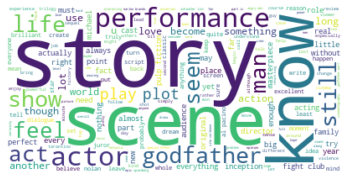

In [87]:
stop_words = set(stopwords.words('english'))
stop_words.update(["one","two","three","film","movie","character","really","make","even","think","time","see","way","start","end","much","find","look","people","work","come","watch","first","give","take","thing","great","good","well","want","many","say","go","best","bad","never"])
stop_words.update(movie_name_list_unique)
reviews_keywords = movie_reviews_imdb_clean['Review_clean']
complete_keywords = []
for review in reviews_keywords:
    for word in review.split():
        if word.lower() not in stop_words:
            complete_keywords.append(word.lower())

frequency = {}
for i in set(complete_keywords):
    frequency[i] = complete_keywords.count(i)
keyword_frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse= True)}

keyword_text = " ".join(review for review in complete_keywords)
word_cloud = WordCloud(background_color="white").generate(keyword_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Reasoning for the generated keywords:-

The top keywords that were coming originally were "good", "bad", "well", "great"

The positive keywords are highlighted more because the reviews for high IMDb ratings are much greater than the reviews for low IMDb ratings.

After removing words which express the sentiment, the diversity of keywords was increased. We can now see that the other important keywords are "love", "story", "scene", "life", "performance", "actor", "plot"

From the above keywords it looks like the people prominently look for content (story, plot, and performance) when they go for a movie. Secondly, they look for actors and love story  

### SENTIMENT ANALYSIS:
#### Below mentioned steps are followed -
#### 1) Perform sentiment analysis on the reviews and divide them into two segments - Positive and Negative. 
#### 2) Try to identify the keywords associated with each group

In [88]:
Sentiment_Intensity_Analyzer = SIA()
polarity_score_list = []
for review in movie_reviews_imdb_clean['Review_clean']:
    polarity_score = Sentiment_Intensity_Analyzer.polarity_scores(review)
    polarity_score_list.append(polarity_score)

df = pd.DataFrame.from_records(polarity_score_list)
print(df.head())
compound_score = df["compound"]

movie_reviews_imdb_clean['sentiment_polarity'] = compound_score

     neg    neu    pos  compound
0  0.105  0.761  0.134    0.9417
1  0.109  0.690  0.200    0.9472
2  0.021  0.683  0.296    0.9912
3  0.053  0.766  0.181    0.9703
4  0.049  0.699  0.252    0.9844


In [89]:
movie_reviews_imdb_clean.head()

Movie                                           Title  \
1  The Shawshank Redemption  "I Had To Go To Prison To Learn To Be A Crook"   
4  The Shawshank Redemption                          Freeman gives it depth   
5  The Shawshank Redemption                                      impressive   
7  The Shawshank Redemption   An incredible movie. One that lives with you.   
9  The Shawshank Redemption          IMDb and the Greatest Film of All Time   

                                              Review  \
1  None of the usual otherworld creatures that po...   
4  Andy Dufresne (Tim Robbins) is a banker convic...   
5  not for a reason. but for the fine art to crea...   
7  It is no wonder that the film has such a high ...   
9  Two imprisoned men (Tim Robbins and Morgan Fre...   

                                        Review_clean  sentiment_polarity  
1  None of the usual otherworld creature that pop...              0.9472  
4  Andy Dufresne Tim Robbins be a banker convict ...              0.9844  
5  not for a reason but for the fine art to creat...             -0.6876  
7  It be no wonder that the film have such a high...              0.9986  
9  Two imprisoned men Tim Robbins and Morgan Free...              0.9629

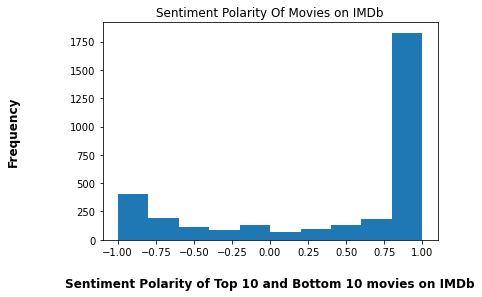

In [90]:
ax = movie_reviews_imdb_clean.hist(column="sentiment_polarity",grid = False)
ax = ax[0]
for fig in ax:
    fig.set_xlabel("Sentiment Polarity of Top 10 and Bottom 10 movies on IMDb", labelpad=20, weight='bold', size=12)
    fig.set_ylabel("Frequency", labelpad=50, weight='bold', size=12)
    fig.set_title("Sentiment Polarity Of Movies on IMDb")

### Conclusion - 

#### 1) As it was identified from the above analysis that review count for top rated movies were high as compared to the low rated movies so, in the above plot as well the sentiment is skewed towards the positive side.

#### 2) We could also see a bimodal distribution, with the mode skewed towards either the extreme positive or extreme negative. This is also supported by the fact that we chose Top 10 rated movies and Bottom 10 rated movies.

In [91]:
positive_sentiment_df = movie_reviews_imdb_clean[movie_reviews_imdb_clean["sentiment_polarity"] > 0] 
negative_sentiment_df = movie_reviews_imdb_clean[movie_reviews_imdb_clean["sentiment_polarity"] <= 0]

### Word Cloud for Positive Reviews

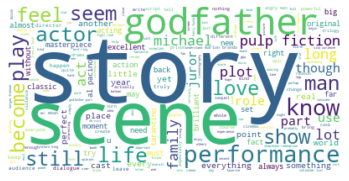

In [92]:
stop_words = set(stopwords.words('english'))
stop_words.update(["one","two","three","film","movie","character","really","make","even","think","time","see","way","start","end","much","find","look","people","work","come","watch","first","give","take","thing","great","good","well","want","many","say","go","best","bad","never"])
stop_words.update(movie_name_list_unique)
reviews_keywords = positive_sentiment_df['Review_clean']
complete_keywords = []
for review in reviews_keywords:
    for word in review.split():
        if word.lower() not in stop_words:
            complete_keywords.append(word.lower())

frequency = {}
for i in set(complete_keywords):
    frequency[i] = complete_keywords.count(i)
keyword_frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse= True)}

keyword_text = " ".join(review for review in complete_keywords)
word_cloud = WordCloud(background_color="white").generate(keyword_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for Negative Reviews

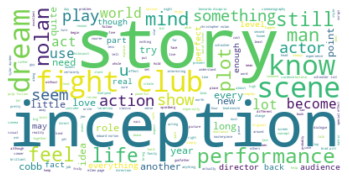

In [93]:
stop_words = set(stopwords.words('english'))
stop_words.update(["one","two","three","film","movie","character","really","make","even","think","time","see","way","start","end","much","find","look","people","work","come","watch","first","give","take","thing","great","good","well","want","many","say","go","best","bad","never"])
stop_words.update(movie_name_list_unique)
reviews_keywords = negative_sentiment_df['Review_clean']
complete_keywords = []
for review in reviews_keywords:
    for word in review.split():
        if word.lower() not in stop_words:
            complete_keywords.append(word.lower())

frequency = {}
for i in set(complete_keywords):
    frequency[i] = complete_keywords.count(i)
keyword_frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse= True)}

keyword_text = " ".join(review for review in complete_keywords)
word_cloud = WordCloud(background_color="white").generate(keyword_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### LDA (LATENT DIRICHLET ALLOCATION) - Topic Modeling
#### Let's do LDA and visualize 5 topic for reviews of all 20 movies

In [94]:
stop_words = set(stopwords.words('english'))
stop_words.update(["one","two","three","film","movie","character","really","make","even","think","time","see","way","start","end","much","find","look","people","work","come","watch","first","give","take","thing","great","good","well","want","many","say","go","best","bad","never"])
stop_words.update(movie_name_list_unique)

def sentence_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations
def remove_stopwords(text):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in text]

In [95]:
data_list = movie_reviews_imdb_clean.Review_clean.values.tolist()
data_word_list = list(sentence_to_words(data_list))
data_word_list = remove_stopwords(data_word_list)

id_2_word = corpora.Dictionary(data_word_list)
texts = data_word_list
corpus = [id_2_word.doc2bow(text) for text in texts]

In [96]:
from pprint import pprint
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id_2_word, num_topics=5)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"like" + 0.007*"story" + 0.005*"godfather" + 0.005*"get" + '
  '0.005*"also" + 0.005*"scene" + 0.004*"ever" + 0.003*"would" + '
  '0.003*"performance" + 0.003*"pulp"'),
 (1,
  '0.009*"like" + 0.006*"story" + 0.004*"scene" + 0.004*"fight" + 0.004*"also" '
  '+ 0.004*"get" + 0.004*"dream" + 0.004*"would" + 0.003*"part" + '
  '0.003*"show"'),
 (2,
  '0.009*"like" + 0.007*"get" + 0.006*"scene" + 0.005*"also" + 0.005*"story" + '
  '0.004*"would" + 0.004*"know" + 0.004*"ever" + 0.003*"performance" + '
  '0.003*"michael"'),
 (3,
  '0.008*"story" + 0.005*"get" + 0.005*"like" + 0.004*"life" + 0.004*"ever" + '
  '0.004*"performance" + 0.004*"would" + 0.003*"scene" + 0.003*"juror" + '
  '0.003*"part"'),
 (4,
  '0.007*"like" + 0.006*"story" + 0.006*"get" + 0.004*"scene" + 0.004*"ever" + '
  '0.004*"also" + 0.004*"would" + 0.004*"part" + 0.003*"know" + 0.003*"life"')]
